# 1. RNN의 문제점


    1.1 BPTT(BackPropagation Through TIme)의 문제
        저번 시간에 다루었던 BPTT는 아래의 그림과 같이 모든 타임스템마다 처음부터 끝까지 역전파를 한다.     

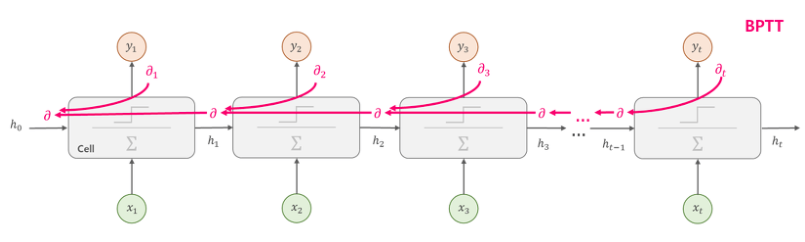

         하지만 시간이 길 경우, 역전파의 길이는 길어진다. 즉, 깊은 네트워크가 형성된다.
         깊은 네트워크는 Gradient Vanishing & Exploding 문제가 발생할 가능성이 크다.
         깊은 네트워크는 역전파의 계산량이 많아지기 때문에 학습시간이 오래 걸린다

    1.2 장기 의존성(Long_Term Dependency) 문제
        RNN은 타임 스템t에서 이전 타임 스템(t - 1)의 상태를 입력으로 받는 구조 --> 이전의 정보가 현재의 타임 스템 t에 영향을 줄 수 있음
        장기 의존성: 이론적으로 모든 이전 타임 스텝이 영향을 주지만 앞쪽의 타임 스템은 타음 스템이 길어질 수록 영향을 주지 못함

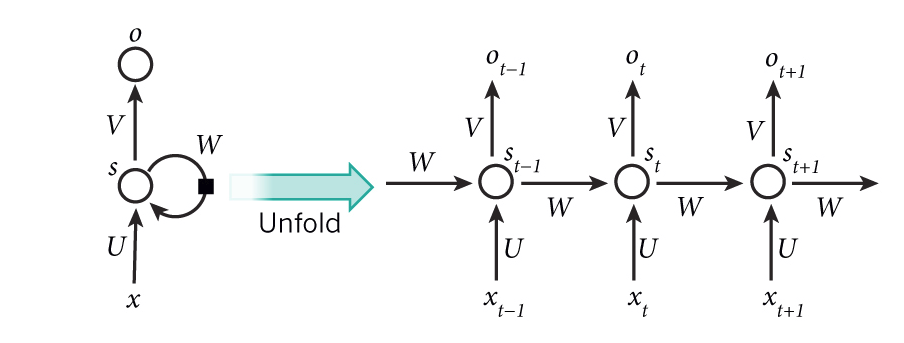

# 2. LSTM
    
    LSTM(Long Short-Term Memory)는 1995년에 제안된 구조로써 RNN의 장기 의존성 문제를 해결하고 학습 속도를 높임
    모든 RNN은 신경망의 반복적인 모듈 체인의 형대를 갖음
    LSTM에는 모듈 체인과 같은 구조가 있지만 1개의 신경 네트워크 계층을 갖는 대신 4개의 신경 네트워크 계층을 가짐

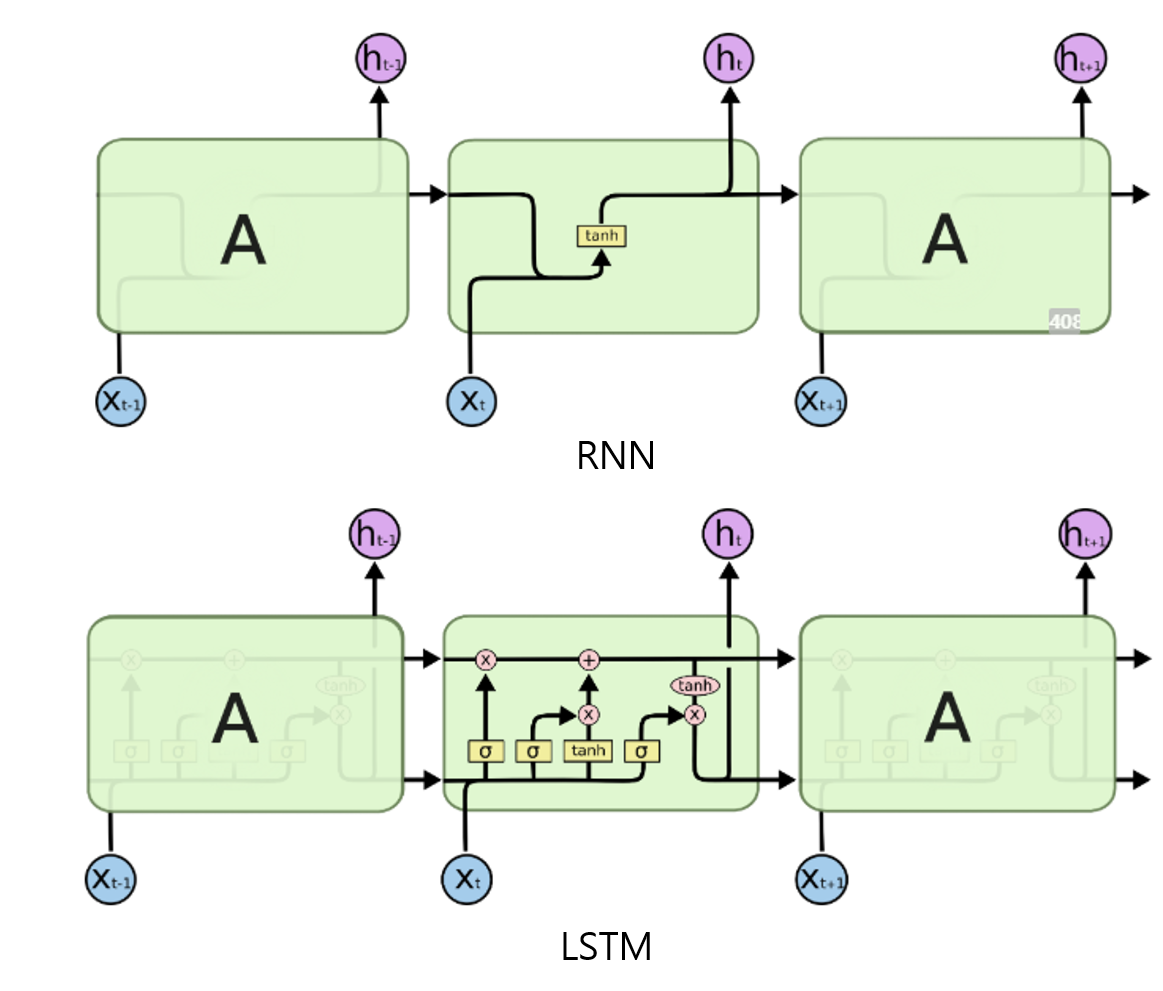

    LSTM의 과정
        LSTM는 두개의 input data ht와 ct가 있음,  ct는 장기적인 기억, ht는 단기적인 기억을 저장
        LSTM의 핵심은 ct에서 기억할 부분, 삭제할 부분, 그리고 읽어 들일 부분을 학습하는 것
        ct는 셀의 왼쪽에서 오른쪽으로 통과하면서 forget gate와 input gate를 거침으로써 기억을 일부 잃고 얻음
        과정을 거친 ct는 다시 tanh함수로 전달되어 ht와 yt를 만드는데 기반이 됨

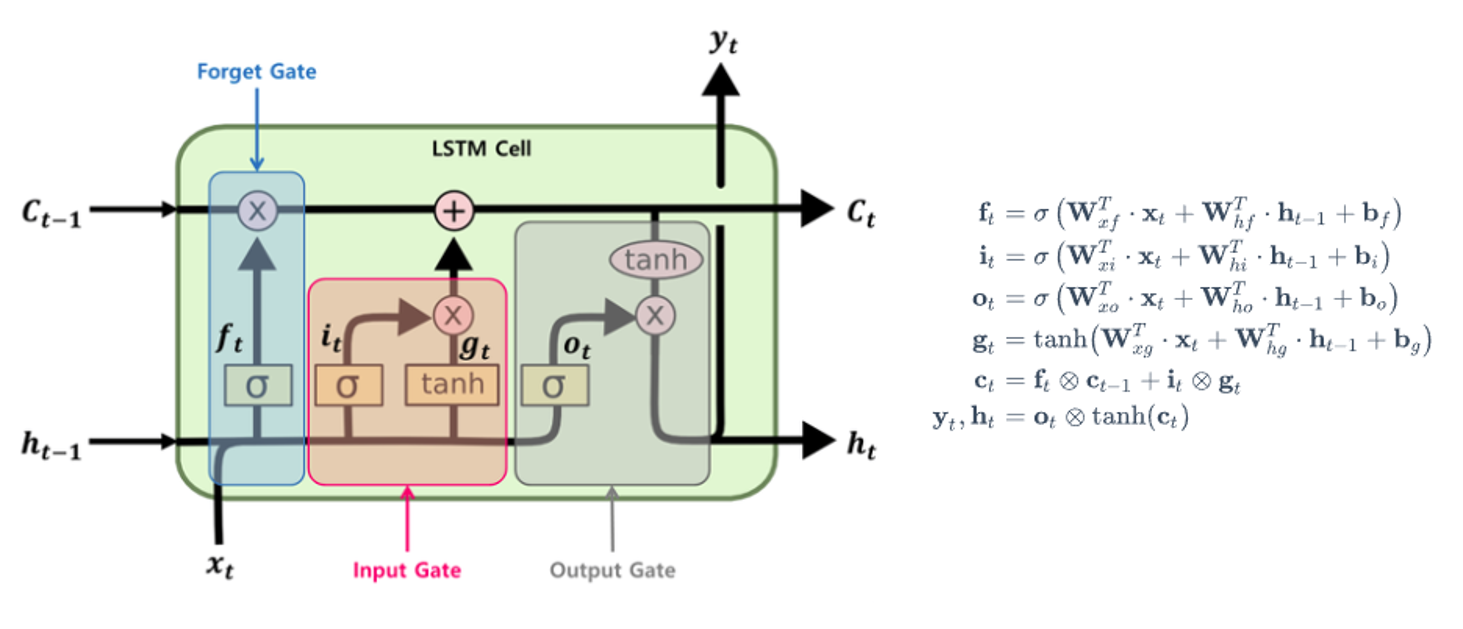

     forget gate layer
        
        어떤 정보를 버릴지 선택하는 과정
        ft에 의해 제어되며 장기 장태ct를 얼마나 삭제할지 제어        
    
    input gate layer
        
        it에 의해 제어되며 gt의 어느 부분이 장기 상태ct에 더해져야 하는지 제어
        기존 RNN의 셀과 같은 형태를 취함
        
     output gate layer
         ot는 장기 상태 ct의 어느 부분을 읽어서 ht와 yt로 출력해야 하는지 제어

# LSTM 예제

       파란색 박스가 입력값이고, 빨간색 박스가 우리가 원하는 출력값입니다.
       1~4번째 음표를 데이터로 5번째 음표를 라벨값으로 학습을 시킵니다.
       다음에는 2~5번째 음표를 데이터로 6번째 음표를 라벨값으로 학습을 시킵니다.
       이후 한 음표씩 넘어가면서 노래 끝까지 학습시킵니다.

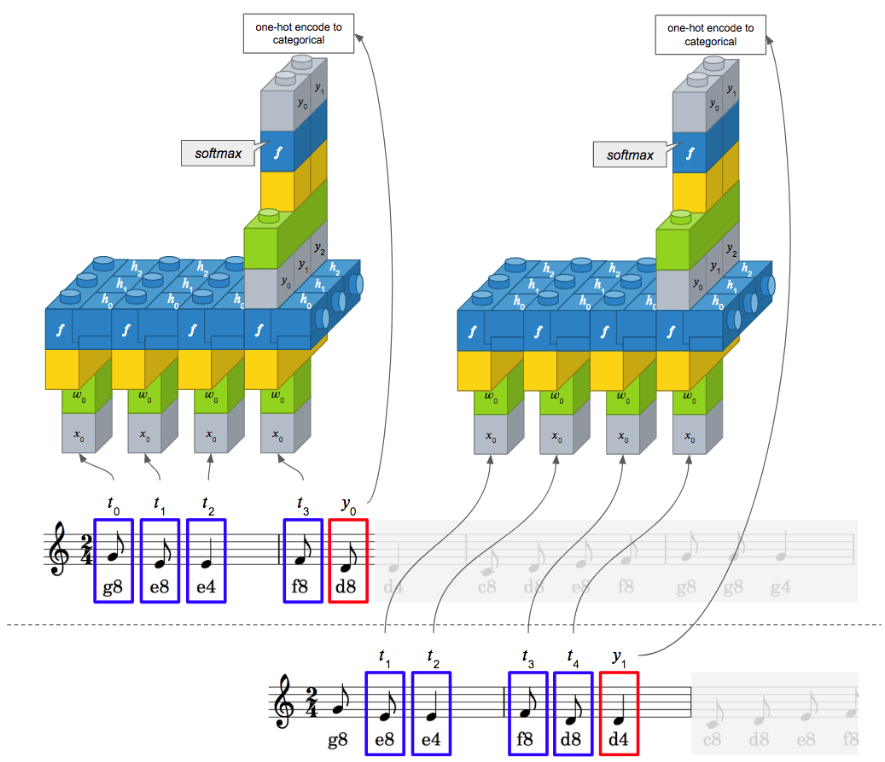

In [62]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [63]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [64]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


Using TensorFlow backend.


(50, 5)
one hot encoding vector size is  12
Epoch 1/2000
 - 1s - loss: 2.4859 - acc: 0.0400
Epoch 2/2000
 - 0s - loss: 2.4483 - acc: 0.2400
Epoch 3/2000
 - 0s - loss: 2.4081 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.3629 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.3070 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.2403 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 2.1650 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 2.0775 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.9978 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9623 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.9637 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.9550 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.9377 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.9230 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.9217 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.9177 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.9181 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.9123 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.9071 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.9025

 - 0s - loss: 1.6238 - acc: 0.4400
Epoch 167/2000
 - 0s - loss: 1.6134 - acc: 0.4400
Epoch 168/2000
 - 0s - loss: 1.6183 - acc: 0.4200
Epoch 169/2000
 - 0s - loss: 1.6139 - acc: 0.4400
Epoch 170/2000
 - 0s - loss: 1.6020 - acc: 0.4400
Epoch 171/2000
 - 0s - loss: 1.6155 - acc: 0.3800
Epoch 172/2000
 - 0s - loss: 1.6115 - acc: 0.4200
Epoch 173/2000
 - 0s - loss: 1.5988 - acc: 0.4400
Epoch 174/2000
 - 0s - loss: 1.6010 - acc: 0.4400
Epoch 175/2000
 - 0s - loss: 1.6037 - acc: 0.4400
Epoch 176/2000
 - 0s - loss: 1.6042 - acc: 0.4400
Epoch 177/2000
 - 0s - loss: 1.6037 - acc: 0.4000
Epoch 178/2000
 - 0s - loss: 1.6012 - acc: 0.3800
Epoch 179/2000
 - 0s - loss: 1.5942 - acc: 0.4200
Epoch 180/2000
 - 0s - loss: 1.5831 - acc: 0.4400
Epoch 181/2000
 - 0s - loss: 1.5840 - acc: 0.4400
Epoch 182/2000
 - 0s - loss: 1.5876 - acc: 0.4800
Epoch 183/2000
 - 0s - loss: 1.5780 - acc: 0.4600
Epoch 184/2000
 - 0s - loss: 1.5753 - acc: 0.4000
Epoch 185/2000
 - 0s - loss: 1.6072 - acc: 0.4000
Epoch 186/2000


 - 0s - loss: 1.3212 - acc: 0.5000
Epoch 331/2000
 - 0s - loss: 1.2946 - acc: 0.5200
Epoch 332/2000
 - 0s - loss: 1.2906 - acc: 0.5400
Epoch 333/2000
 - 0s - loss: 1.2811 - acc: 0.5400
Epoch 334/2000
 - 0s - loss: 1.2697 - acc: 0.5600
Epoch 335/2000
 - 0s - loss: 1.2750 - acc: 0.5800
Epoch 336/2000
 - 0s - loss: 1.2834 - acc: 0.5000
Epoch 337/2000
 - 0s - loss: 1.2576 - acc: 0.5400
Epoch 338/2000
 - 0s - loss: 1.2842 - acc: 0.5600
Epoch 339/2000
 - 0s - loss: 1.2574 - acc: 0.5000
Epoch 340/2000
 - 0s - loss: 1.2872 - acc: 0.5000
Epoch 341/2000
 - 0s - loss: 1.2474 - acc: 0.5200
Epoch 342/2000
 - 0s - loss: 1.2728 - acc: 0.5400
Epoch 343/2000
 - 0s - loss: 1.2503 - acc: 0.5200
Epoch 344/2000
 - 0s - loss: 1.2782 - acc: 0.4600
Epoch 345/2000
 - 0s - loss: 1.2383 - acc: 0.5200
Epoch 346/2000
 - 0s - loss: 1.2781 - acc: 0.5000
Epoch 347/2000
 - 0s - loss: 1.2465 - acc: 0.5200
Epoch 348/2000
 - 0s - loss: 1.2758 - acc: 0.4600
Epoch 349/2000
 - 0s - loss: 1.2755 - acc: 0.5200
Epoch 350/2000


Epoch 495/2000
 - 0s - loss: 1.0098 - acc: 0.6200
Epoch 496/2000
 - 0s - loss: 0.9962 - acc: 0.6200
Epoch 497/2000
 - 0s - loss: 0.9922 - acc: 0.6000
Epoch 498/2000
 - 0s - loss: 0.9809 - acc: 0.6000
Epoch 499/2000
 - 0s - loss: 0.9885 - acc: 0.6200
Epoch 500/2000
 - 0s - loss: 0.9928 - acc: 0.6400
Epoch 501/2000
 - 0s - loss: 0.9832 - acc: 0.6400
Epoch 502/2000
 - 0s - loss: 0.9953 - acc: 0.5400
Epoch 503/2000
 - 0s - loss: 0.9763 - acc: 0.6200
Epoch 504/2000
 - 0s - loss: 1.0003 - acc: 0.6400
Epoch 505/2000
 - 0s - loss: 0.9747 - acc: 0.6400
Epoch 506/2000
 - 0s - loss: 0.9708 - acc: 0.6400
Epoch 507/2000
 - 0s - loss: 0.9694 - acc: 0.6200
Epoch 508/2000
 - 0s - loss: 0.9751 - acc: 0.6200
Epoch 509/2000
 - 0s - loss: 0.9816 - acc: 0.6400
Epoch 510/2000
 - 0s - loss: 0.9668 - acc: 0.6400
Epoch 511/2000
 - 0s - loss: 0.9706 - acc: 0.5800
Epoch 512/2000
 - 0s - loss: 0.9736 - acc: 0.6000
Epoch 513/2000
 - 0s - loss: 0.9604 - acc: 0.6400
Epoch 514/2000
 - 0s - loss: 0.9658 - acc: 0.6200


Epoch 659/2000
 - 0s - loss: 0.7233 - acc: 0.7000
Epoch 660/2000
 - 0s - loss: 0.7284 - acc: 0.7200
Epoch 661/2000
 - 0s - loss: 0.7088 - acc: 0.7600
Epoch 662/2000
 - 0s - loss: 0.7287 - acc: 0.7200
Epoch 663/2000
 - 0s - loss: 0.7035 - acc: 0.7600
Epoch 664/2000
 - 0s - loss: 0.7182 - acc: 0.7200
Epoch 665/2000
 - 0s - loss: 0.7029 - acc: 0.7600
Epoch 666/2000
 - 0s - loss: 0.7592 - acc: 0.7000
Epoch 667/2000
 - 0s - loss: 0.7097 - acc: 0.6800
Epoch 668/2000
 - 0s - loss: 0.7451 - acc: 0.7000
Epoch 669/2000
 - 0s - loss: 0.7123 - acc: 0.7000
Epoch 670/2000
 - 0s - loss: 0.7028 - acc: 0.7800
Epoch 671/2000
 - 0s - loss: 0.6981 - acc: 0.8000
Epoch 672/2000
 - 0s - loss: 0.7390 - acc: 0.7200
Epoch 673/2000
 - 0s - loss: 0.7076 - acc: 0.7000
Epoch 674/2000
 - 0s - loss: 0.7213 - acc: 0.7000
Epoch 675/2000
 - 0s - loss: 0.7247 - acc: 0.7000
Epoch 676/2000
 - 0s - loss: 0.6994 - acc: 0.7200
Epoch 677/2000
 - 0s - loss: 0.6940 - acc: 0.7400
Epoch 678/2000
 - 0s - loss: 0.6956 - acc: 0.7200


Epoch 823/2000
 - 0s - loss: 0.5824 - acc: 0.8000
Epoch 824/2000
 - 0s - loss: 0.5912 - acc: 0.8000
Epoch 825/2000
 - 0s - loss: 0.5855 - acc: 0.8200
Epoch 826/2000
 - 0s - loss: 0.5477 - acc: 0.7600
Epoch 827/2000
 - 0s - loss: 0.5645 - acc: 0.8000
Epoch 828/2000
 - 0s - loss: 0.5538 - acc: 0.8000
Epoch 829/2000
 - 0s - loss: 0.5354 - acc: 0.8600
Epoch 830/2000
 - 0s - loss: 0.5678 - acc: 0.7800
Epoch 831/2000
 - 0s - loss: 0.5767 - acc: 0.8000
Epoch 832/2000
 - 0s - loss: 0.5697 - acc: 0.8400
Epoch 833/2000
 - 0s - loss: 0.5593 - acc: 0.8000
Epoch 834/2000
 - 0s - loss: 0.5314 - acc: 0.8600
Epoch 835/2000
 - 0s - loss: 0.5343 - acc: 0.8400
Epoch 836/2000
 - 0s - loss: 0.5299 - acc: 0.8600
Epoch 837/2000
 - 0s - loss: 0.5394 - acc: 0.8000
Epoch 838/2000
 - 0s - loss: 0.5349 - acc: 0.8400
Epoch 839/2000
 - 0s - loss: 0.5429 - acc: 0.8600
Epoch 840/2000
 - 0s - loss: 0.5905 - acc: 0.7800
Epoch 841/2000
 - 0s - loss: 0.5146 - acc: 0.8200
Epoch 842/2000
 - 0s - loss: 0.5923 - acc: 0.8000


Epoch 987/2000
 - 0s - loss: 0.4399 - acc: 0.8600
Epoch 988/2000
 - 0s - loss: 0.4489 - acc: 0.8800
Epoch 989/2000
 - 0s - loss: 0.4473 - acc: 0.8600
Epoch 990/2000
 - 0s - loss: 0.4381 - acc: 0.8600
Epoch 991/2000
 - 0s - loss: 0.4440 - acc: 0.8600
Epoch 992/2000
 - 0s - loss: 0.4743 - acc: 0.8200
Epoch 993/2000
 - 0s - loss: 0.4470 - acc: 0.8600
Epoch 994/2000
 - 0s - loss: 0.4654 - acc: 0.8400
Epoch 995/2000
 - 0s - loss: 0.4381 - acc: 0.8800
Epoch 996/2000
 - 0s - loss: 0.4721 - acc: 0.8000
Epoch 997/2000
 - 0s - loss: 0.4595 - acc: 0.8600
Epoch 998/2000
 - 0s - loss: 0.4467 - acc: 0.8600
Epoch 999/2000
 - 0s - loss: 0.4627 - acc: 0.8400
Epoch 1000/2000
 - 0s - loss: 0.4345 - acc: 0.8400
Epoch 1001/2000
 - 0s - loss: 0.4773 - acc: 0.8000
Epoch 1002/2000
 - 0s - loss: 0.4271 - acc: 0.8800
Epoch 1003/2000
 - 0s - loss: 0.4695 - acc: 0.8400
Epoch 1004/2000
 - 0s - loss: 0.4425 - acc: 0.8200
Epoch 1005/2000
 - 0s - loss: 0.4349 - acc: 0.8400
Epoch 1006/2000
 - 0s - loss: 0.4408 - acc: 

Epoch 1148/2000
 - 0s - loss: 0.4130 - acc: 0.8400
Epoch 1149/2000
 - 0s - loss: 0.4550 - acc: 0.8200
Epoch 1150/2000
 - 0s - loss: 0.3960 - acc: 0.8400
Epoch 1151/2000
 - 0s - loss: 0.4278 - acc: 0.8600
Epoch 1152/2000
 - 0s - loss: 0.4264 - acc: 0.8600
Epoch 1153/2000
 - 0s - loss: 0.4025 - acc: 0.8400
Epoch 1154/2000
 - 0s - loss: 0.4220 - acc: 0.8600
Epoch 1155/2000
 - 0s - loss: 0.3834 - acc: 0.9000
Epoch 1156/2000
 - 0s - loss: 0.4184 - acc: 0.8400
Epoch 1157/2000
 - 0s - loss: 0.4257 - acc: 0.8600
Epoch 1158/2000
 - 0s - loss: 0.4024 - acc: 0.8800
Epoch 1159/2000
 - 0s - loss: 0.4092 - acc: 0.8400
Epoch 1160/2000
 - 0s - loss: 0.3848 - acc: 0.8800
Epoch 1161/2000
 - 0s - loss: 0.3961 - acc: 0.8800
Epoch 1162/2000
 - 0s - loss: 0.3935 - acc: 0.8600
Epoch 1163/2000
 - 0s - loss: 0.3878 - acc: 0.8600
Epoch 1164/2000
 - 0s - loss: 0.3895 - acc: 0.8600
Epoch 1165/2000
 - 0s - loss: 0.4164 - acc: 0.8600
Epoch 1166/2000
 - 0s - loss: 0.4016 - acc: 0.8400
Epoch 1167/2000
 - 0s - loss: 0

Epoch 1309/2000
 - 0s - loss: 0.3534 - acc: 0.8600
Epoch 1310/2000
 - 0s - loss: 0.3453 - acc: 0.8800
Epoch 1311/2000
 - 0s - loss: 0.3595 - acc: 0.8800
Epoch 1312/2000
 - 0s - loss: 0.3505 - acc: 0.8800
Epoch 1313/2000
 - 0s - loss: 0.3655 - acc: 0.8400
Epoch 1314/2000
 - 0s - loss: 0.3483 - acc: 0.8600
Epoch 1315/2000
 - 0s - loss: 0.3600 - acc: 0.8600
Epoch 1316/2000
 - 0s - loss: 0.3435 - acc: 0.8800
Epoch 1317/2000
 - 0s - loss: 0.3455 - acc: 0.8800
Epoch 1318/2000
 - 0s - loss: 0.3530 - acc: 0.8600
Epoch 1319/2000
 - 0s - loss: 0.3591 - acc: 0.8600
Epoch 1320/2000
 - 0s - loss: 0.3410 - acc: 0.8600
Epoch 1321/2000
 - 0s - loss: 0.3669 - acc: 0.8400
Epoch 1322/2000
 - 0s - loss: 0.3460 - acc: 0.8800
Epoch 1323/2000
 - 0s - loss: 0.3631 - acc: 0.8800
Epoch 1324/2000
 - 0s - loss: 0.3669 - acc: 0.8600
Epoch 1325/2000
 - 0s - loss: 0.3367 - acc: 0.9000
Epoch 1326/2000
 - 0s - loss: 0.3635 - acc: 0.8800
Epoch 1327/2000
 - 0s - loss: 0.3469 - acc: 0.8600
Epoch 1328/2000
 - 0s - loss: 0

Epoch 1470/2000
 - 0s - loss: 0.3395 - acc: 0.8800
Epoch 1471/2000
 - 0s - loss: 0.3731 - acc: 0.8600
Epoch 1472/2000
 - 0s - loss: 0.3669 - acc: 0.8200
Epoch 1473/2000
 - 0s - loss: 0.3458 - acc: 0.9000
Epoch 1474/2000
 - 0s - loss: 0.3333 - acc: 0.8800
Epoch 1475/2000
 - 0s - loss: 0.3382 - acc: 0.8800
Epoch 1476/2000
 - 0s - loss: 0.3369 - acc: 0.8400
Epoch 1477/2000
 - 0s - loss: 0.3338 - acc: 0.8600
Epoch 1478/2000
 - 0s - loss: 0.3411 - acc: 0.8600
Epoch 1479/2000
 - 0s - loss: 0.3293 - acc: 0.8400
Epoch 1480/2000
 - 0s - loss: 0.3257 - acc: 0.8400
Epoch 1481/2000
 - 0s - loss: 0.3187 - acc: 0.8800
Epoch 1482/2000
 - 0s - loss: 0.3223 - acc: 0.8600
Epoch 1483/2000
 - 0s - loss: 0.3233 - acc: 0.8600
Epoch 1484/2000
 - 0s - loss: 0.3207 - acc: 0.8600
Epoch 1485/2000
 - 0s - loss: 0.3186 - acc: 0.8600
Epoch 1486/2000
 - 0s - loss: 0.3268 - acc: 0.8600
Epoch 1487/2000
 - 0s - loss: 0.3236 - acc: 0.8600
Epoch 1488/2000
 - 0s - loss: 0.3250 - acc: 0.8600
Epoch 1489/2000
 - 0s - loss: 0

Epoch 1631/2000
 - 0s - loss: 0.3112 - acc: 0.8800
Epoch 1632/2000
 - 0s - loss: 0.3108 - acc: 0.8600
Epoch 1633/2000
 - 0s - loss: 0.3037 - acc: 0.8400
Epoch 1634/2000
 - 0s - loss: 0.3316 - acc: 0.8600
Epoch 1635/2000
 - 0s - loss: 0.2877 - acc: 0.9000
Epoch 1636/2000
 - 0s - loss: 0.3264 - acc: 0.8400
Epoch 1637/2000
 - 0s - loss: 0.3005 - acc: 0.9000
Epoch 1638/2000
 - 0s - loss: 0.3234 - acc: 0.8800
Epoch 1639/2000
 - 0s - loss: 0.2893 - acc: 0.8800
Epoch 1640/2000
 - 0s - loss: 0.3232 - acc: 0.8600
Epoch 1641/2000
 - 0s - loss: 0.3361 - acc: 0.8600
Epoch 1642/2000
 - 0s - loss: 0.3075 - acc: 0.8600
Epoch 1643/2000
 - 0s - loss: 0.3262 - acc: 0.9200
Epoch 1644/2000
 - 0s - loss: 0.3263 - acc: 0.8800
Epoch 1645/2000
 - 0s - loss: 0.3304 - acc: 0.8600
Epoch 1646/2000
 - 0s - loss: 0.3203 - acc: 0.8800
Epoch 1647/2000
 - 0s - loss: 0.3203 - acc: 0.8600
Epoch 1648/2000
 - 0s - loss: 0.3217 - acc: 0.8400
Epoch 1649/2000
 - 0s - loss: 0.3106 - acc: 0.8600
Epoch 1650/2000
 - 0s - loss: 0

Epoch 1792/2000
 - 0s - loss: 0.3035 - acc: 0.8600
Epoch 1793/2000
 - 0s - loss: 0.2906 - acc: 0.8400
Epoch 1794/2000
 - 0s - loss: 0.2949 - acc: 0.8800
Epoch 1795/2000
 - 0s - loss: 0.2874 - acc: 0.8600
Epoch 1796/2000
 - 0s - loss: 0.2910 - acc: 0.8800
Epoch 1797/2000
 - 0s - loss: 0.2816 - acc: 0.8800
Epoch 1798/2000
 - 0s - loss: 0.2815 - acc: 0.9000
Epoch 1799/2000
 - 0s - loss: 0.2909 - acc: 0.8400
Epoch 1800/2000
 - 0s - loss: 0.2822 - acc: 0.8600
Epoch 1801/2000
 - 0s - loss: 0.2891 - acc: 0.8800
Epoch 1802/2000
 - 0s - loss: 0.2923 - acc: 0.8600
Epoch 1803/2000
 - 0s - loss: 0.2922 - acc: 0.8800
Epoch 1804/2000
 - 0s - loss: 0.2857 - acc: 0.8800
Epoch 1805/2000
 - 0s - loss: 0.2850 - acc: 0.8800
Epoch 1806/2000
 - 0s - loss: 0.2878 - acc: 0.8600
Epoch 1807/2000
 - 0s - loss: 0.2851 - acc: 0.8400
Epoch 1808/2000
 - 0s - loss: 0.2851 - acc: 0.8600
Epoch 1809/2000
 - 0s - loss: 0.2883 - acc: 0.8800
Epoch 1810/2000
 - 0s - loss: 0.2885 - acc: 0.8600
Epoch 1811/2000
 - 0s - loss: 0

Epoch 1953/2000
 - 0s - loss: 0.2767 - acc: 0.9000
Epoch 1954/2000
 - 0s - loss: 0.2931 - acc: 0.8600
Epoch 1955/2000
 - 0s - loss: 0.2831 - acc: 0.8800
Epoch 1956/2000
 - 0s - loss: 0.2726 - acc: 0.8800
Epoch 1957/2000
 - 0s - loss: 0.2834 - acc: 0.9000
Epoch 1958/2000
 - 0s - loss: 0.2818 - acc: 0.8800
Epoch 1959/2000
 - 0s - loss: 0.2747 - acc: 0.9000
Epoch 1960/2000
 - 0s - loss: 0.2706 - acc: 0.9000
Epoch 1961/2000
 - 0s - loss: 0.2814 - acc: 0.8800
Epoch 1962/2000
 - 0s - loss: 0.2746 - acc: 0.9000
Epoch 1963/2000
 - 0s - loss: 0.2769 - acc: 0.8800
Epoch 1964/2000
 - 0s - loss: 0.2910 - acc: 0.9000
Epoch 1965/2000
 - 0s - loss: 0.2706 - acc: 0.9000
Epoch 1966/2000
 - 0s - loss: 0.2820 - acc: 0.8600
Epoch 1967/2000
 - 0s - loss: 0.2898 - acc: 0.8000
Epoch 1968/2000
 - 0s - loss: 0.2822 - acc: 0.8400
Epoch 1969/2000
 - 0s - loss: 0.2727 - acc: 0.9000
Epoch 1970/2000
 - 0s - loss: 0.2873 - acc: 0.9000
Epoch 1971/2000
 - 0s - loss: 0.2815 - acc: 0.8600
Epoch 1972/2000
 - 0s - loss: 0

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


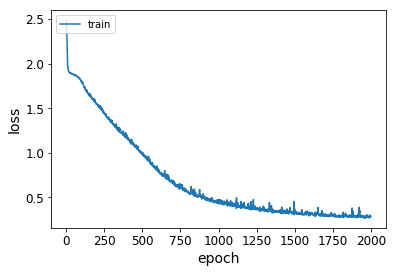

50/50 [==============================] - 0s 2ms/step
acc: 90.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [65]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기
        
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

# 상태유지 LSTM

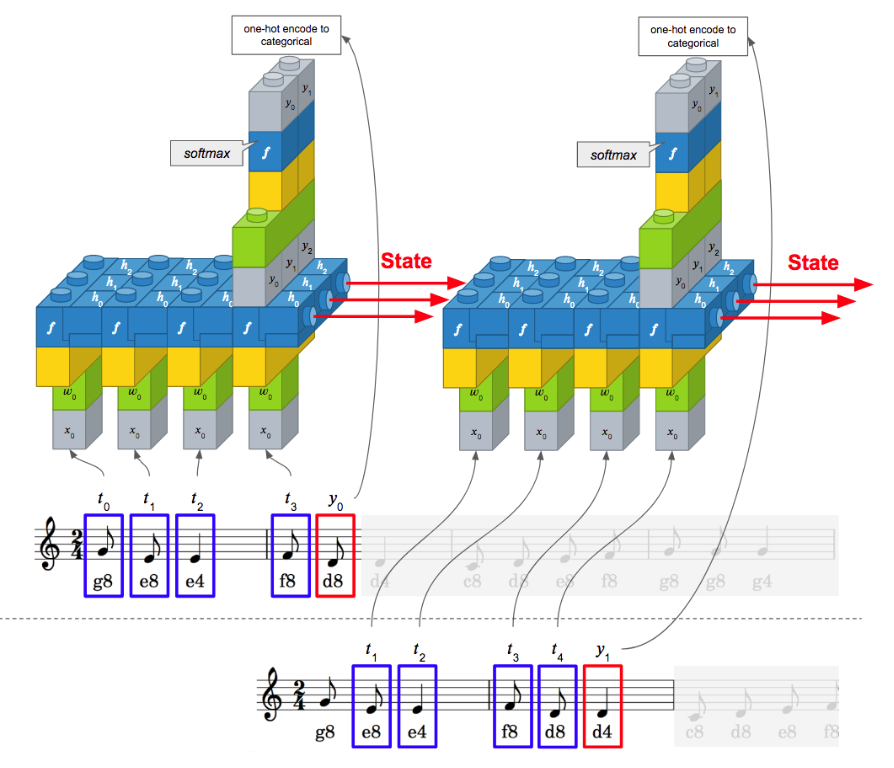

(50, 5)
one hot encoding vector size is  12
epochs : 0
Epoch 1/1
 - 1s - loss: 2.3461 - acc: 0.1400
epochs : 1
Epoch 1/1
 - 0s - loss: 2.0398 - acc: 0.3400
epochs : 2
Epoch 1/1
 - 0s - loss: 1.9631 - acc: 0.3400
epochs : 3
Epoch 1/1
 - 0s - loss: 1.9467 - acc: 0.3400
epochs : 4
Epoch 1/1
 - 0s - loss: 1.9369 - acc: 0.3400
epochs : 5
Epoch 1/1
 - 0s - loss: 1.9302 - acc: 0.3400
epochs : 6
Epoch 1/1
 - 0s - loss: 1.9250 - acc: 0.3600
epochs : 7
Epoch 1/1
 - 0s - loss: 1.9209 - acc: 0.3600
epochs : 8
Epoch 1/1
 - 0s - loss: 1.9173 - acc: 0.3600
epochs : 9
Epoch 1/1
 - 0s - loss: 1.9141 - acc: 0.3600
epochs : 10
Epoch 1/1
 - 0s - loss: 1.9111 - acc: 0.3600
epochs : 11
Epoch 1/1
 - 0s - loss: 1.9082 - acc: 0.3600
epochs : 12
Epoch 1/1
 - 0s - loss: 1.9051 - acc: 0.3600
epochs : 13
Epoch 1/1
 - 0s - loss: 1.9017 - acc: 0.3600
epochs : 14
Epoch 1/1
 - 0s - loss: 1.8978 - acc: 0.3600
epochs : 15
Epoch 1/1
 - 0s - loss: 1.9008 - acc: 0.3600
epochs : 16
Epoch 1/1
 - 0s - loss: 1.8893 - acc: 0.36

 - 0s - loss: 0.8471 - acc: 0.7000
epochs : 143
Epoch 1/1
 - 0s - loss: 0.5414 - acc: 0.8400
epochs : 144
Epoch 1/1
 - 0s - loss: 0.4501 - acc: 0.8800
epochs : 145
Epoch 1/1
 - 0s - loss: 0.3513 - acc: 0.9600
epochs : 146
Epoch 1/1
 - 0s - loss: 1.0208 - acc: 0.6600
epochs : 147
Epoch 1/1
 - 0s - loss: 0.6217 - acc: 0.7400
epochs : 148
Epoch 1/1
 - 0s - loss: 0.4934 - acc: 0.8200
epochs : 149
Epoch 1/1
 - 0s - loss: 0.9784 - acc: 0.7400
epochs : 150
Epoch 1/1
 - 0s - loss: 1.3046 - acc: 0.4800
epochs : 151
Epoch 1/1
 - 0s - loss: 1.9467 - acc: 0.4400
epochs : 152
Epoch 1/1
 - 0s - loss: 0.8994 - acc: 0.5800
epochs : 153
Epoch 1/1
 - 0s - loss: 0.7793 - acc: 0.7600
epochs : 154
Epoch 1/1
 - 0s - loss: 0.8074 - acc: 0.6600
epochs : 155
Epoch 1/1
 - 0s - loss: 0.5317 - acc: 0.8400
epochs : 156
Epoch 1/1
 - 0s - loss: 0.7800 - acc: 0.7000
epochs : 157
Epoch 1/1
 - 0s - loss: 0.9233 - acc: 0.7400
epochs : 158
Epoch 1/1
 - 0s - loss: 0.7384 - acc: 0.6600
epochs : 159
Epoch 1/1
 - 0s - loss: 

epochs : 284
Epoch 1/1
 - 0s - loss: 0.0047 - acc: 1.0000
epochs : 285
Epoch 1/1
 - 0s - loss: 0.0043 - acc: 1.0000
epochs : 286
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
epochs : 287
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
epochs : 288
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
epochs : 289
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
epochs : 290
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
epochs : 291
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
epochs : 292
Epoch 1/1
 - 0s - loss: 0.0034 - acc: 1.0000
epochs : 293
Epoch 1/1
 - 0s - loss: 0.0032 - acc: 1.0000
epochs : 294
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
epochs : 295
Epoch 1/1
 - 0s - loss: 0.0030 - acc: 1.0000
epochs : 296
Epoch 1/1
 - 0s - loss: 0.0029 - acc: 1.0000
epochs : 297
Epoch 1/1
 - 0s - loss: 0.0028 - acc: 1.0000
epochs : 298
Epoch 1/1
 - 0s - loss: 0.0027 - acc: 1.0000
epochs : 299
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
epochs : 300
Epoch 1/1
 - 0s - loss: 0.0025 - acc: 1.0000
epochs : 301
E

 - 0s - loss: 8.2942e-05 - acc: 1.0000
epochs : 420
Epoch 1/1
 - 0s - loss: 7.9938e-05 - acc: 1.0000
epochs : 421
Epoch 1/1
 - 0s - loss: 7.8029e-05 - acc: 1.0000
epochs : 422
Epoch 1/1
 - 0s - loss: 7.7862e-05 - acc: 1.0000
epochs : 423
Epoch 1/1
 - 0s - loss: 8.1461e-05 - acc: 1.0000
epochs : 424
Epoch 1/1
 - 0s - loss: 7.0205e-05 - acc: 1.0000
epochs : 425
Epoch 1/1
 - 0s - loss: 8.2774e-05 - acc: 1.0000
epochs : 426
Epoch 1/1
 - 0s - loss: 9.9650e-05 - acc: 1.0000
epochs : 427
Epoch 1/1
 - 0s - loss: 0.2215 - acc: 0.9600
epochs : 428
Epoch 1/1
 - 0s - loss: 2.9793 - acc: 0.4200
epochs : 429
Epoch 1/1
 - 0s - loss: 3.3169 - acc: 0.2600
epochs : 430
Epoch 1/1
 - 0s - loss: 1.9329 - acc: 0.3000
epochs : 431
Epoch 1/1
 - 0s - loss: 1.7903 - acc: 0.2800
epochs : 432
Epoch 1/1
 - 0s - loss: 1.6629 - acc: 0.3200
epochs : 433
Epoch 1/1
 - 0s - loss: 1.5960 - acc: 0.4200
epochs : 434
Epoch 1/1
 - 0s - loss: 1.5736 - acc: 0.3400
epochs : 435
Epoch 1/1
 - 0s - loss: 1.5355 - acc: 0.3600
epoch

epochs : 561
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 1.0000
epochs : 562
Epoch 1/1
 - 0s - loss: 0.0098 - acc: 1.0000
epochs : 563
Epoch 1/1
 - 0s - loss: 0.0087 - acc: 1.0000
epochs : 564
Epoch 1/1
 - 0s - loss: 0.1148 - acc: 0.9600
epochs : 565
Epoch 1/1
 - 0s - loss: 0.4108 - acc: 0.8800
epochs : 566
Epoch 1/1
 - 0s - loss: 1.3461 - acc: 0.6600
epochs : 567
Epoch 1/1
 - 0s - loss: 1.9688 - acc: 0.4000
epochs : 568
Epoch 1/1
 - 0s - loss: 1.2400 - acc: 0.5400
epochs : 569
Epoch 1/1
 - 0s - loss: 0.8472 - acc: 0.6600
epochs : 570
Epoch 1/1
 - 0s - loss: 0.7247 - acc: 0.7400
epochs : 571
Epoch 1/1
 - 0s - loss: 0.6337 - acc: 0.7800
epochs : 572
Epoch 1/1
 - 0s - loss: 0.8938 - acc: 0.6200
epochs : 573
Epoch 1/1
 - 0s - loss: 1.0957 - acc: 0.5200
epochs : 574
Epoch 1/1
 - 0s - loss: 0.7940 - acc: 0.7000
epochs : 575
Epoch 1/1
 - 0s - loss: 0.7904 - acc: 0.7200
epochs : 576
Epoch 1/1
 - 0s - loss: 0.5902 - acc: 0.7400
epochs : 577
Epoch 1/1
 - 0s - loss: 0.6208 - acc: 0.7600
epochs : 578
E

epochs : 703
Epoch 1/1
 - 0s - loss: 0.0030 - acc: 1.0000
epochs : 704
Epoch 1/1
 - 0s - loss: 0.0029 - acc: 1.0000
epochs : 705
Epoch 1/1
 - 0s - loss: 0.0028 - acc: 1.0000
epochs : 706
Epoch 1/1
 - 0s - loss: 0.0027 - acc: 1.0000
epochs : 707
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
epochs : 708
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
epochs : 709
Epoch 1/1
 - 0s - loss: 0.0025 - acc: 1.0000
epochs : 710
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
epochs : 711
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
epochs : 712
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
epochs : 713
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
epochs : 714
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs : 715
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs : 716
Epoch 1/1
 - 0s - loss: 0.0020 - acc: 1.0000
epochs : 717
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
epochs : 718
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
epochs : 719
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
epochs : 720
E

epochs : 843
Epoch 1/1
 - 0s - loss: 0.2254 - acc: 0.9200
epochs : 844
Epoch 1/1
 - 0s - loss: 0.1347 - acc: 0.9600
epochs : 845
Epoch 1/1
 - 0s - loss: 0.6357 - acc: 0.7800
epochs : 846
Epoch 1/1
 - 0s - loss: 0.3377 - acc: 0.8800
epochs : 847
Epoch 1/1
 - 0s - loss: 0.4831 - acc: 0.8000
epochs : 848
Epoch 1/1
 - 0s - loss: 0.3953 - acc: 0.8600
epochs : 849
Epoch 1/1
 - 0s - loss: 0.2241 - acc: 0.9600
epochs : 850
Epoch 1/1
 - 0s - loss: 0.2195 - acc: 0.9200
epochs : 851
Epoch 1/1
 - 0s - loss: 0.1723 - acc: 0.9400
epochs : 852
Epoch 1/1
 - 0s - loss: 0.1067 - acc: 0.9800
epochs : 853
Epoch 1/1
 - 0s - loss: 0.1828 - acc: 0.9400
epochs : 854
Epoch 1/1
 - 0s - loss: 0.1144 - acc: 0.9800
epochs : 855
Epoch 1/1
 - 0s - loss: 0.0856 - acc: 0.9600
epochs : 856
Epoch 1/1
 - 0s - loss: 0.1228 - acc: 0.9600
epochs : 857
Epoch 1/1
 - 0s - loss: 0.3354 - acc: 0.8600
epochs : 858
Epoch 1/1
 - 0s - loss: 0.1789 - acc: 0.9200
epochs : 859
Epoch 1/1
 - 0s - loss: 0.0781 - acc: 1.0000
epochs : 860
E

epochs : 984
Epoch 1/1
 - 0s - loss: 1.6858 - acc: 0.5800
epochs : 985
Epoch 1/1
 - 0s - loss: 1.6475 - acc: 0.5000
epochs : 986
Epoch 1/1
 - 0s - loss: 1.2539 - acc: 0.5000
epochs : 987
Epoch 1/1
 - 0s - loss: 0.7369 - acc: 0.8000
epochs : 988
Epoch 1/1
 - 0s - loss: 0.5167 - acc: 0.8200
epochs : 989
Epoch 1/1
 - 0s - loss: 1.0593 - acc: 0.7800
epochs : 990
Epoch 1/1
 - 0s - loss: 1.4038 - acc: 0.5400
epochs : 991
Epoch 1/1
 - 0s - loss: 0.6676 - acc: 0.7200
epochs : 992
Epoch 1/1
 - 0s - loss: 0.4695 - acc: 0.8200
epochs : 993
Epoch 1/1
 - 0s - loss: 0.4903 - acc: 0.8600
epochs : 994
Epoch 1/1
 - 0s - loss: 0.2694 - acc: 0.9400
epochs : 995
Epoch 1/1
 - 0s - loss: 0.2568 - acc: 0.9600
epochs : 996
Epoch 1/1
 - 0s - loss: 0.2463 - acc: 0.9200
epochs : 997
Epoch 1/1
 - 0s - loss: 0.1801 - acc: 0.9400
epochs : 998
Epoch 1/1
 - 0s - loss: 0.1493 - acc: 0.9800
epochs : 999
Epoch 1/1
 - 0s - loss: 0.1061 - acc: 0.9800
epochs : 1000
Epoch 1/1
 - 0s - loss: 0.1656 - acc: 0.9800
epochs : 1001

 - 0s - loss: 0.3929 - acc: 0.8800
epochs : 1122
Epoch 1/1
 - 0s - loss: 0.1415 - acc: 0.9600
epochs : 1123
Epoch 1/1
 - 0s - loss: 0.1558 - acc: 0.9400
epochs : 1124
Epoch 1/1
 - 0s - loss: 0.1119 - acc: 0.9800
epochs : 1125
Epoch 1/1
 - 0s - loss: 0.0992 - acc: 0.9800
epochs : 1126
Epoch 1/1
 - 0s - loss: 0.0814 - acc: 0.9800
epochs : 1127
Epoch 1/1
 - 0s - loss: 0.0831 - acc: 1.0000
epochs : 1128
Epoch 1/1
 - 0s - loss: 0.1393 - acc: 0.9400
epochs : 1129
Epoch 1/1
 - 0s - loss: 0.0329 - acc: 1.0000
epochs : 1130
Epoch 1/1
 - 0s - loss: 0.0225 - acc: 1.0000
epochs : 1131
Epoch 1/1
 - 0s - loss: 0.0189 - acc: 1.0000
epochs : 1132
Epoch 1/1
 - 0s - loss: 0.0169 - acc: 1.0000
epochs : 1133
Epoch 1/1
 - 0s - loss: 0.0145 - acc: 1.0000
epochs : 1134
Epoch 1/1
 - 0s - loss: 0.0134 - acc: 1.0000
epochs : 1135
Epoch 1/1
 - 0s - loss: 0.0119 - acc: 1.0000
epochs : 1136
Epoch 1/1
 - 0s - loss: 0.0115 - acc: 1.0000
epochs : 1137
Epoch 1/1
 - 0s - loss: 0.0216 - acc: 1.0000
epochs : 1138
Epoch 1

 - 0s - loss: 0.0025 - acc: 1.0000
epochs : 1261
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
epochs : 1262
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
epochs : 1263
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
epochs : 1264
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs : 1265
Epoch 1/1
 - 0s - loss: 0.0020 - acc: 1.0000
epochs : 1266
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
epochs : 1267
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
epochs : 1268
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
epochs : 1269
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
epochs : 1270
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs : 1271
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 1272
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 1273
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 1274
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 1275
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 1276
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 1277
Epoch 1

epochs : 1398
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 1399
Epoch 1/1
 - 0s - loss: 0.0489 - acc: 0.9800
epochs : 1400
Epoch 1/1
 - 0s - loss: 0.3692 - acc: 0.8800
epochs : 1401
Epoch 1/1
 - 0s - loss: 1.6539 - acc: 0.6400
epochs : 1402
Epoch 1/1
 - 0s - loss: 1.4685 - acc: 0.6200
epochs : 1403
Epoch 1/1
 - 0s - loss: 0.9524 - acc: 0.6000
epochs : 1404
Epoch 1/1
 - 0s - loss: 0.2455 - acc: 0.9600
epochs : 1405
Epoch 1/1
 - 0s - loss: 0.1213 - acc: 0.9800
epochs : 1406
Epoch 1/1
 - 0s - loss: 0.0959 - acc: 1.0000
epochs : 1407
Epoch 1/1
 - 0s - loss: 0.0416 - acc: 1.0000
epochs : 1408
Epoch 1/1
 - 0s - loss: 0.0864 - acc: 0.9800
epochs : 1409
Epoch 1/1
 - 0s - loss: 0.3934 - acc: 0.9000
epochs : 1410
Epoch 1/1
 - 0s - loss: 0.0459 - acc: 1.0000
epochs : 1411
Epoch 1/1
 - 0s - loss: 0.0422 - acc: 1.0000
epochs : 1412
Epoch 1/1
 - 0s - loss: 0.0680 - acc: 0.9800
epochs : 1413
Epoch 1/1
 - 0s - loss: 0.1296 - acc: 0.9600
epochs : 1414
Epoch 1/1
 - 0s - loss: 0.0642 - acc: 0.98

epochs : 1534
Epoch 1/1
 - 0s - loss: 0.2232 - acc: 0.9200
epochs : 1535
Epoch 1/1
 - 0s - loss: 0.1819 - acc: 0.9600
epochs : 1536
Epoch 1/1
 - 0s - loss: 0.5997 - acc: 0.7600
epochs : 1537
Epoch 1/1
 - 0s - loss: 0.4491 - acc: 0.8600
epochs : 1538
Epoch 1/1
 - 0s - loss: 0.2201 - acc: 0.9200
epochs : 1539
Epoch 1/1
 - 0s - loss: 0.0815 - acc: 1.0000
epochs : 1540
Epoch 1/1
 - 0s - loss: 0.0511 - acc: 1.0000
epochs : 1541
Epoch 1/1
 - 0s - loss: 0.0459 - acc: 1.0000
epochs : 1542
Epoch 1/1
 - 0s - loss: 0.0492 - acc: 0.9800
epochs : 1543
Epoch 1/1
 - 0s - loss: 0.0236 - acc: 1.0000
epochs : 1544
Epoch 1/1
 - 0s - loss: 0.0465 - acc: 0.9800
epochs : 1545
Epoch 1/1
 - 0s - loss: 0.0297 - acc: 1.0000
epochs : 1546
Epoch 1/1
 - 0s - loss: 0.0095 - acc: 1.0000
epochs : 1547
Epoch 1/1
 - 0s - loss: 0.0084 - acc: 1.0000
epochs : 1548
Epoch 1/1
 - 0s - loss: 0.0083 - acc: 1.0000
epochs : 1549
Epoch 1/1
 - 0s - loss: 0.0073 - acc: 1.0000
epochs : 1550
Epoch 1/1
 - 0s - loss: 0.0191 - acc: 1.00

 - 0s - loss: 2.3446e-04 - acc: 1.0000
epochs : 1670
Epoch 1/1
 - 0s - loss: 2.1315e-04 - acc: 1.0000
epochs : 1671
Epoch 1/1
 - 0s - loss: 2.0899e-04 - acc: 1.0000
epochs : 1672
Epoch 1/1
 - 0s - loss: 2.0789e-04 - acc: 1.0000
epochs : 1673
Epoch 1/1
 - 0s - loss: 2.0626e-04 - acc: 1.0000
epochs : 1674
Epoch 1/1
 - 0s - loss: 2.0022e-04 - acc: 1.0000
epochs : 1675
Epoch 1/1
 - 0s - loss: 1.9539e-04 - acc: 1.0000
epochs : 1676
Epoch 1/1
 - 0s - loss: 1.8732e-04 - acc: 1.0000
epochs : 1677
Epoch 1/1
 - 0s - loss: 1.7954e-04 - acc: 1.0000
epochs : 1678
Epoch 1/1
 - 0s - loss: 1.7312e-04 - acc: 1.0000
epochs : 1679
Epoch 1/1
 - 0s - loss: 1.6882e-04 - acc: 1.0000
epochs : 1680
Epoch 1/1
 - 0s - loss: 1.6782e-04 - acc: 1.0000
epochs : 1681
Epoch 1/1
 - 0s - loss: 1.6873e-04 - acc: 1.0000
epochs : 1682
Epoch 1/1
 - 0s - loss: 1.7561e-04 - acc: 1.0000
epochs : 1683
Epoch 1/1
 - 0s - loss: 2.1020e-04 - acc: 1.0000
epochs : 1684
Epoch 1/1
 - 0s - loss: 1.7917e-04 - acc: 1.0000
epochs : 1685
Ep

epochs : 1804
Epoch 1/1
 - 0s - loss: 8.0465e-04 - acc: 1.0000
epochs : 1805
Epoch 1/1
 - 0s - loss: 7.7820e-04 - acc: 1.0000
epochs : 1806
Epoch 1/1
 - 0s - loss: 7.5086e-04 - acc: 1.0000
epochs : 1807
Epoch 1/1
 - 0s - loss: 7.2848e-04 - acc: 1.0000
epochs : 1808
Epoch 1/1
 - 0s - loss: 7.0613e-04 - acc: 1.0000
epochs : 1809
Epoch 1/1
 - 0s - loss: 6.8662e-04 - acc: 1.0000
epochs : 1810
Epoch 1/1
 - 0s - loss: 6.7043e-04 - acc: 1.0000
epochs : 1811
Epoch 1/1
 - 0s - loss: 6.5401e-04 - acc: 1.0000
epochs : 1812
Epoch 1/1
 - 0s - loss: 6.3913e-04 - acc: 1.0000
epochs : 1813
Epoch 1/1
 - 0s - loss: 6.2569e-04 - acc: 1.0000
epochs : 1814
Epoch 1/1
 - 0s - loss: 6.1222e-04 - acc: 1.0000
epochs : 1815
Epoch 1/1
 - 0s - loss: 6.0127e-04 - acc: 1.0000
epochs : 1816
Epoch 1/1
 - 0s - loss: 5.9343e-04 - acc: 1.0000
epochs : 1817
Epoch 1/1
 - 0s - loss: 5.9618e-04 - acc: 1.0000
epochs : 1818
Epoch 1/1
 - 0s - loss: 5.9895e-04 - acc: 1.0000
epochs : 1819
Epoch 1/1
 - 0s - loss: 5.9584e-04 - acc:

 - 0s - loss: 0.0714 - acc: 0.9600
epochs : 1941
Epoch 1/1
 - 0s - loss: 0.1430 - acc: 0.9600
epochs : 1942
Epoch 1/1
 - 0s - loss: 0.0378 - acc: 1.0000
epochs : 1943
Epoch 1/1
 - 0s - loss: 0.0094 - acc: 1.0000
epochs : 1944
Epoch 1/1
 - 0s - loss: 0.0063 - acc: 1.0000
epochs : 1945
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
epochs : 1946
Epoch 1/1
 - 0s - loss: 0.0043 - acc: 1.0000
epochs : 1947
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
epochs : 1948
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
epochs : 1949
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
epochs : 1950
Epoch 1/1
 - 0s - loss: 0.0030 - acc: 1.0000
epochs : 1951
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
epochs : 1952
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
epochs : 1953
Epoch 1/1
 - 0s - loss: 0.0043 - acc: 1.0000
epochs : 1954
Epoch 1/1
 - 0s - loss: 0.0041 - acc: 1.0000
epochs : 1955
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
epochs : 1956
Epoch 1/1
 - 0s - loss: 0.0032 - acc: 1.0000
epochs : 1957
Epoch 1

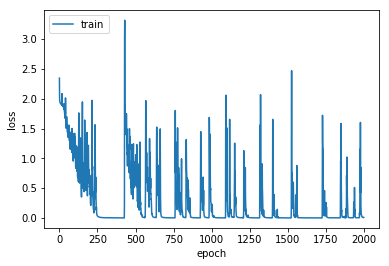

50/50 [==============================] - 0s 3ms/step
acc: 100.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [12]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

# 핍홀

    핍홀은 2000년에 Recurrent Nets that and Count 논문에서 제안한 LSTM의 변종
    기존의 LSTM에서 sigmoid layer는 ht와 xt만 입력으로 받지만 핍홀에서는 ct-1도 입력으로 받는다.
    이를 통해 좀 더 많은 맥락을 인식할 수 있다.

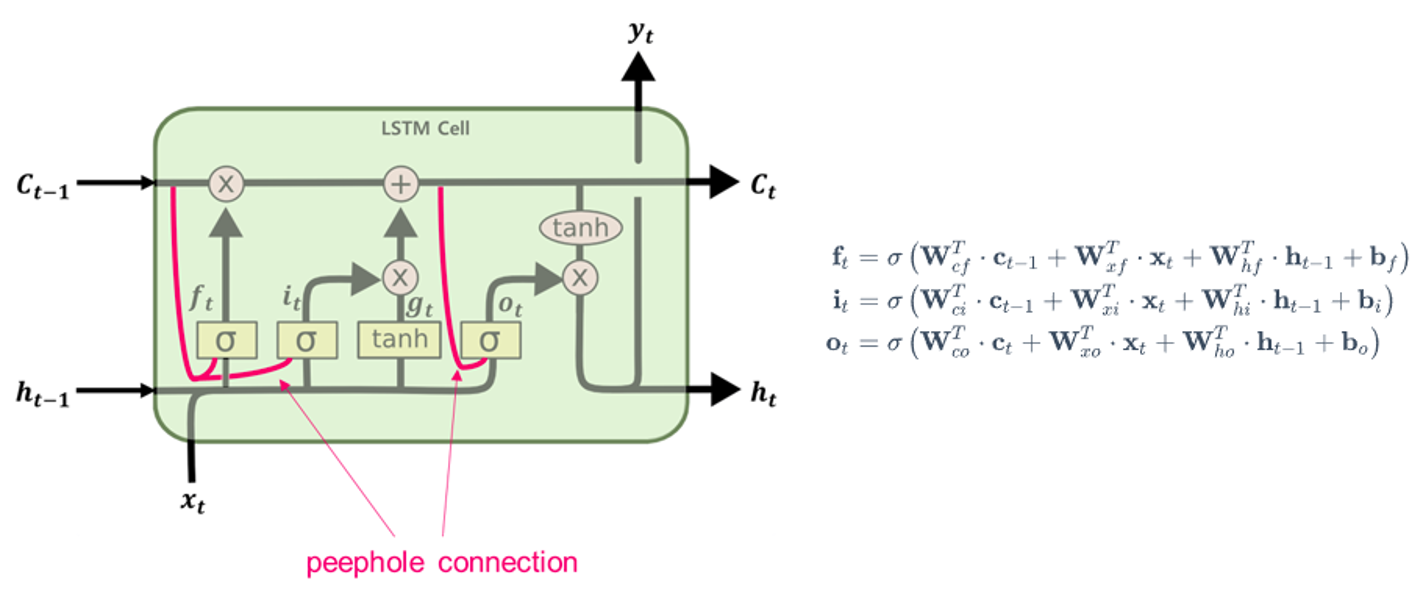

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 7 columns):
Date         5179 non-null object
Open         5179 non-null object
High         5179 non-null object
Low          5179 non-null object
Close        5179 non-null object
Adj Close    5179 non-null object
Volume       5179 non-null object
dtypes: object(7)
memory usage: 283.3+ KB
stock_info.shape:  (5178, 6)
stock_info[0]:  [2.437500e+00 2.500000e+00 1.927083e+00 1.958333e+00 1.958333e+00
 7.215600e+07]
price.shape:  (5178, 5)
price[0]:  [2.4375   2.5      1.927083 1.958333 1.958333]
norm_price[0]:  [0.00092814 0.00097971 0.00050704 0.00053282 0.00053282]
volume.shape:  (5178, 1)
volume[0]:  [72156000.]
norm_volume[0]:  [0.69017161]
x.shape:  (5178, 6)
x[0]:  [9.28143131e-04 9.79706638e-04 5.07040880e-04 5.32822633e-04
 5.32822633e-04 6.90171607e-01]
x[-1]:  [0.96451605 0.96645482 0.95354329 0.95758589 0.95758589 0.02142033]
y[0]:  [0.00053282]
y[-1]:  [0.95758589]
[[9.28143131e-04 

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


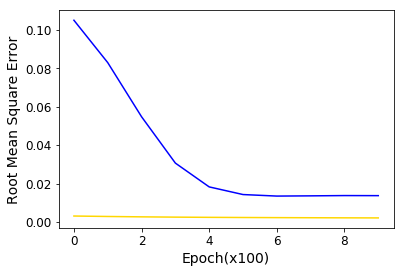

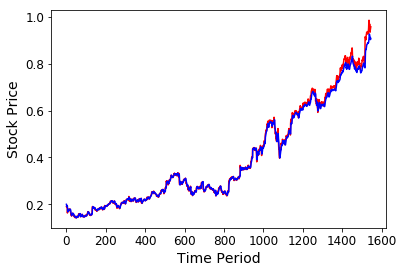

recent_data.shape: (1, 28, 6)
recent_data: [[[0.91386004 0.9151306  0.90735891 0.910791   0.910791   0.02879182]
  [0.91089    0.91383526 0.90374533 0.909471   0.909471   0.03147378]
  [0.90462816 0.90803538 0.89560243 0.90166628 0.90166628 0.0307939 ]
  [0.89913352 0.91689614 0.89696373 0.91600506 0.91600506 0.03143526]
  [0.91398381 0.92739858 0.9136703  0.92347976 0.92347976 0.0278683 ]
  [0.92684578 0.93168037 0.92087268 0.92555055 0.92555055 0.02120337]
  [0.92526172 0.935756   0.92220094 0.93356143 0.93356143 0.02016814]
  [0.92785228 0.93087187 0.91944541 0.93046762 0.93046762 0.03125421]
  [0.92796779 0.93262916 0.92628483 0.92734903 0.92734903 0.01630073]
  [0.92541026 0.93935306 0.92486573 0.93050065 0.93050065 0.02341249]
  [0.93127612 0.93778551 0.92614454 0.93682846 0.93682846 0.0255311 ]
  [0.92871859 0.93262916 0.92428    0.92845453 0.92845453 0.0331417 ]
  [0.93131741 0.93791754 0.93122667 0.93719978 0.93719978 0.01662237]
  [0.93801653 0.93844556 0.92772861 0.93108638 

In [66]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
 
 
# 랜덤에 의해 똑같은 결과를 재현하도록 시드 설정
# 하이퍼파라미터를 튜닝하기 위한 용도(흔들리면 무엇때문에 좋아졌는지 알기 어려움)
tf.set_random_seed(777)
 
 
# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()
 
# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원
 
# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()
 
 
# 하이퍼파라미터
input_data_column_cnt = 6  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수
 
seq_length = 28            # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 20   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율
 
epoch_num = 1000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률
 
 
# 데이터를 로딩한다.
stock_file_name = 'AMZN.csv' # 아마존 주가데이터 파일
encoding = 'euc-kr' # 문자 인코딩
names = ['Date','Open','High','Low','Close','Adj Close','Volume']
raw_dataframe = pd.read_csv(stock_file_name, names=names, encoding=encoding) #판다스이용 csv파일 로딩
raw_dataframe.info() # 데이터 정보 출력
 
# raw_dataframe.drop('Date', axis=1, inplace=True) # 시간열을 제거하고 dataframe 재생성하지 않기
del raw_dataframe['Date'] # 위 줄과 같은 효과
 
stock_info = raw_dataframe.values[1:].astype(np.float) # 금액&거래량 문자열을 부동소수점형으로 변환한다
print("stock_info.shape: ", stock_info.shape)
print("stock_info[0]: ", stock_info[0])
 
 
# 데이터 전처리
# 가격과 거래량 수치의 차이가 많아나서 각각 별도로 정규화한다
 
# 가격형태 데이터들을 정규화한다
# ['Open','High','Low','Close','Adj Close','Volume']에서 'Adj Close'까지 취함
# 곧, 마지막 열 Volume를 제외한 모든 열
price = stock_info[:,:-1]
norm_price = min_max_scaling(price) # 가격형태 데이터 정규화 처리
print("price.shape: ", price.shape)
print("price[0]: ", price[0])
print("norm_price[0]: ", norm_price[0])
print("="*100) # 화면상 구분용
 
# 거래량형태 데이터를 정규화한다
# ['Open','High','Low','Close','Adj Close','Volume']에서 마지막 'Volume'만 취함
# [:,-1]이 아닌 [:,-1:]이므로 주의하자! 스칼라가아닌 벡터값 산출해야만 쉽게 병합 가능
volume = stock_info[:,-1:]
norm_volume = min_max_scaling(volume) # 거래량형태 데이터 정규화 처리
print("volume.shape: ", volume.shape)
print("volume[0]: ", volume[0])
print("norm_volume[0]: ", norm_volume[0])
print("="*100) # 화면상 구분용
 
# 행은 그대로 두고 열을 우측에 붙여 합친다
x = np.concatenate((norm_price, norm_volume), axis=1) # axis=1, 세로로 합친다
print("x.shape: ", x.shape)
print("x[0]: ", x[0])    # x의 첫 값
print("x[-1]: ", x[-1])  # x의 마지막 값
print("="*100) # 화면상 구분용
 
y = x[:, [-2]] # 타켓은 주식 종가이다
print("y[0]: ",y[0])     # y의 첫 값
print("y[-1]: ",y[-1])   # y의 마지막 값
 
 
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용
 
for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가(정답)
    if i is 0:
        print(_x, "->", _y) # 첫번째 행만 출력해 봄
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가
 
 
# 학습용/테스트용 데이터 생성
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size
 
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
 
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])
 
 
# 텐서플로우 플레이스홀더 생성
# 입력 X, 출력 Y를 생성한다
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)
 
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)
 
predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)
 
 
# 모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    #cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
    #                                    forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    cell = tf.contrib.rnn.LSTMCell(num_units=rnn_cell_hidden_dim,
                                       forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign, use_peepholes=True)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell
 
# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()
 
# RNN Cell(여기서는 LSTM셀임)들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)
 
# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러 거래일의 주가를 이용해서 다음날의 주가 1개를 예측하기때문에 MANY-TO-ONE형태이다
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)
 
 
# 손실함수로 평균제곱오차를 사용한다
loss = tf.reduce_sum(tf.square(hypothesis - Y))
# 최적화함수로 AdamOptimizer를 사용한다
optimizer = tf.train.AdamOptimizer(learning_rate)
# optimizer = tf.train.RMSPropOptimizer(learning_rate) # LSTM과 궁합 별로임
 
train = optimizer.minimize(loss)
 
# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
# rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))
 
 
train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
# 학습한다
start_time = datetime.datetime.now() # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(epoch_num):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 100 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트용데이터로 rmse오차를 구한다
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)
        
        # 현재 오류를 출력한다
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
        
end_time = datetime.datetime.now() # 종료시간을 기록한다
elapsed_time = end_time - start_time # 경과시간을 구한다
print('elapsed_time:',elapsed_time)
print('elapsed_time per epoch:',elapsed_time/epoch_num)
 
 
# 하이퍼파라미터 출력
print('input_data_column_cnt:', input_data_column_cnt, end='')
print(',output_data_column_cnt:', output_data_column_cnt, end='')
 
print(',seq_length:', seq_length, end='')
print(',rnn_cell_hidden_dim:', rnn_cell_hidden_dim, end='')
print(',forget_bias:', forget_bias, end='')
print(',num_stacked_layers:', num_stacked_layers, end='')
print(',keep_prob:', keep_prob, end='')
 
print(',epoch_num:', epoch_num, end='')
print(',learning_rate:', learning_rate, end='')
 
print(',train_error:', train_error_summary[-1], end='')
print(',test_error:', test_error_summary[-1], end='')
print(',min_test_error:', np.min(test_error_summary))
 
# 결과 그래프 출력
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')
 
plt.figure(2)
plt.plot(testY, 'r')
plt.plot(test_predict, 'b')
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.show()
 
 
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = np.array([x[len(x)-seq_length : ]])
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)
 
# 내일 종가를 예측해본다
test_predict = sess.run(hypothesis, feed_dict={X: recent_data})
 
print("test_predict", test_predict[0])
test_predict = reverse_min_max_scaling(price,test_predict) # 금액데이터 역정규화한다
print("Tomorrow's stock price", test_predict[0]) # 예측한 주가를 출력한다
# LSTM RNN을 이용하여 아마존 주가 예측하기|작성자 똑똑이

# EX 8

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
rain2 = pd.read_csv('train.csv')

In [3]:
rain2.head(n=30)

Id  minutes_past  radardist_km   Ref  Ref_5x5_10th  Ref_5x5_50th  \
0    1             3          10.0   NaN           NaN           NaN   
1    1            16          10.0   NaN           NaN           NaN   
2    1            25          10.0   NaN           NaN           NaN   
3    1            35          10.0   NaN           NaN           NaN   
4    1            45          10.0   NaN           NaN           NaN   
5    1            55          10.0   NaN           NaN           NaN   
6    2             1           2.0   9.0           5.0           7.5   
7    2             6           2.0  26.5          22.5          25.5   
8    2            11           2.0  21.5          15.5          20.5   
9    2            16           2.0  18.0          14.0          17.5   
10   2            21           2.0  24.5          16.5          21.0   
11   2            26           2.0  12.0          12.0          16.0   
12   2            31           2.0  22.5          19.0          22.0   
13   2            37           2.0  14.0          14.0          18.5   
14   2            42           2.0  12.0          11.0          12.5   
15   2            47           2.0   1.5           3.5           7.0   
16   2            53           2.0  16.0          14.5          18.0   
17   2            58           2.0  22.0          16.5          22.5   
18   3             4          10.0   NaN           NaN           NaN   
19   3             9          10.0   NaN           NaN           NaN   
20   3            14          10.0   NaN           NaN           NaN   
21   3            18          10.0   NaN           NaN           NaN   
22   3            23          10.0   NaN           NaN           NaN   
23   3            28          10.0   NaN           NaN           NaN   
24   3            33          10.0   NaN           NaN           NaN   
25   3            38          10.0   NaN           NaN           NaN   
26   3            43          10.0   NaN           NaN           NaN   
27   3            48          10.0   NaN           NaN           NaN   
28   3            53          10.0   NaN           NaN           NaN   
29   3            58          10.0   NaN           NaN           NaN   

    Ref_5x5_90th  RefComposite  RefComposite_5x5_10th  RefComposite_5x5_50th  \
0            NaN           NaN                    NaN                    NaN   
1            NaN           NaN                    NaN                    NaN   
2            NaN           NaN                    NaN                    NaN   
3            NaN           NaN                    NaN                    NaN   
4            NaN           NaN                    NaN                    NaN   
5            NaN           NaN                    NaN                    NaN   
6           10.5          15.0                   10.5                   16.5   
7           31.5          26.5                   26.5                   28.5   
8           25.0          26.5                   23.5                   25.0   
9           21.0          20.5                   18.0                   20.5   
10          24.5          24.5                   21.0                   24.0   
11          20.0          16.5                   17.0                   19.0   
12          25.0          26.0                   23.5                   25.5   
13          21.0          19.5                   20.0                   21.0   
14          17.0          19.5                   18.0                   21.0   
15          10.5          18.0                   16.5                   18.5   
16          23.5          28.0                   23.5                   26.5   
17          26.5          31.5                   26.5                   29.0   
18           NaN           NaN                    NaN                    NaN   
19           NaN           NaN                    NaN                    NaN   
20           NaN           NaN                    NaN                    NaN   
21         

In [4]:
train_df = rain2.dropna(subset=['Ref'])

In [5]:
train_df.describe()

Id  minutes_past  radardist_km           Ref  Ref_5x5_10th  \
count  6.349375e+06  6.349375e+06  6.349375e+06  6.349375e+06  5.269105e+06   
mean   5.894813e+05  2.927051e+01  9.286182e+00  2.292666e+01  1.998385e+01   
std    3.406124e+05  1.715383e+01  4.068784e+00  1.035516e+01  9.195141e+00   
min    2.000000e+00  0.000000e+00  0.000000e+00 -3.100000e+01 -3.200000e+01   
25%    2.923290e+05  1.400000e+01  6.000000e+00  1.600000e+01  1.450000e+01   
50%    5.906240e+05  2.900000e+01  1.000000e+01  2.250000e+01  2.000000e+01   
75%    8.883170e+05  4.400000e+01  1.200000e+01  2.950000e+01  2.600000e+01   
max    1.180945e+06  5.900000e+01  2.100000e+01  7.100000e+01  6.250000e+01   

       Ref_5x5_50th  Ref_5x5_90th  RefComposite  RefComposite_5x5_10th  \
count  6.156846e+06  6.349288e+06  6.349375e+06           5.550921e+06   
mean   2.302103e+01  2.812518e+01  2.540071e+01           2.256900e+01   
std    9.882618e+00  1.028228e+01  1.044013e+01           9.547383e+00   
min   -3.200000e+01 -2.850000e+01 -2.800000e+01          -3.050000e+01   
25%    1.650000e+01  2.150000e+01  1.850000e+01           1.650000e+01   
50%    2.300000e+01  2.750000e+01  2.500000e+01           2.250000e+01   
75%    2.950000e+01  3.500000e+01  3.200000e+01           2.900000e+01   
max    6.900000e+01  7.250000e+01  9.250000e+01           6.600000e+01   

       RefComposite_5x5_50th      ...       RhoHV_5x5_90th           Zdr  \
count           6.207490e+06      ...         4.600898e+06  4.069799e+06   
mean            2.541082e+01      ...         1.013113e+00  5.295568e-01   
std             1.003713e+01      ...         4.179456e-02  1.476643e+00   
min            -2.750000e+01      ...         2.083333e-01 -7.875000e+00   
25%             1.850000e+01      ...         9.983333e-01 -1.875000e-01   
50%             2.500000e+01      ...         1.005000e+00  3.750000e-01   
75%             3.200000e+01      ...         1.051667e+00  1.062500e+00   
max             7.100000e+01      ...         1.051667e+00  7.937500e+00   

       Zdr_5x5_10th  Zdr_5x5_50th  Zdr_5x5_90th           Kdp  Kdp_5x5_10th  \
count  3.577674e+06  4.095586e+06  4.600898e+06  3.494665e+06  2.978691e+06   
mean  -6.975932e-01  3.815768e-01  2.057199e+00  3.230033e-02 -3.409001e+00   
std    1.017368e+00  9.260191e-01  1.617217e+00  3.699795e+00  2.719573e+00   
min   -7.875000e+00 -7.875000e+00 -7.875000e+00 -9.604000e+01 -8.079000e+01   
25%   -1.062500e+00  0.000000e+00  1.062500e+00 -1.410004e+00 -4.540008e+00   
50%   -6.250000e-01  3.125000e-01  1.687500e+00  0.000000e+00 -2.820007e+00   
75%   -1.875000e-01  6.875000e-01  2.562500e+00  1.409988e+00 -1.740006e+00   
max    7.937500e+00  7.937500e+00  7.937500e+00  1.797500e+02  3.169998e+00   

       Kdp_5x5_50th  Kdp_5x5_90th      Expected  
count  3.511354e+06  4.062702e+06  6.349375e+06  
mean  -3.781228e-01  4.038652e+00  1.714876e+01  
std    2.087361e+00  3.902270e+00  2.025279e+02  
min   -7.168000e+01 -1.002000e+02  1.000000e-02  
25%   -7.100067e-01  2.059998e+00  5.080003e-01  
50%    0.000000e+00  3.509994e+00  1.425001e+00  
75%    3.499908e-01  5.629990e+00  4.064002e+00  
max    1.280000e+01  1.446000e+02  3.301773e+04  

[8 rows x 24 columns]

In [6]:
train_df.isna().sum()

Id                             0
minutes_past                   0
radardist_km                   0
Ref                            0
Ref_5x5_10th             1080270
Ref_5x5_50th              192529
Ref_5x5_90th                  87
RefComposite                   0
RefComposite_5x5_10th     798454
RefComposite_5x5_50th     141885
RefComposite_5x5_90th         67
RhoHV                    2279576
RhoHV_5x5_10th           2771701
RhoHV_5x5_50th           2253789
RhoHV_5x5_90th           1748477
Zdr                      2279576
Zdr_5x5_10th             2771701
Zdr_5x5_50th             2253789
Zdr_5x5_90th             1748477
Kdp                      2854710
Kdp_5x5_10th             3370684
Kdp_5x5_50th             2838021
Kdp_5x5_90th             2286673
Expected                       0
dtype: int64

In [6]:
train_df = train_df.fillna(0)
train_df.isna().sum()

Id                       0
minutes_past             0
radardist_km             0
Ref                      0
Ref_5x5_10th             0
Ref_5x5_50th             0
Ref_5x5_90th             0
RefComposite             0
RefComposite_5x5_10th    0
RefComposite_5x5_50th    0
RefComposite_5x5_90th    0
RhoHV                    0
RhoHV_5x5_10th           0
RhoHV_5x5_50th           0
RhoHV_5x5_90th           0
Zdr                      0
Zdr_5x5_10th             0
Zdr_5x5_50th             0
Zdr_5x5_90th             0
Kdp                      0
Kdp_5x5_10th             0
Kdp_5x5_50th             0
Kdp_5x5_90th             0
Expected                 0
dtype: int64

In [7]:
train_seq = train_df.groupby(['Id']) ## groupby메소드를 이용하여 id를 그룹화함

In [8]:
#
train_seq_size = train_seq.size()
train_seq_size.count(), train_seq_size.max()

(731556, 19)

In [9]:
X = np.zeros((731556, 19, 22))
y = np.zeros((731556, 1))

In [10]:
i = 0
for name, group in train_seq:
    # d.shape is (seq_length, 24)
    d = group.values
    # column 1~22 are features.
    # column 0 is Id and column 23 is target.
    # save 1~22 features to 0~21 index of dataset up to d.shape[0].
    X[i, :d.shape[0], 0:22] = d[:, 1:23]
    y[i, 0] = d[0, 23]
    i += 1;
print(i)

731556


In [11]:
def feed_gen(X, y, batch_size=1024):
    shuffled_index = np.random.permutation(len(X)) # shuffle index
    start = 0
    while 1:
        end = start + batch_size
        if end > len(X):  # cannot exceed X's length
            end = len(X)
        yield X[shuffled_index[start:end]], y[shuffled_index[start:end]]
        start = end
        if end >= len(X): # if arrive at the end, shuffle again.
            shuffled_index = np.random.permutation(len(X))
            start = 0

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
batch_size = 1024
steps_per_epoch = np.ceil(X_train.shape[0] / batch_size)
validation_steps = np.ceil(X_test.shape[0] / batch_size)
steps_per_epoch, validation_steps

(643.0, 72.0)

In [14]:
train_gen = feed_gen(X_train, y_train, batch_size)
val_gen = feed_gen(X_test, y_test, batch_size)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(35, input_shape=(None, 22)))
model.add(Dense(1))

model.compile(loss='mae', optimizer='rmsprop')

In [16]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=steps_per_epoch,
                              epochs=100,
                              validation_data=val_gen,
                              validation_steps=validation_steps)

Epoch 1/100
643/643 [==============================] - 18s 28ms/step - loss: 23.3781 - val_loss: 22.4762
Epoch 2/100
643/643 [==============================] - 17s 26ms/step - loss: 23.2803 - val_loss: 22.5541
Epoch 3/100
643/643 [==============================] - 17s 27ms/step - loss: 23.2525 - val_loss: 22.5051
Epoch 4/100
643/643 [==============================] - 17s 27ms/step - loss: 23.2354 - val_loss: 22.0474
Epoch 5/100
643/643 [==============================] - 17s 27ms/step - loss: 23.2201 - val_loss: 22.9945
Epoch 6/100
643/643 [==============================] - 17s 27ms/step - loss: 23.2099 - val_loss: 23.1794
Epoch 7/100
643/643 [==============================] - 17s 26ms/step - loss: 23.2010 - val_loss: 22.0522
Epoch 8/100
643/643 [==============================] - 17s 26ms/step - loss: 23.1941 - val_loss: 22.2700
Epoch 9/100
643/643 [==============================] - 17s 26ms/step - loss: 23.1894 - val_loss: 22.3911
Epoch 10/100
643/643 [==============================] -

In [19]:
rain2_test = pd.read_csv('test.csv')
test_df = rain2_test.fillna(0)

In [20]:
test_df.head()

Id  minutes_past  radardist_km   Ref  Ref_5x5_10th  Ref_5x5_50th  \
0   1             1           8.0   0.0           0.0           0.0   
1   1             5           8.0  10.0           0.0          10.0   
2   1             8           8.0   0.0           0.0           7.0   
3   1            12           8.0  14.0           0.0           9.0   
4   1            15           8.0  10.5           0.0           9.0   

   Ref_5x5_90th  RefComposite  RefComposite_5x5_10th  RefComposite_5x5_50th  \
0          14.0           0.0                    0.0                    0.0   
1          18.0          11.5                    0.0                   11.0   
2          14.5           0.0                    0.0                    7.0   
3          16.0          14.0                    0.0                    9.0   
4          15.5          13.5                    0.0                    9.0   

       ...       RhoHV_5x5_50th  RhoHV_5x5_90th  Zdr  Zdr_5x5_10th  \
0      ...                  0.0             0.0  0.0           0.0   
1      ...                  0.0             0.0  0.0           0.0   
2      ...                  0.0             0.0  0.0           0.0   
3      ...                  0.0             0.0  0.0           0.0   
4      ...                  0.0             0.0  0.0           0.0   

   Zdr_5x5_50th  Zdr_5x5_90th  Kdp  Kdp_5x5_10th  Kdp_5x5_50th  Kdp_5x5_90th  
0           0.0           0.0  0.0           0.0           0.0           0.0  
1           0.0           0.0  0.0           0.0           0.0           0.0  
2           0.0           0.0  0.0           0.0           0.0           0.0  
3           0.0           0.0  0.0           0.0           0.0           0.0  
4           0.0           0.0  0.0           0.0           0.0           0.0  

[5 rows x 23 columns]

In [21]:
test_seq = test_df.groupby(['Id'])
test_seq_size = test_seq.size()
test_seq_size.count(), test_seq_size.max()

(717625, 19)

In [24]:
X_test = np.zeros((717625, 19, 22))

In [25]:
i = 0
for name, group in test_seq:
    # d.shape is (seq_length, 23)
    d = group.values
    # column 1~22 are features.
    # save 1~22 features to 0~21 index of dataset up to d.shape[0].
    X_test[i, :d.shape[0], 0:22] = d[:, 1:23]
    i += 1;
print(i)

717625


In [29]:
pred = model.predict(X_test)

In [30]:
pred_with_index = np.hstack((np.arange(1, pred.shape[0]+1).reshape(-1,1), pred))
np.savetxt("test_prediction.csv", pred_with_index, "%d,%f", 
           delimiter=",", header="Id,Expected", comments="")

<hr>
<h1>3.GRU Cell(Gated Recurrent Cell)</h1>
<hr>

GRU cell은 2014년 조경현 등의 논문에서 제안됨

[참조]
Cho, K., Van Merriënboer, B., Gulcehre, C., Bahdanau, D., Bougares, F., Schwenk, H., & Bengio, Y. (2014). 
Learning phrase representations using RNN encoder-decoder for statistical machine translation. arXiv preprint arXiv:1406.1078.<br>

GRU 셀은 그림에서 확인할 수 있는 것과 같이 LSTM 셀의 간소화된 버전이고 유사하게 작동함
- LSTM의 장점을 유지하면서도 계산 복잡성을 낮춘 셀 구조
- Gradient vanishing/ Explosion 문제를 극복했다는 점에서 LSTM과 유사하지만 LSTM에서 게이트의 일부를 생략함

<hr>

<h2>LSTM Cell과 GRU Cell의 차이점</h2>

<h3>LSTM cell(Long Short-Term Memory)</h3>
    
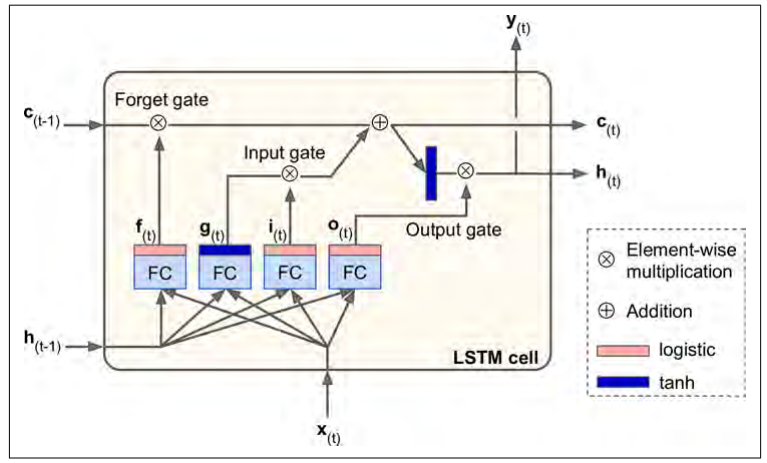

<hr/>



<h3>GRU cell(Gated Recurrent Unit)</h3>

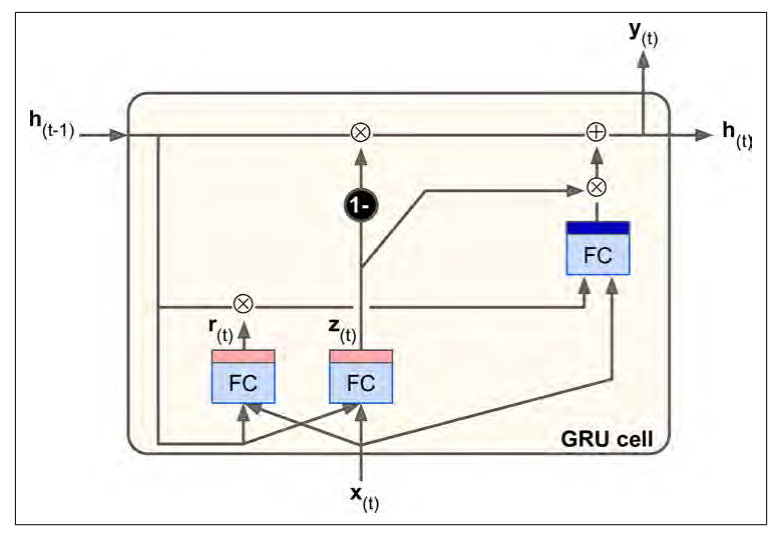

LSTM에서의 변경 점
1. LSTM의 상태 Vector인 c(t), h(t)가 h(t)로 통합

2. 게이트 제어기 f(t), i(t)가 z(t)로 통합되며 z(t)는 Update gate임
    - z(t)는 Forget Gate, Input Gate를 모두 제어 
    - z(t)가 1을 출력하면 Forget Gate가 열리고 Input Gate가 닫히며
    - z(t)가 0 이면 Forget Gate가 닫히고 Input Gate가 열림.
    > 즉, 이전 (t-1)의 기억이 저장될 때 마다 타임스탭 t의 입력이 삭제됨.
    
    
3. 출력 게이트가 없음 > 전체 상태 벡터가 매 Time Step 마다 출력됨
4. 이전상태의 어느 부분이 출력될지 제어하는 새로운 게이트 제어기 r(t) 존재함

<hr>

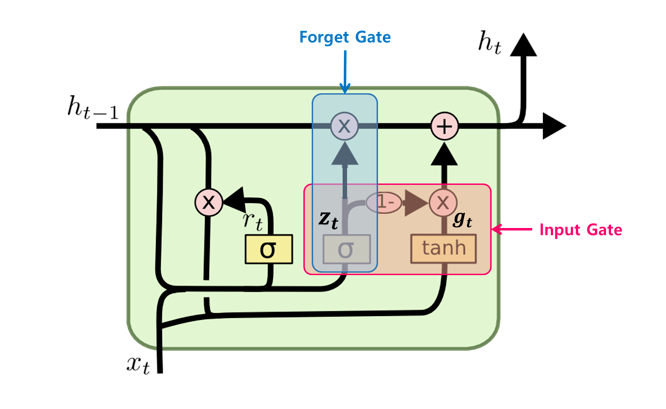


GRU state vector 계산 식
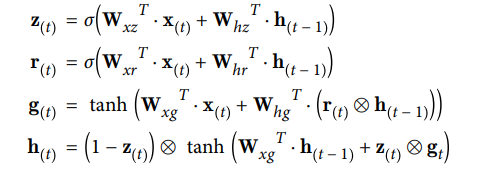

z(t),r(t)는 각각 update, reset gate를 의미<br>
Update, reset gate에서는 활성화 함수로 sigmoid 함수를 사용

두 게이트 모두 현 시점의 입력값(x(t))와 직전 시점 은닉층 값(h(t-1))을 반영하여 구함

W는 각각 입력값과 은닉층 값을 선형결합하는 Parameter(가중치)<br>
update, reset gate의 활성화 함수는 시그모이드 이므로 0~1사이의 범위를 갖음

기억에 관련된 과정
- 현 시점(t)에서 기억해 둘 만한 정보를 g(t)로 정의
- g(t)는 현 시점 정보(W * x(t))와 과거정보(W * h(t-1))를 반영하되, 과거 정보를 얼마나 반영할지는 reset gate 값에 의존함


r(t) 값이 0이면 과거 정보를 모두 잊고 1이면 과거의 정보를 모두 갖으며 r(t)값에 상관없이 현재 정보는 반영됨

위의 활성화 함수 tanh의 경우 -1 ~ 1 사이의 범위를 갖음

현재정보 h(t)에서 기억할만한 정보 g(t) 를 얼마나 조합할지 결정하는 것은 z(t) 즉 Update gate임

- z(t)가 1이라면 과거정보를 모두 잊고, 현재 정보 만을 기억함
- z(t)가 0이라면 과거정보는 모두 기억하지만, 현재 정보는 모두 무시 

<hr>
<h3>TensorFlow GRU Cell 만드는 방법</h3>

In [17]:
n_neurons = 5

gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)

<hr>
<h3>GRU Code Example</h3>

GRU Code Example 1 -> 덧셈에 대한 학습 방식

1) c = a + b <br/>
2) 숫자를 역 bitstring으로 전환<br/>
3) 더 할 때 두 bitstring을 더해서 계산함<br/>
4) 숫자에서 오른쪽부터 시작하여 합계가 10보다 크면 일정한 숫자를 갖게 됨 <br/>
-> 기억할 수 있으므로 GRU에 적용 가능
따라서, 역 bitstring화 한 숫자의 덧셈에 학습이 가능하다.

<hr>

각 라이브러리를 Import

In [68]:
import tensorflow as tf
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from IPython import display
% matplotlib inline
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #간단한 warning Message가 나와서 없애기 위해 사용

<hr>
Dataset 생성

In [69]:
def as_bytes(num, final_size): # byte로 변경
    """
    integer를 bitstring으로 변환
    final_size는 bitstring의 길이
    Arguments
    ---------
    num: int
        The number to convert.
    final_size: int
        The length of the bitstring.
        
    Returns
    -------
    list
        
    """
    
    
    res = []
    for _ in range(final_size):
        res.append(num % 2)
        num //= 2
    return res
    
    """
    Examples
    --------
    >>> as_bytes(3, 4)
    [1, 1, 0, 0]
    >>> as_bytes(3, 5)
    [1, 1, 0, 0, 0]
    """
    
def generate_example(num_bits):
    """Generate an example addition.
    
    Arguments
    ---------
    num_bits: int
        The number of bits to use.
        
    Returns
    -------
    a: list
        The first term (represented as reversed bitstring) of the addition.
    b: list
        The second term (represented as reversed bitstring) of the addition.
    c: list
        The addition (a + b) represented as reversed bitstring.
        
    Examples
    --------
    >>> np.random.seed(4)
    >>> a, b, c = generate_example(3)
    >>> a
    [0, 1, 0]
    >>> b
    [0, 1, 0]
    >>> c
    [1, 0, 0]
    >>> # Notice that these numbers are represented as reversed bitstrings)
    """
    a = random.randint(0, 2**(num_bits - 1) - 1)
    b = random.randint(0, 2**(num_bits - 1) - 1)
    res = a + b
    return (as_bytes(a,  num_bits),
            as_bytes(b,  num_bits),
            as_bytes(res,num_bits))

def generate_batch(num_bits, batch_size):
    """Generates instances of the addition problem.
    
    Arguments
    ---------
    num_bits: int
        The number of bits to use for each number.
    batch_size: int
        The number of examples to generate.
    
    Returns
    -------
    x: np.array
        Two numbers to be added represented as bits (in reversed order).
        Shape: b, i, n
        Where:
            b is bit index from the end.
            i is example idx in batch.
            n is one of [0,1] depending for first and second summand respectively.
    y: np.array
        The result of the addition.
        Shape: b, i, n
        Where:
            b is bit index from the end.
            i is example idx in batch.
            n is always 0 since there is only one result.
    """
    x = np.empty((batch_size, num_bits, 2))
    y = np.empty((batch_size, num_bits, 1))

    for i in range(batch_size):
        a, b, r = generate_example(num_bits)
        x[i, :, 0] = a
        x[i, :, 1] = b
        y[i, :, 0] = r
    return x, y

<hr>
Configuration - batch_size와 time_size를 조절

In [ ]:
batch_size = 100
time_size = 5

#5비트에서 표현되는 수의 100가지 traning set과 test set을 생성
X_train, Y_train = generate_batch(time_size, batch_size)
X_test, Y_test = generate_batch(time_size, batch_size)

<hr>
GRU Model을 정의 & state vector를 통해 모델 생성

In [71]:
class GRU:
    """Implementation of a Gated Recurrent Unit (GRU) as described in [1].
    
    [1] Chung, J., Gulcehre, C., Cho, K., & Bengio, Y. (2014). Empirical evaluation of gated recurrent neural networks on sequence modeling. arXiv preprint arXiv:1412.3555.
    
    Arguments
    ---------
    input_dimensions: int
        The size of the input vectors (x_t).
    hidden_size: int
        The size of the hidden layer vectors (h_t).
    dtype: obj
        The datatype used for the variables and constants (optional).
    """
    
    def __init__(self, input_dimensions, hidden_size, dtype=tf.float64):
        self.input_dimensions = input_dimensions
        self.hidden_size = hidden_size
        
        # Weights for input vectors of shape (input_dimensions, hidden_size)
        self.Wr = tf.Variable(tf.truncated_normal(
            dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.01), name='Wr')
        self.Wz = tf.Variable(tf.truncated_normal(
            dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.01), name='Wz')
        self.Wh = tf.Variable(tf.truncated_normal(
            dtype=dtype, shape=(self.input_dimensions, self.hidden_size), mean=0, stddev=0.01), name='Wh')
        
        # Weights for hidden vectors of shape (hidden_size, hidden_size)
        self.Ur = tf.Variable(tf.truncated_normal(
            dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.01), name='Ur')
        self.Uz = tf.Variable(tf.truncated_normal(
            dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.01), name='Uz')
        self.Uh = tf.Variable(tf.truncated_normal(
            dtype=dtype, shape=(self.hidden_size, self.hidden_size), mean=0, stddev=0.01), name='Uh')
        
        # Biases for hidden vectors of shape (hidden_size,)
        self.br = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.01), name='br')
        self.bz = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.01), name='bz')
        self.bh = tf.Variable(tf.truncated_normal(dtype=dtype, shape=(self.hidden_size,), mean=0, stddev=0.01), name='bh')
        
        # Define the input layer placeholder
        self.input_layer = tf.placeholder(dtype=tf.float64, shape=(None, None, input_dimensions), name='input')
        
        # Put the time-dimension upfront for the scan operator
        self.x_t = tf.transpose(self.input_layer, [1, 0, 2], name='x_t')       
        self.h_0 = tf.matmul(self.x_t[0, :, :], tf.zeros(dtype=tf.float64, shape=(input_dimensions, hidden_size)), name='h_0')
        
        # Perform the scan operator
        self.h_t_transposed = tf.scan(self.forward_pass, self.x_t, initializer=self.h_0, name='h_t_transposed')
        
        # Transpose the result back
        self.h_t = tf.transpose(self.h_t_transposed, [1, 0, 2], name='h_t')

    def forward_pass(self, h_tm1, x_t):
        """Perform a forward pass.
        
        Arguments
        ---------
        h_tm1: np.matrix
            The hidden state at the previous timestep (h_{t-1}).
        x_t: np.matrix
            The input vector.
        """
        # Definitions of z_t and r_t
        z_t = tf.sigmoid(tf.matmul(x_t, self.Wz) + tf.matmul(h_tm1, self.Uz) + self.bz)
        r_t = tf.sigmoid(tf.matmul(x_t, self.Wr) + tf.matmul(h_tm1, self.Ur) + self.br)
        
        # Definition of h~_t
        h_proposal = tf.tanh(tf.matmul(x_t, self.Wh) + tf.matmul(tf.multiply(r_t, h_tm1), self.Uh) + self.bh)
        
        # Compute the next hidden state
        h_t = tf.multiply(1 - z_t, h_tm1) + tf.multiply(z_t, h_proposal)
        
        return h_t

<hr>
Model을 초기화 하고 Train 하는 코드

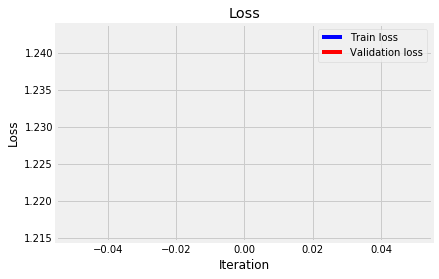

Iteration: 0, train loss: 1.2159, test loss: 1.2426
a : 1024, b : 16, y : 0


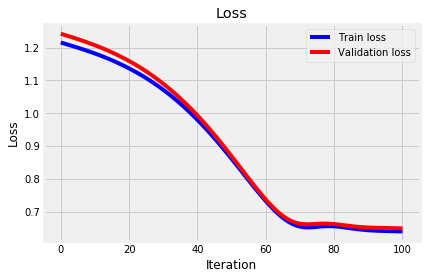

Iteration: 100, train loss: 0.6392, test loss: 0.6485
a : 1024, b : 16, y : 31744


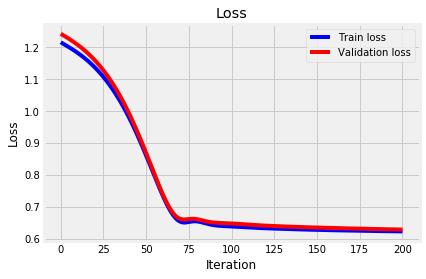

Iteration: 200, train loss: 0.6236, test loss: 0.6294
a : 1024, b : 16, y : 1024


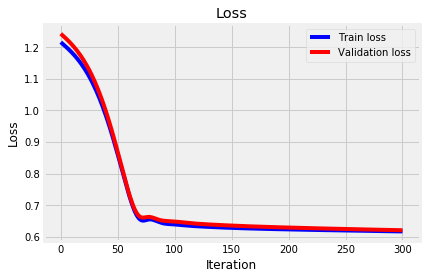

Iteration: 300, train loss: 0.6172, test loss: 0.6210
a : 1024, b : 16, y : 1024


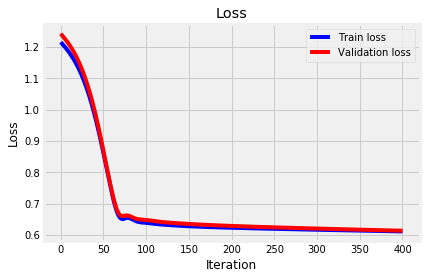

Iteration: 400, train loss: 0.6119, test loss: 0.6142
a : 1024, b : 16, y : 1024


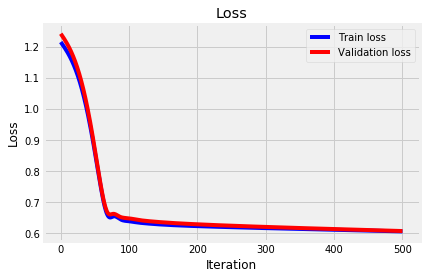

Iteration: 500, train loss: 0.6066, test loss: 0.6078
a : 1024, b : 16, y : 1024


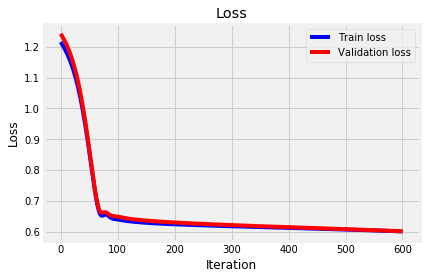

Iteration: 600, train loss: 0.6005, test loss: 0.6010
a : 1024, b : 16, y : 1024


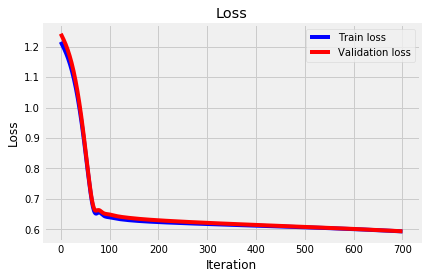

Iteration: 700, train loss: 0.5929, test loss: 0.5933
a : 1024, b : 16, y : 1024


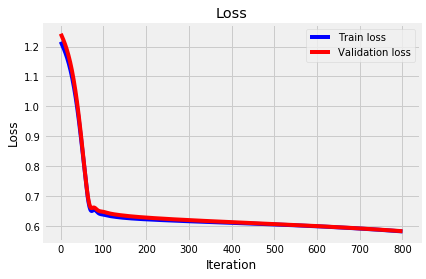

Iteration: 800, train loss: 0.5833, test loss: 0.5840
a : 1024, b : 16, y : 1024


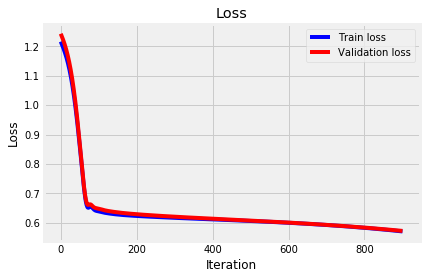

Iteration: 900, train loss: 0.5710, test loss: 0.5727
a : 1024, b : 16, y : 1024


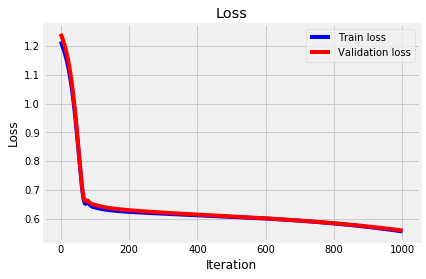

Iteration: 1000, train loss: 0.5556, test loss: 0.5589
a : 1024, b : 16, y : 1024


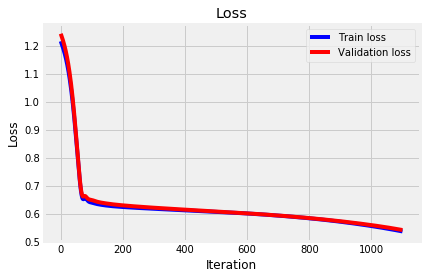

Iteration: 1100, train loss: 0.5364, test loss: 0.5412
a : 1024, b : 16, y : 1024


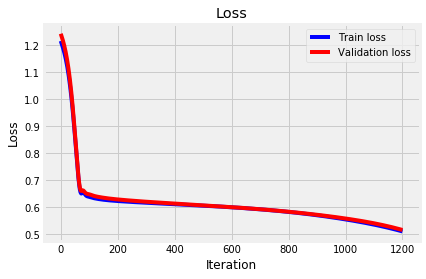

Iteration: 1200, train loss: 0.5112, test loss: 0.5165
a : 1024, b : 16, y : 1040


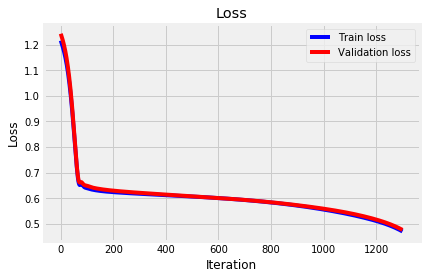

Iteration: 1300, train loss: 0.4702, test loss: 0.4760
a : 821, b : 231, y : 1022


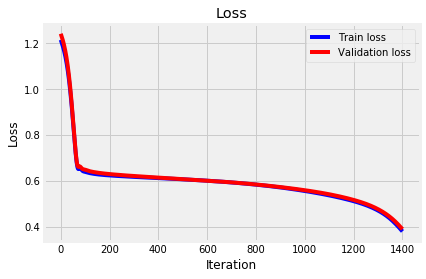

Iteration: 1400, train loss: 0.3790, test loss: 0.3888
a : 821, b : 231, y : 1016


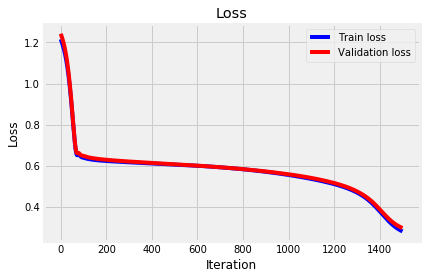

Iteration: 1500, train loss: 0.2810, test loss: 0.2975
a : 821, b : 231, y : 1016


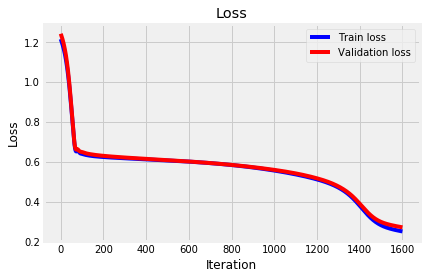

Iteration: 1600, train loss: 0.2500, test loss: 0.2705
a : 821, b : 231, y : 1016


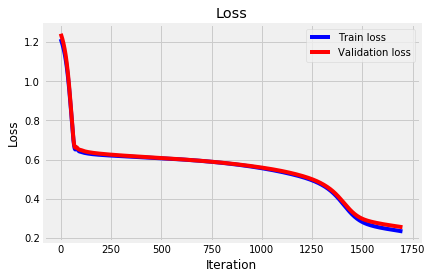

Iteration: 1700, train loss: 0.2328, test loss: 0.2543
a : 821, b : 231, y : 2040


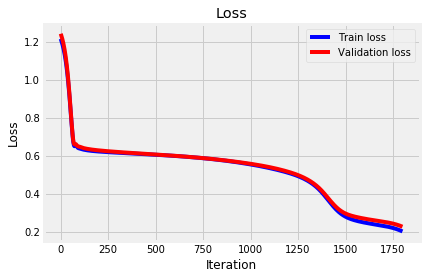

Iteration: 1800, train loss: 0.2035, test loss: 0.2283
a : 821, b : 231, y : 2008


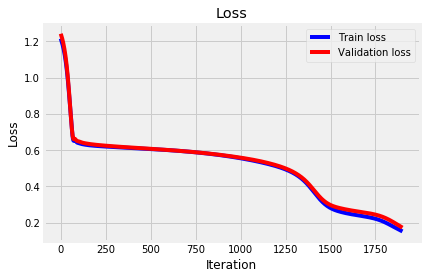

Iteration: 1900, train loss: 0.1520, test loss: 0.1727
a : 821, b : 231, y : 1816


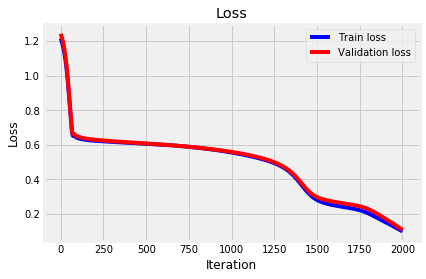

Iteration: 2000, train loss: 0.0990, test loss: 0.1080
a : 821, b : 231, y : 1048


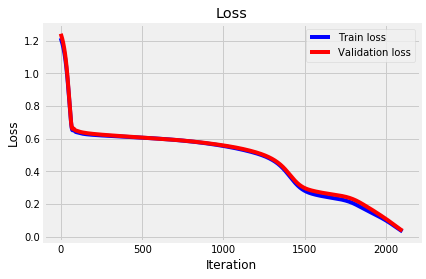

Iteration: 2100, train loss: 0.0326, test loss: 0.0368
a : 821, b : 231, y : 1052


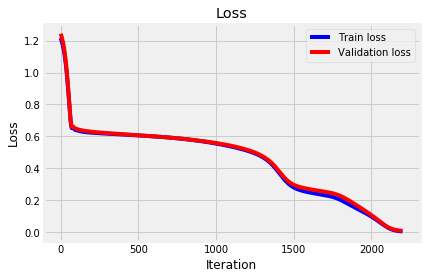

Iteration: 2200, train loss: 0.0060, test loss: 0.0096
a : 857, b : 78, y : 935


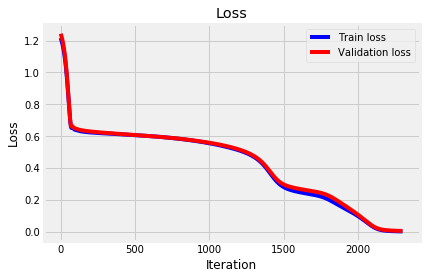

Iteration: 2300, train loss: 0.0027, test loss: 0.0055
a : 99, b : 235, y : 334


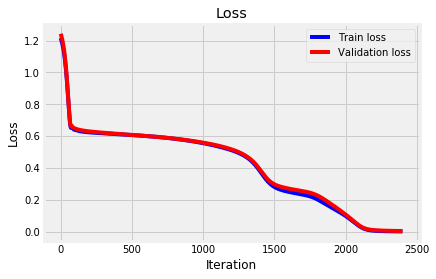

Iteration: 2400, train loss: 0.0016, test loss: 0.0041
a : 941, b : 71, y : 1012


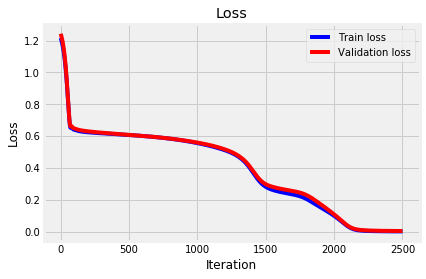

Iteration: 2500, train loss: 0.0010, test loss: 0.0035
a : 227, b : 222, y : 449


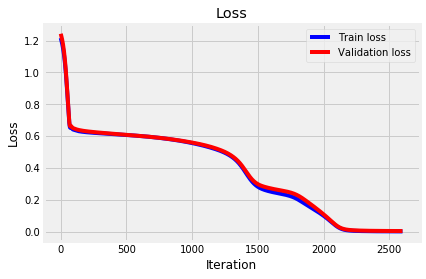

Iteration: 2600, train loss: 0.0008, test loss: 0.0031
a : 510, b : 228, y : 738


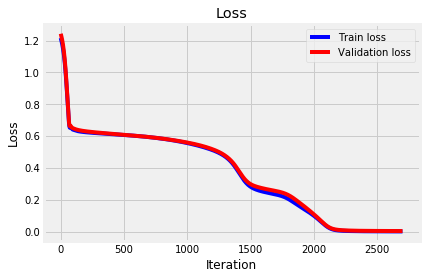

Iteration: 2700, train loss: 0.0006, test loss: 0.0029
a : 186, b : 78, y : 264


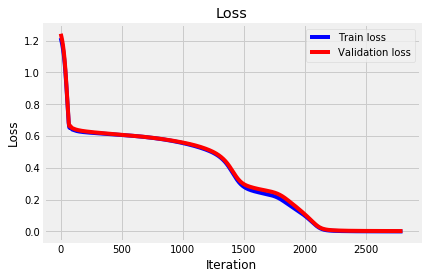

Iteration: 2800, train loss: 0.0005, test loss: 0.0027
a : 279, b : 209, y : 488


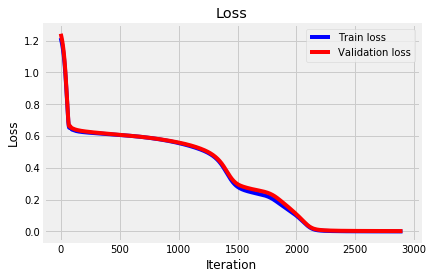

Iteration: 2900, train loss: 0.0004, test loss: 0.0025
a : 847, b : 106, y : 953


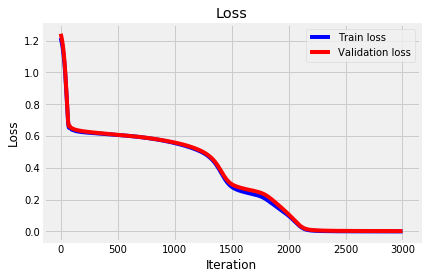

Iteration: 3000, train loss: 0.0003, test loss: 0.0024
a : 765, b : 249, y : 1014


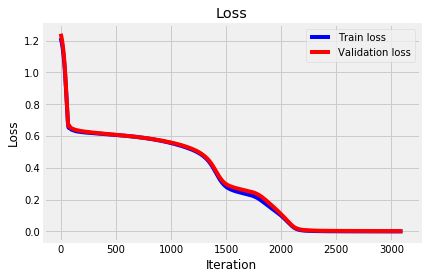

Iteration: 3100, train loss: 0.0003, test loss: 0.0022
a : 122, b : 156, y : 278


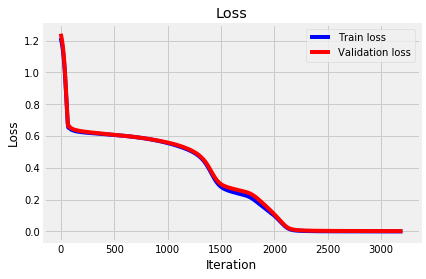

Iteration: 3200, train loss: 0.0002, test loss: 0.0021
a : 124, b : 113, y : 237


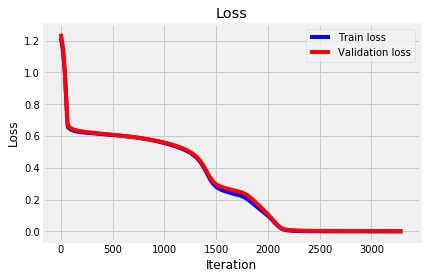

Iteration: 3300, train loss: 0.0002, test loss: 0.0020
a : 891, b : 203, y : 1094


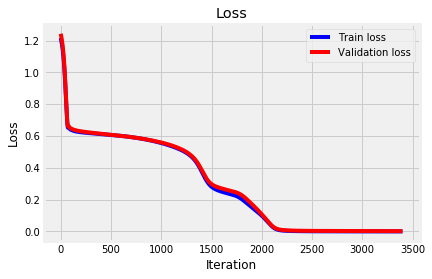

Iteration: 3400, train loss: 0.0002, test loss: 0.0019
a : 654, b : 75, y : 729


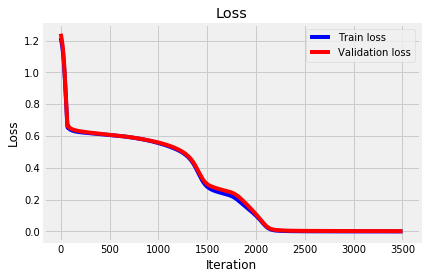

Iteration: 3500, train loss: 0.0002, test loss: 0.0018
a : 371, b : 227, y : 598


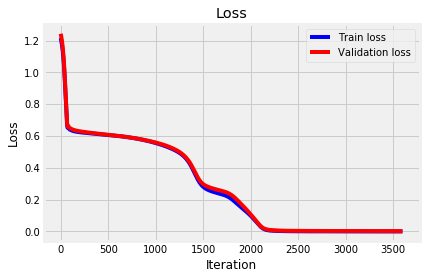

Iteration: 3600, train loss: 0.0001, test loss: 0.0017
a : 92, b : 126, y : 218


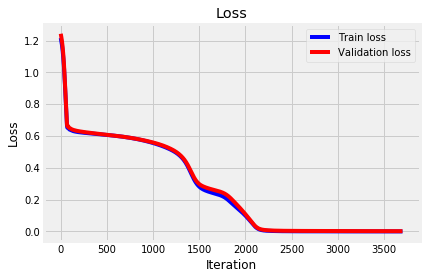

Iteration: 3700, train loss: 0.0001, test loss: 0.0017
a : 273, b : 193, y : 466


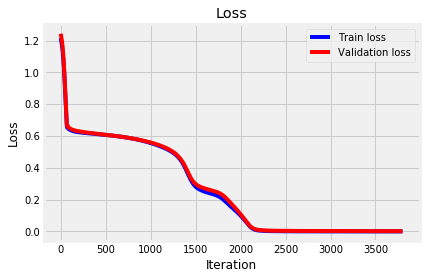

Iteration: 3800, train loss: 0.0001, test loss: 0.0016
a : 197, b : 163, y : 360


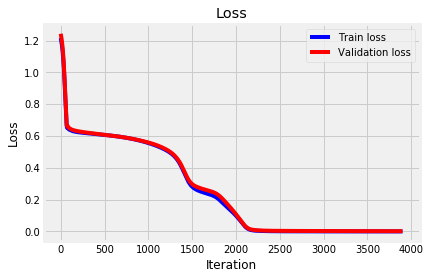

Iteration: 3900, train loss: 0.0001, test loss: 0.0015
a : 222, b : 21, y : 243


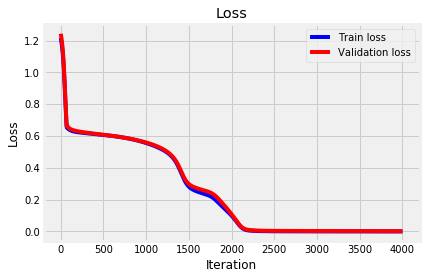

Iteration: 4000, train loss: 0.0001, test loss: 0.0015
a : 943, b : 109, y : 1052


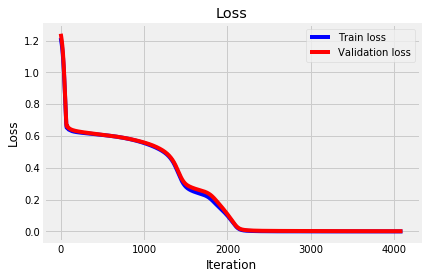

Iteration: 4100, train loss: 0.0001, test loss: 0.0014
a : 513, b : 211, y : 724


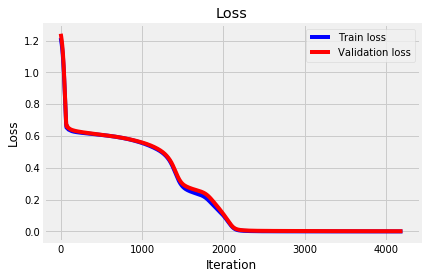

Iteration: 4200, train loss: 0.0001, test loss: 0.0014
a : 42, b : 239, y : 281


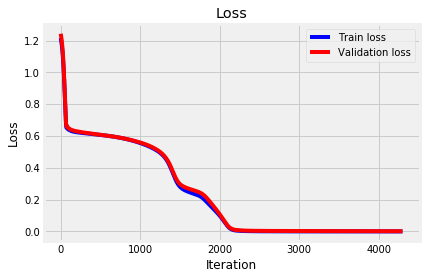

Iteration: 4300, train loss: 0.0001, test loss: 0.0013
a : 810, b : 69, y : 879


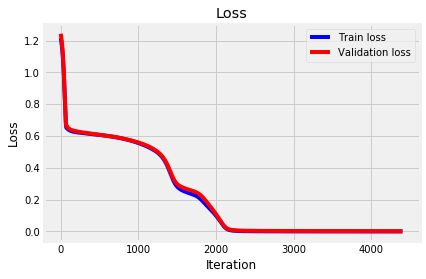

Iteration: 4400, train loss: 0.0001, test loss: 0.0013
a : 465, b : 52, y : 517


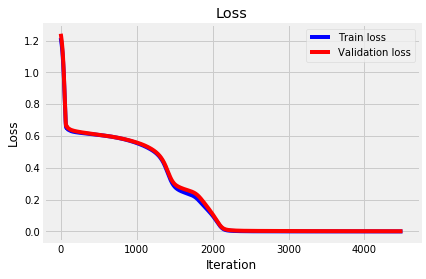

Iteration: 4500, train loss: 0.0001, test loss: 0.0012
a : 563, b : 96, y : 659


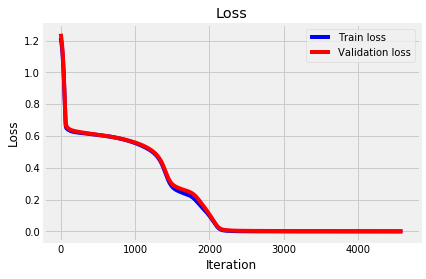

Iteration: 4600, train loss: 0.0001, test loss: 0.0012
a : 464, b : 165, y : 629


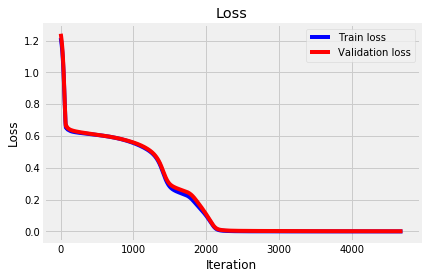

Iteration: 4700, train loss: 0.0000, test loss: 0.0011
a : 307, b : 179, y : 486


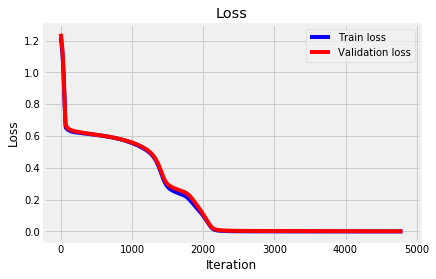

Iteration: 4800, train loss: 0.0000, test loss: 0.0011
a : 455, b : 139, y : 594


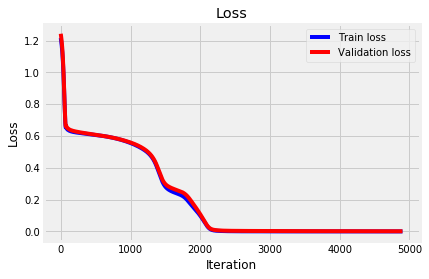

Iteration: 4900, train loss: 0.0000, test loss: 0.0010
a : 344, b : 23, y : 367


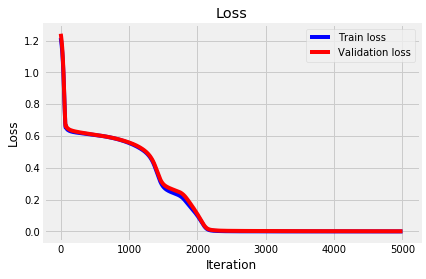

Iteration: 5000, train loss: 0.0000, test loss: 0.0010
a : 826, b : 79, y : 905


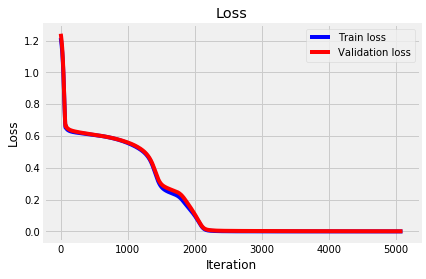

Iteration: 5100, train loss: 0.0000, test loss: 0.0010
a : 158, b : 30, y : 188


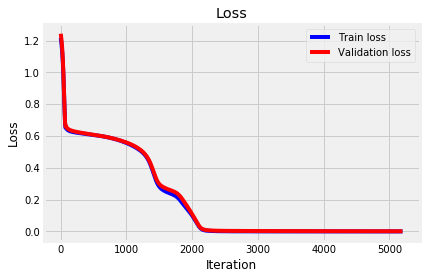

Iteration: 5200, train loss: 0.0000, test loss: 0.0009
a : 664, b : 81, y : 745


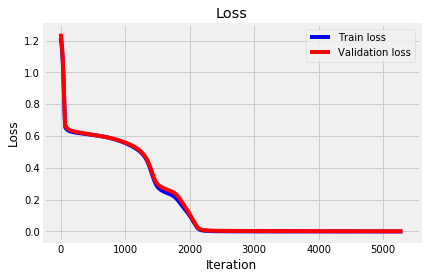

Iteration: 5300, train loss: 0.0000, test loss: 0.0009
a : 870, b : 181, y : 1051


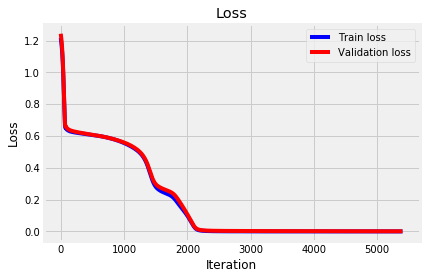

Iteration: 5400, train loss: 0.0000, test loss: 0.0009
a : 826, b : 9, y : 835


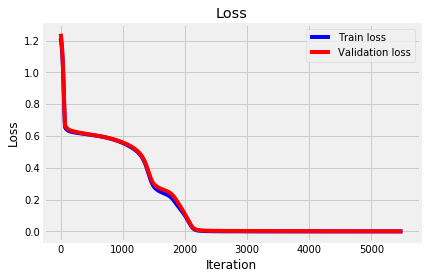

Iteration: 5500, train loss: 0.0000, test loss: 0.0008
a : 652, b : 109, y : 761


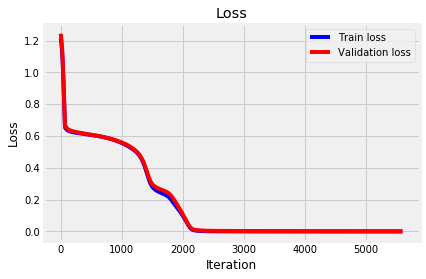

Iteration: 5600, train loss: 0.0000, test loss: 0.0008
a : 103, b : 214, y : 317


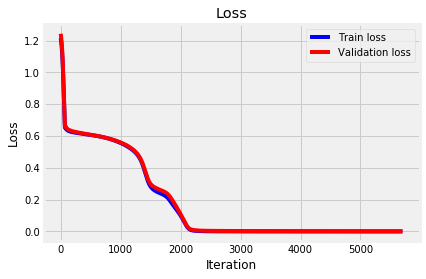

Iteration: 5700, train loss: 0.0000, test loss: 0.0008
a : 262, b : 132, y : 394


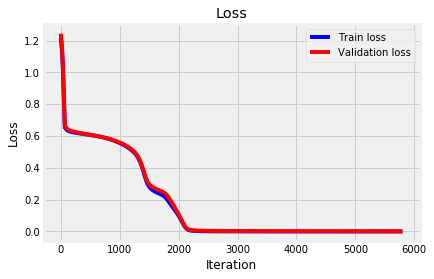

Iteration: 5800, train loss: 0.0000, test loss: 0.0008
a : 743, b : 158, y : 901


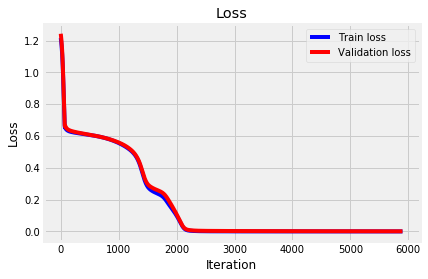

Iteration: 5900, train loss: 0.0000, test loss: 0.0007
a : 608, b : 13, y : 621


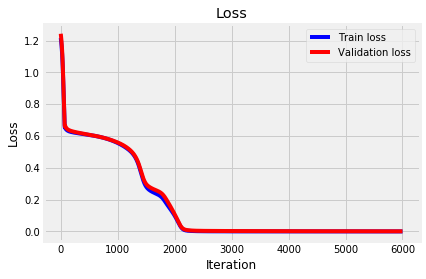

Iteration: 6000, train loss: 0.0000, test loss: 0.0007
a : 588, b : 125, y : 713


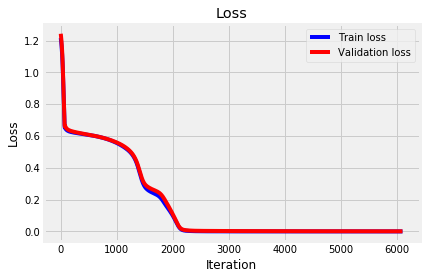

Iteration: 6100, train loss: 0.0000, test loss: 0.0007
a : 625, b : 146, y : 771


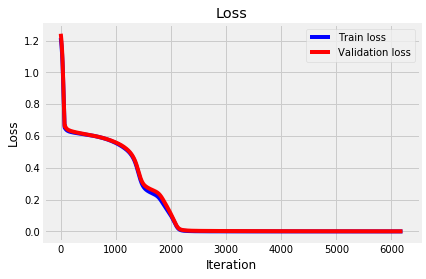

Iteration: 6200, train loss: 0.0000, test loss: 0.0007
a : 742, b : 31, y : 773


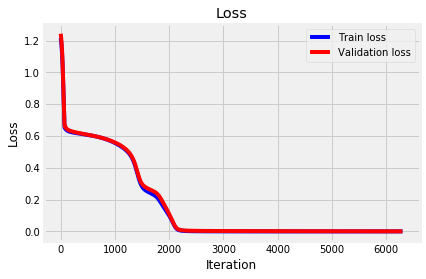

Iteration: 6300, train loss: 0.0000, test loss: 0.0007
a : 806, b : 115, y : 921


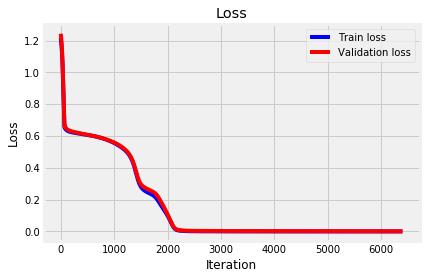

Iteration: 6400, train loss: 0.0000, test loss: 0.0006
a : 897, b : 95, y : 992


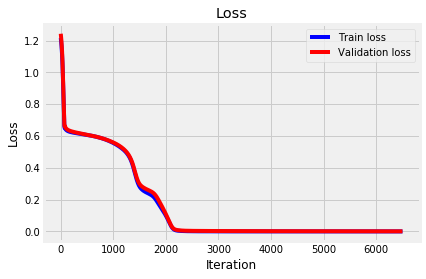

Iteration: 6500, train loss: 0.0000, test loss: 0.0006
a : 318, b : 180, y : 498


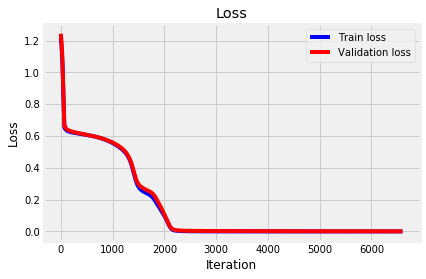

Iteration: 6600, train loss: 0.0000, test loss: 0.0006
a : 915, b : 46, y : 961


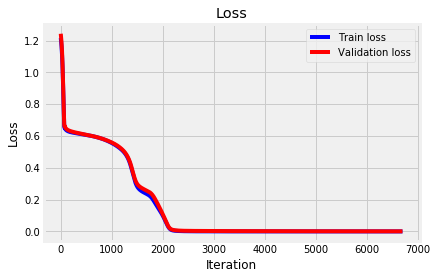

Iteration: 6700, train loss: 0.0000, test loss: 0.0006
a : 75, b : 216, y : 291


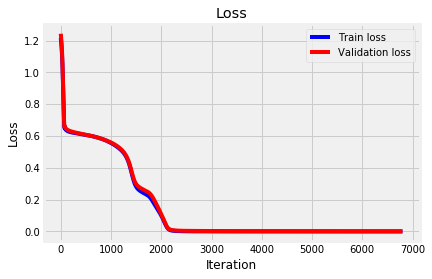

Iteration: 6800, train loss: 0.0000, test loss: 0.0006
a : 620, b : 1, y : 621


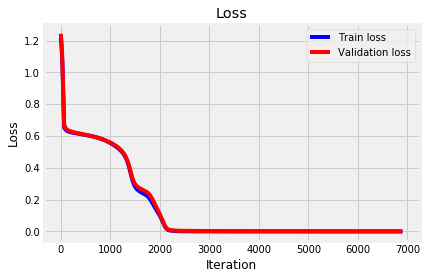

Iteration: 6900, train loss: 0.0000, test loss: 0.0006
a : 806, b : 224, y : 1030


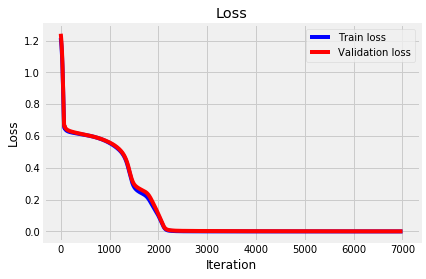

Iteration: 7000, train loss: 0.0000, test loss: 0.0006
a : 163, b : 34, y : 197


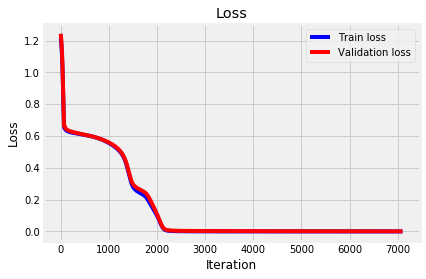

Iteration: 7100, train loss: 0.0000, test loss: 0.0006
a : 187, b : 157, y : 344


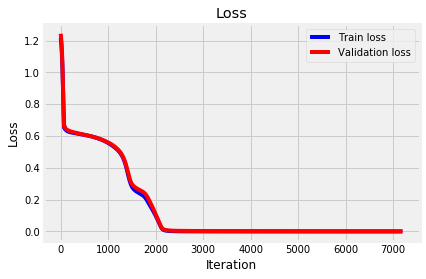

Iteration: 7200, train loss: 0.0000, test loss: 0.0006
a : 379, b : 55, y : 434


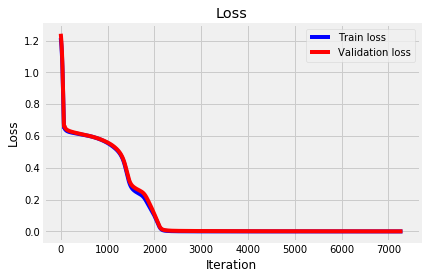

Iteration: 7300, train loss: 0.0000, test loss: 0.0006
a : 435, b : 123, y : 558


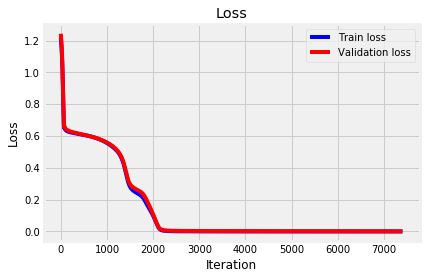

Iteration: 7400, train loss: 0.0000, test loss: 0.0005
a : 15, b : 220, y : 235


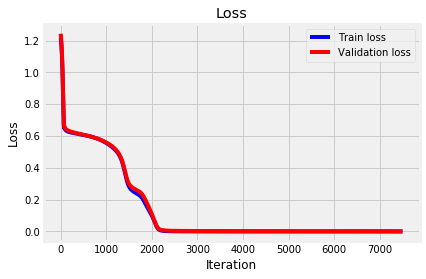

Iteration: 7500, train loss: 0.0000, test loss: 0.0005
a : 847, b : 60, y : 907


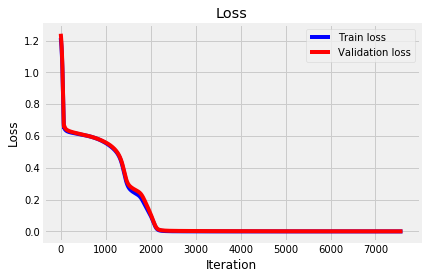

Iteration: 7600, train loss: 0.0000, test loss: 0.0005
a : 29, b : 168, y : 197


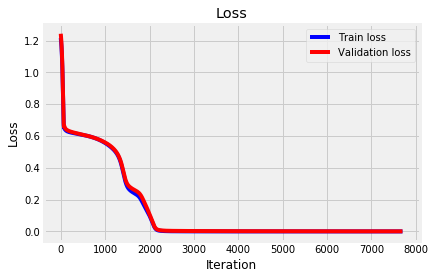

Iteration: 7700, train loss: 0.0000, test loss: 0.0005
a : 181, b : 77, y : 258


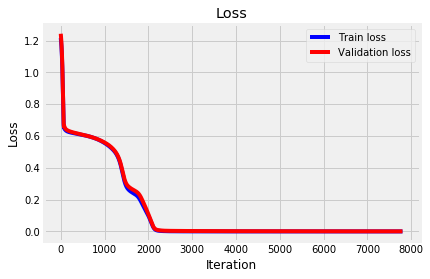

Iteration: 7800, train loss: 0.0000, test loss: 0.0005
a : 248, b : 244, y : 492


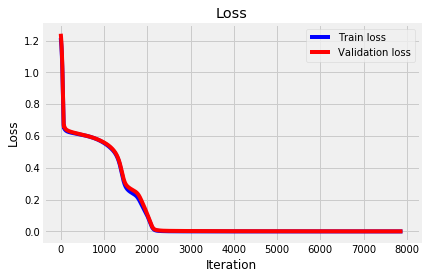

Iteration: 7900, train loss: 0.0000, test loss: 0.0005
a : 314, b : 100, y : 414


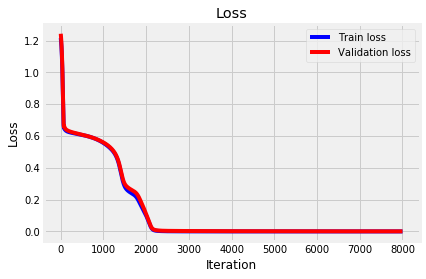

Iteration: 8000, train loss: 0.0000, test loss: 0.0005
a : 783, b : 147, y : 930


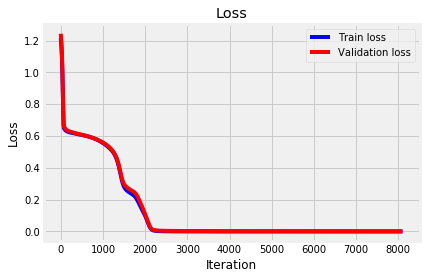

Iteration: 8100, train loss: 0.0000, test loss: 0.0005
a : 626, b : 26, y : 652


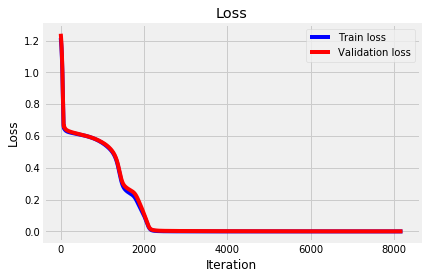

Iteration: 8200, train loss: 0.0000, test loss: 0.0005
a : 1003, b : 215, y : 1218


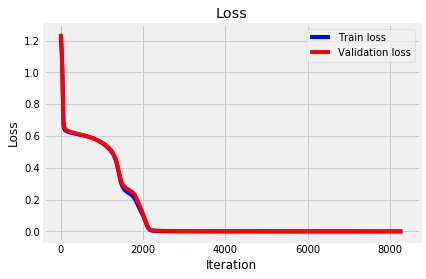

Iteration: 8300, train loss: 0.0000, test loss: 0.0005
a : 687, b : 240, y : 927


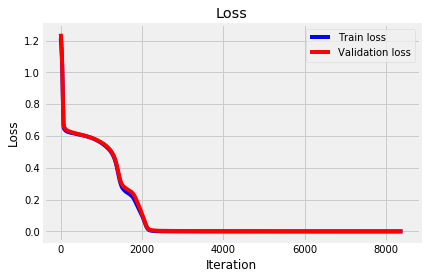

Iteration: 8400, train loss: 0.0000, test loss: 0.0005
a : 438, b : 117, y : 555


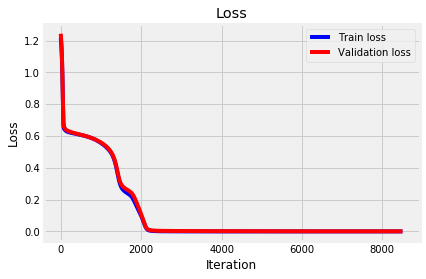

Iteration: 8500, train loss: 0.0000, test loss: 0.0005
a : 106, b : 146, y : 252


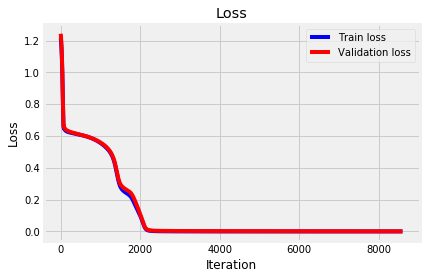

Iteration: 8600, train loss: 0.0000, test loss: 0.0005
a : 1013, b : 67, y : 1080


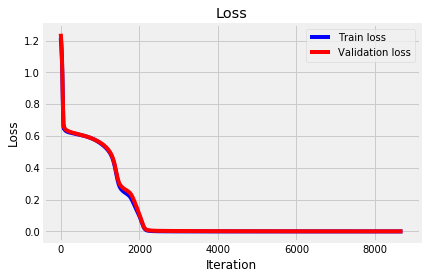

Iteration: 8700, train loss: 0.0000, test loss: 0.0005
a : 1011, b : 132, y : 1143


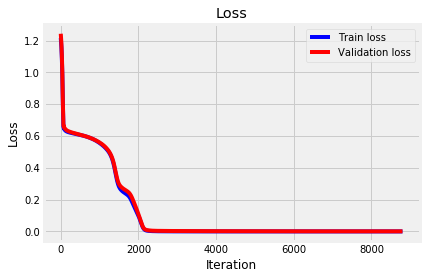

Iteration: 8800, train loss: 0.0000, test loss: 0.0005
a : 594, b : 10, y : 604


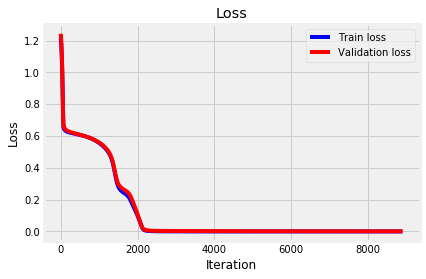

Iteration: 8900, train loss: 0.0000, test loss: 0.0005
a : 196, b : 9, y : 205


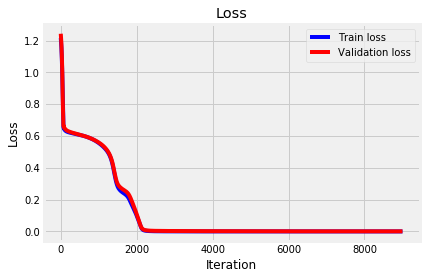

Iteration: 9000, train loss: 0.0000, test loss: 0.0005
a : 371, b : 217, y : 588


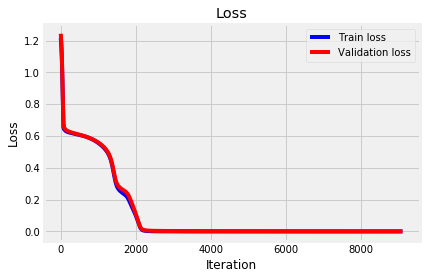

Iteration: 9100, train loss: 0.0000, test loss: 0.0005
a : 348, b : 156, y : 504


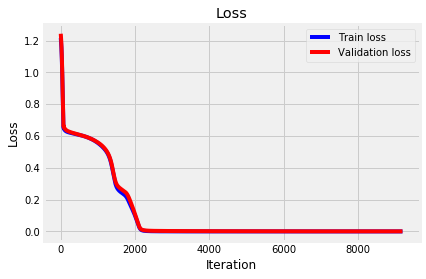

Iteration: 9200, train loss: 0.0000, test loss: 0.0005
a : 180, b : 235, y : 415


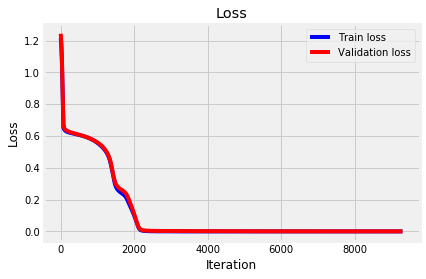

Iteration: 9300, train loss: 0.0000, test loss: 0.0005
a : 168, b : 165, y : 333


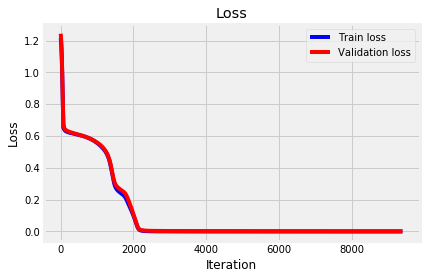

Iteration: 9400, train loss: 0.0000, test loss: 0.0005
a : 575, b : 26, y : 601


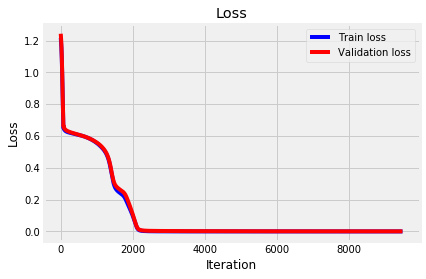

Iteration: 9500, train loss: 0.0000, test loss: 0.0005
a : 236, b : 152, y : 388


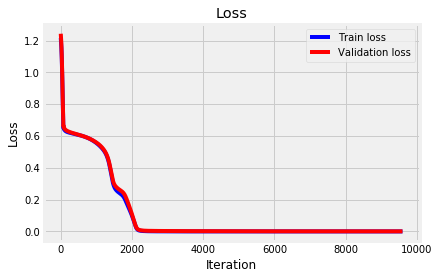

Iteration: 9600, train loss: 0.0000, test loss: 0.0005
a : 825, b : 234, y : 1059


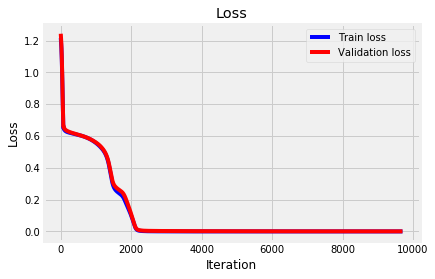

Iteration: 9700, train loss: 0.0000, test loss: 0.0005
a : 208, b : 38, y : 246


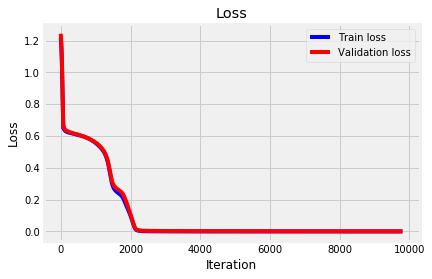

Iteration: 9800, train loss: 0.0000, test loss: 0.0005
a : 171, b : 55, y : 226


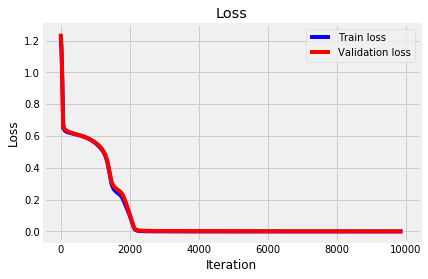

Iteration: 9900, train loss: 0.0000, test loss: 0.0005
a : 565, b : 236, y : 801


In [72]:
   
#%% (3) Initialize and train the model.

# The input has 2 dimensions: dimension 0 is reserved for the first term and dimension 1 is reverved for the second term
input_dimensions = 2

# Arbitrary number for the size of the hidden state
hidden_size = 16

# Initialize a session
session = tf.Session()

# Create a new instance of the GRU model
gru = GRU(input_dimensions, hidden_size)

# Add an additional layer on top of each of the hidden state outputs
W_output = tf.Variable(tf.truncated_normal(dtype=tf.float64, shape=(hidden_size, 1), mean=0, stddev=0.01))
b_output = tf.Variable(tf.truncated_normal(dtype=tf.float64, shape=(1,), mean=0, stddev=0.01))
output = tf.map_fn(lambda h_t: tf.matmul(h_t, W_output) + b_output, gru.h_t)#quadratic loss 사용

# Create a placeholder for the expected output
expected_output = tf.placeholder(dtype=tf.float64, shape=(batch_size, time_size, 1), name='expected_output')

# Just use quadratic loss
loss = tf.reduce_sum(0.5 * tf.pow(output - expected_output, 2)) / float(batch_size)

# Use the Adam optimizer for training
train_step = tf.train.AdamOptimizer().minimize(loss)

# Initialize all the variables
init_variables = tf.global_variables_initializer()
session.run(init_variables)

# Initialize the losses
train_losses = []
validation_losses = []
a = 1024
b = 16
y=0
# Perform all the iterations
for epoch in range(10000):
    # Compute the losses
    _, train_loss = session.run([train_step, loss], feed_dict={gru.input_layer: X_train, expected_output: Y_train})
    validation_loss = session.run(loss, feed_dict={gru.input_layer: X_test, expected_output: Y_test})
    
    # Log the losses
    train_losses += [train_loss]
    validation_losses += [validation_loss]
    
    # Display an update every 100 iterations
    if epoch % 100 == 0:
        plt.plot(train_losses, '-b', label='Train loss')
        plt.plot(validation_losses, '-r', label='Validation loss')
        plt.legend(loc=0)
        plt.title('Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show()
        print('Iteration: %d, train loss: %.4f, test loss: %.4f' % (epoch, train_loss, validation_loss))
    
        #%% (4) Manually evaluate the model.
        if y==a+b:
        # Define two numbers a and b and let the model compute a + b
            a = random.randrange(1, 1024)
            b = random.randrange(1, 256)

        # The model is independent of the sequence length! Now we can test the model on even longer bitstrings
        bitstring_length = 20

        # Create the feature vectors    
        X_custom_sample = np.vstack([as_bytes(a, bitstring_length), as_bytes(b, bitstring_length)]).T
        X_custom = np.zeros((1,) + X_custom_sample.shape)
        X_custom[0, :, :] = X_custom_sample

        # Make a prediction by using the model
        y_predicted = session.run(output, feed_dict={gru.input_layer: X_custom})
        # Just use a linear class separator at 0.5
        y_bits = 1 * (y_predicted > 0.5)[0, :, 0]
        # Join and reverse the bitstring
        y_bitstr = ''.join([str(int(bit)) for bit in y_bits.tolist()])[::-1]
        # Convert the found bitstring to a number
        y = int(y_bitstr, 2)
        print("a : " + str(a)+ ", b : "+str(b) + ", y : " + str(y))

<hr>

# 자연어 처리

최근 대부분의 NLP(Natrual language processing) 응용은 RNN을 기반으로 함
RNN 기반 자연어 처리 기술은 기계 번역, 자동 요약 등에 사용되어 지고 있음

특히 기계 번역에 대해서는 Tensorflow의 Word2Vec, Seq2Seq tutorial에 잘 설명되어 있음

## Word Embedding

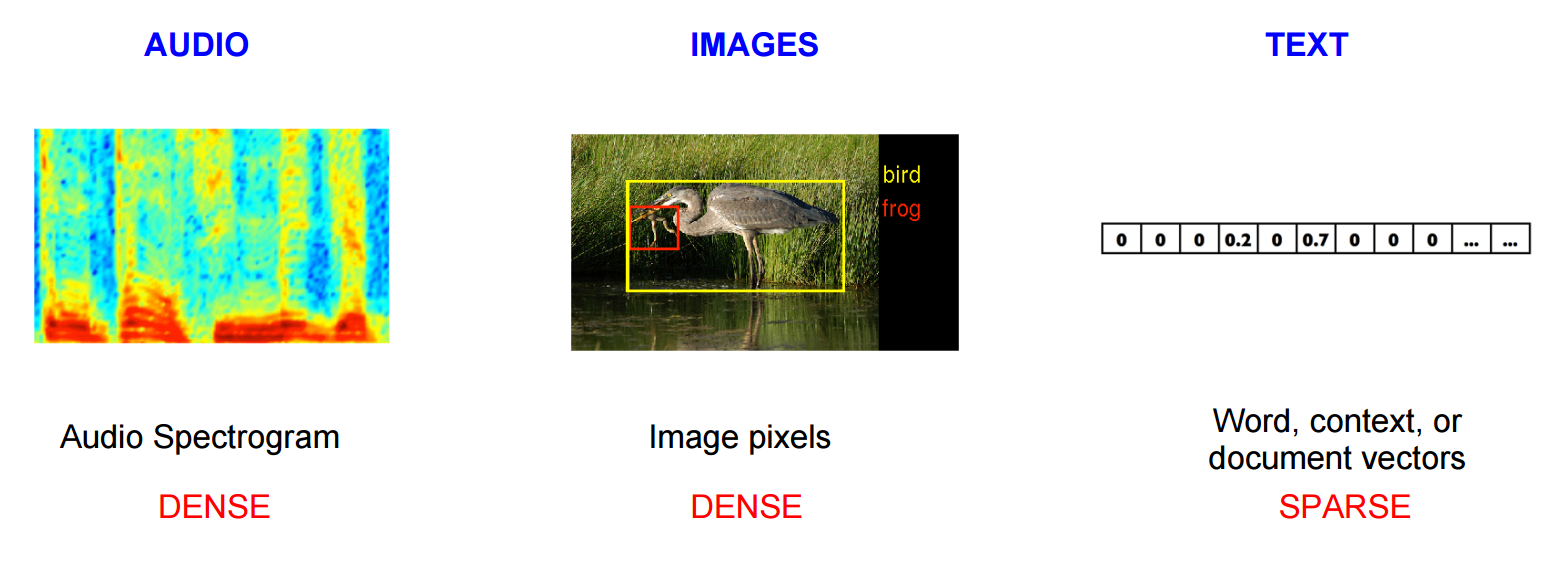*<b><center>오디오, 이미지, 텍스트 데이터 차이</center></b>*

과거 텍스트 분석에서는 단어 하나에 하나의 인덱스 정수를 할당하는 Bag of Words 방법이 주로 사용되어 왔다.

단어 분류 벡터의 크기는 데이터셋에 존재하는 단어의 가짓수만큼 이루어진다.

데이터셋에 "I","You","He","She", "am","are","is", "a","an", "boy","girl" 의 11개의 단어가 존재할 경우 아래와 같이 인덱스 정수가 할당된다.

"I" : 0, "You" :1, "He" : 2, "She" : 3
"am" : 4, "are" : 5, "is" : 6, "a" : 7
"an" : 8, "boy" : 9, "girl" : 10

이러한 방식대로 인덱싱 된 단어의 인덱싱을 표현에는 단어별로 해당하는 인덱스의 값만 1이고 나머지는 모두 0의 값을 가지는 one-hot 벡터와 같은 희소 벡터(Sparse vector) 형태가 사용될 수 있다.

ex) "am" = [0,0,0,0,1,0,0,0,0,0]

데이터셋에 존재하는 단어의 가짓수가 십수개정도라면 희소 벡터로 표현하는 방법을 고려해볼 만 하다. 하지만 그러한 경우는 한정적이고 대부분의 경우 수천, 수만개 이상의 단어를 고려해야 하기 때문에 공간적 낭비를 야기시킨다.

단어의 가짓수가 N개일 경우에 N개의 차원을 가지는 벡터를 사용하지 않고, 아래와 같이 실수를 사용하여 더 적은 차원으로 표현한다면 상대적으로 공간적 이득을 취할 수 있을 것이다.

"I" : [0.1, 0.5], "You" :[0.2,0.4], "He" : [0.2,0.6], "She" : [0.2,0.3]
"am" : [0.5,0.2], "are" : [0.5,0.3], "is" : [0.5,0.4], "a" : [0.7,0.1]
"an" : [0.7,0.2] , "boy" : [0.9,0.1], "girl" : [0.9,0.2]

이러한 표현 방식을 밀집 벡터(Dense vector)라고 한다.

데이터셋에 존재하는 단어들을 밀집 벡터 형태로 표현하는 방법을 워드 임베딩(Word embedding)이라고 하고, 워드 임베딩의 결과물을 임베딩 벡터라고 한다.

임베딩 벡터와 one-hot 벡터의 특징 비교는 아래 표에서 확인할 수 있다

| 구분 | One-hot 벡터 | 임베딩 벡터 |
|:--------|:--------:|--------:|
| 차원 | 고차원(N개, 단어의 가짓수) | 저차원(임베딩 시에 지정) |
| 표현 방법 | 수동, 사용자가 일일히 설정 | 훈련 데이터로부터 학습하여 표현 |
| 값의 타입 | 정수형, 1과 0 | 실수

아래 그림과 같이 비슷한 의미의 단어들이 비슷한 벡터로 임베딩 된다면 벡터들의 합, 차 연산을 통하여 연관성이 있는 단어 찾기, 동일한 관계에 있는 단어 찾기 등에 활용될 수 있을 것이다. 

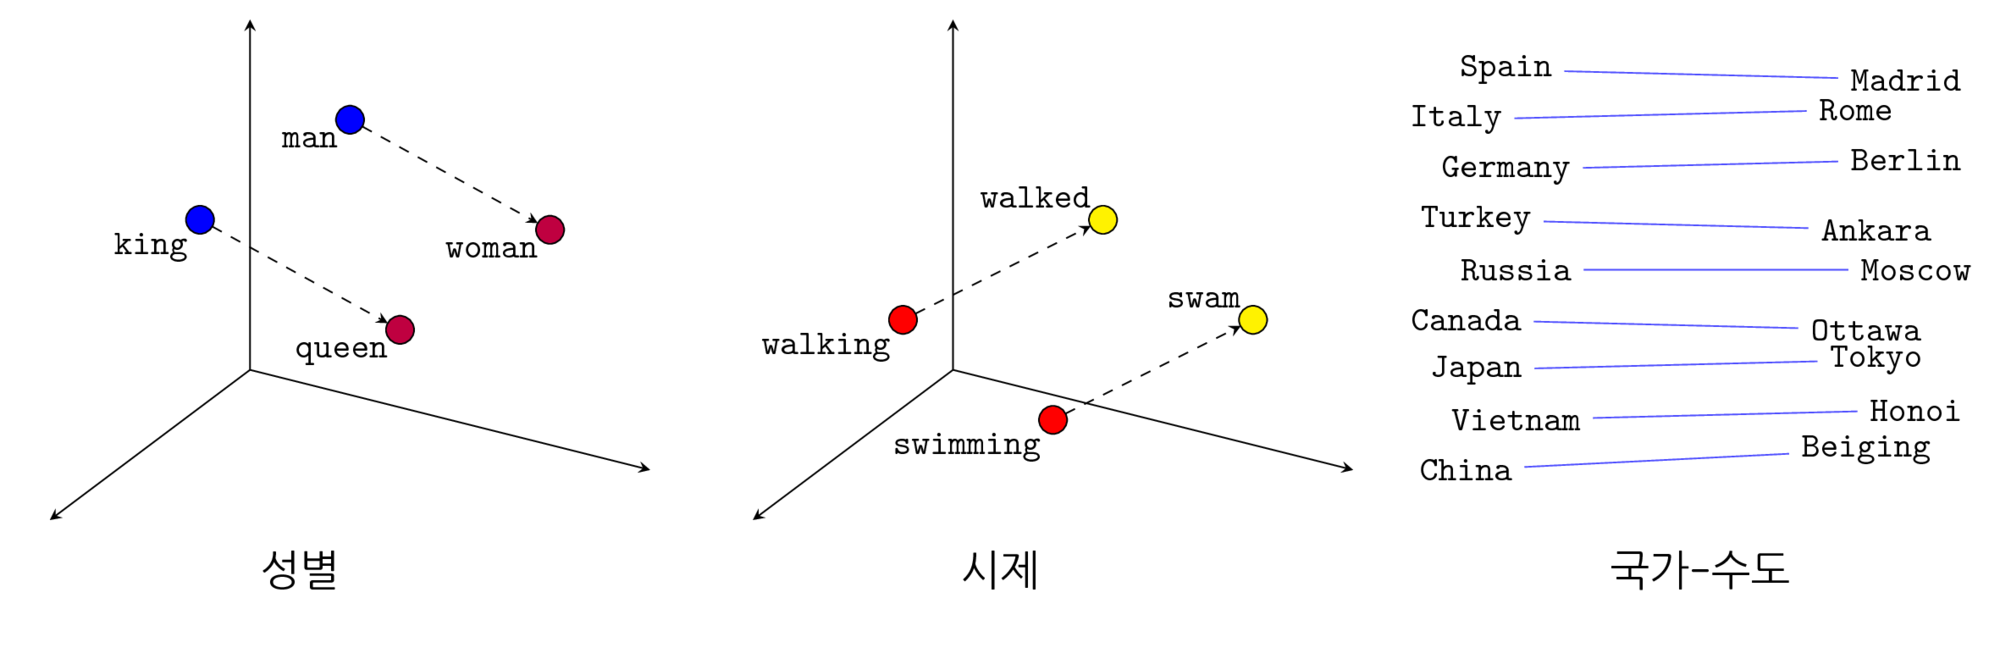*<b><center>워드 임베딩 예시</center></b>*

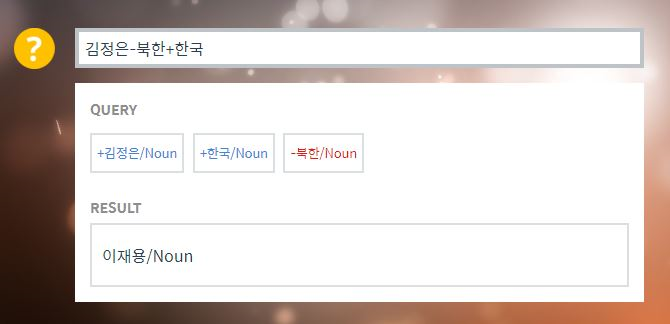*<b><center>워드 임베딩 한국어 사이트 http://word2vec.kr/search/?query=</center></b>*

워드 임베딩에 가장 많이 쓰이는 알고리즘은 word2Vec 알고리즘으로 단어 데이터 셋을 학습하여 비슷한 단어들을 비슷한 벡터값이 가지도록 임베딩하는 알고리즘이다. 

word2vec의 기본 아이디어는 비슷한 의미를 가지는 단어들은 문장 내에서 비슷한 위치에 존재하는것에서 시작된다.

You shall know a word by the company it keeps. - J.R. Firth (1957)

### Fetch data

In [2]:
from six.moves import urllib

import tensorflow as tf
import numpy as np
import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
words = fetch_words_data()

In [4]:
words

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english',
 'revolution',
 'and',
 'the',
 'sans',
 'culottes',
 'of',
 'the',
 'french',
 'revolution',
 'whilst',
 'the',
 'term',
 'is',
 'still',
 'used',
 'in',
 'a',
 'pejorative',
 'way',
 'to',
 'describe',
 'any',
 'act',
 'that',
 'used',
 'violent',
 'means',
 'to',
 'destroy',
 'the',
 'organization',
 'of',
 'society',
 'it',
 'has',
 'also',
 'been',
 'taken',
 'up',
 'as',
 'a',
 'positive',
 'label',
 'by',
 'self',
 'defined',
 'anarchists',
 'the',
 'word',
 'anarchism',
 'is',
 'derived',
 'from',
 'the',
 'greek',
 'without',
 'archons',
 'ruler',
 'chief',
 'king',
 'anarchism',
 'as',
 'a',
 'political',
 'philosophy',
 'is',
 'the',
 'belief',
 'that',
 'rulers',
 'are',
 'unnecessary',
 'and',
 'should',
 'be',
 'abolished',
 'although',
 'there',
 'are',
 'differing',
 '

In [5]:
len(words)

17005207

### Build the dictionary

In [6]:
from collections import Counter

vocabulary_size = 50000
#많이 나온 단어 순서대로 dictionary에 추가 및 index 번호 매칭
vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
#DIctionary의 index값에 대응하여 words(텍스트 데이터) 인덱싱
data = np.array([dictionary.get(word, 0) for word in words])

In [7]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [8]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])

'cycles originated as a term of abuse first used'

### Generate batches

In [10]:
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [11]:
np.random.seed(42)

In [12]:
data_index = 0
batch, labels = generate_batch(8, 2, 1)

In [13]:
batch, [vocabulary[word] for word in batch]

(array([3081, 3081,   12,   12,    6,    6,  195,  195]),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [14]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [5234],
        [   6],
        [3081],
        [  12],
        [ 195],
        [   2],
        [   6]]),
 ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a'])

### Build the model

In [15]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [20]:
reset_graph()

# Input data.
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [21]:
vocabulary_size = 50000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [22]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [23]:
# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

In [24]:
num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  289.90948486328125
Nearest to over: tt, tuned, manichaeans, fractional, cambridge, balaguer, fluoride, strenuously,
Nearest to one: imagines, tijuana, hindrance, motorcyclist, steadfastly, lords, letting, hutchinson,
Nearest to were: bezier, antibodies, nicknamed, panthers, compiler, tao, smarter, busy,
Nearest to may: failure, rna, efficacious, aspirin, lecompton, definitive, geese, amphibious,
Nearest to two: annihilate, bettors, wir, cindy, epinephrine, team, voluntarily, crystallize,
Nearest to its: knob, abeokuta, bracelet, bastards, ivens, objectivity, blanton, cold,
Nearest to than: lame, watts, stones, sram, elves, zarqawi, applets, cloves,
Nearest to these: pedro, condoned, neck, ssn, supervising, doug, thereto, melton,
Nearest to they: lowly, deportation, shrewd, reznor, tojo, decadent, occured, risotto,
Nearest to is: interests, golfers, dropouts, egyptians, richards, legionnaires, opener, leonel,
Nearest to up: clair, drives, steadfas

In [25]:
np.save("./my_final_embeddings.npy", final_embeddings)

In [26]:
final_embeddings = np.load("./my_final_embeddings.npy")

### Plot the embeddings

In [27]:

def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


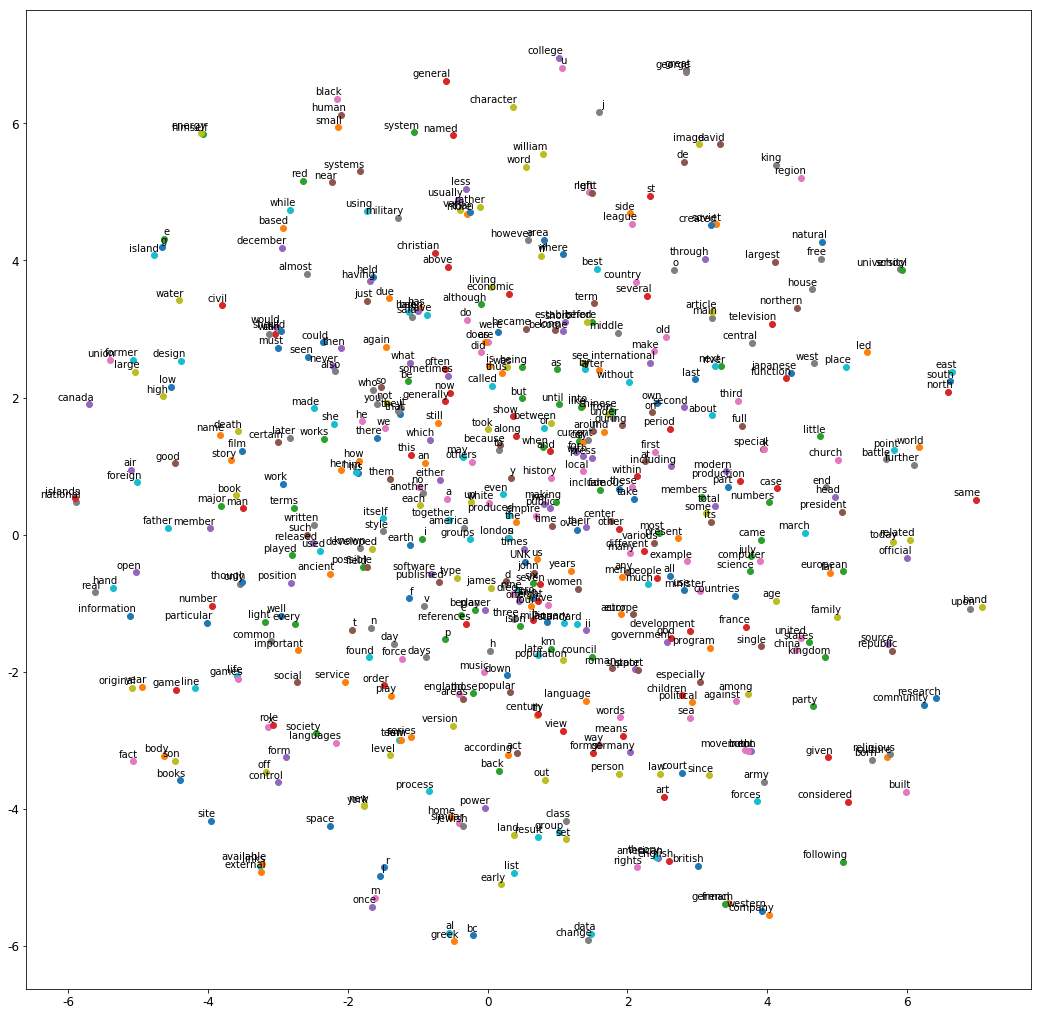

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

In [29]:
def get_embedding_vector(word) :
    if word in labels:
        return final_embeddings[labels.index(word)]
    else :
        return final_embeddings[labels.index("UNK")]
def get_word_from_embedding_vector(vector) : 
    labels[final_embeddings.searchsorted(vector)]

In [30]:
book = get_embedding_vector("book")
books = get_embedding_vector("books")
print(book)
print(books)

[ 8.11967477e-02 -8.70217234e-02 -1.71966329e-01 -3.10007334e-02
  1.22588813e-01  4.15035449e-02 -3.97832841e-02  1.03306666e-01
 -5.13740666e-02 -1.50740325e-05  2.36677695e-02  4.94580008e-02
  1.03616439e-01  3.71415205e-02  1.41070494e-02 -5.71096875e-02
 -1.12072276e-02 -4.99432683e-02 -1.10635474e-01  9.15328860e-02
 -1.11827679e-01 -9.32430178e-02  3.96184884e-02 -3.30627784e-02
 -2.29057353e-02  6.84185475e-02  5.60284182e-02  1.02757953e-01
  5.07382788e-02 -4.47140373e-02  5.89091182e-02 -2.92926375e-02
  1.21545300e-01 -1.01840749e-01 -7.09879026e-02 -7.19989985e-02
 -2.84198150e-02  2.27203071e-02  1.92235224e-02  1.26509935e-01
  4.76578698e-02 -9.06215236e-02 -1.18482113e-02  6.88924864e-02
 -3.59332263e-02  1.84279121e-02  1.53495401e-01 -1.53897218e-02
 -1.96214676e-01 -5.81934154e-02  5.59540428e-02  5.05696535e-02
 -4.57691699e-02  6.03613183e-02  1.41751757e-02  6.23774230e-02
  6.63828552e-02 -1.43312952e-02 -1.52248427e-01 -1.10419700e-02
  1.82753261e-02  8.35772

## 기계 번역을 위한 인코더-디코더 네트워크

RNN을 이용한 seq2seq 모델은 길이가 다른 여러 시퀀스를 입력하여 여러 시퀀스를 출력한다. 

seq2seq 모델의 대표적인 응용이 기계 번역인데, 하나의 문장(시퀀스)를 입력받고 다른 언어로 된 문장(시퀀스)를 출력한다.

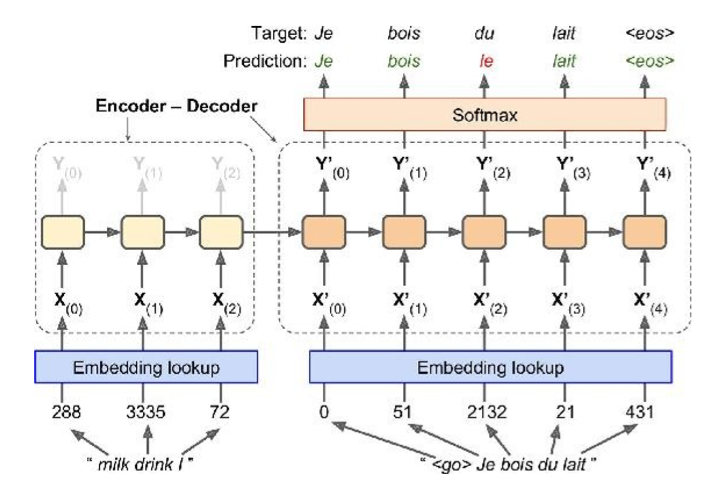 <b><center>인코더-디코더 모델을 이용한 기계 번역

<li>인코더 : 입력된 문장 토큰열을 그 문장의 의미/스타일 등의 요약 정보를 담고 있는 수치 벡터로 변환한다.</li>
*인코더에 입력되는 문장의 토큰 순서를 뒤집어서 만든 수치 벡터를 디코더에 전달해주면 성능이 향상되는것으로 나타났다.
<li>디코더 : 문장의 요약 정보를 담고 있는 수치 벡터를 디코딩 대상 언어 문장 토큰열로 변환한다. 각 토큰별로 변환될 수 있는 단어들의 확률값이 출력되고 Softmax를 통과시켜 최대 확률을 가지는 단어를 출력한다.</li>

### Implementation
본 구현은 연습문제 9번의 해답이다.

#### Load dataset

In [34]:
import os
import pickle
import copy
import numpy as np

def load_data(path):
    input_file = os.path.join(path)
    with open(input_file, 'r', encoding='utf-8') as f:
        data = f.read()

    return data

데이터 셋은 WMT 10 French-English corpus의 축소 버전 사용

In [35]:
source_path = 'data/small_vocab_en'
target_path = 'data/small_vocab_fr'
source_text = load_data(source_path)
target_text = load_data(target_path)

#### Explore the data

데이터셋의 구성 확인

In [36]:
import numpy as np
from collections import Counter

print('Dataset Brief Stats')
print('* number of unique words in English sample sentences: {}\
        [this is roughly measured/without any preprocessing]'.format(len(Counter(source_text.split()))))
print()

english_sentences = source_text.split('\n')
print('* English sentences')
print('\t- number of sentences: {}'.format(len(english_sentences)))
print('\t- avg. number of words in a sentence: {}'.format(np.average([len(sentence.split()) for sentence in english_sentences])))

french_sentences = target_text.split('\n')
print('* French sentences')
print('\t- number of sentences: {} [data integrity check / should have the same number]'.format(len(french_sentences)))
print('\t- avg. number of words in a sentence: {}'.format(np.average([len(sentence.split()) for sentence in french_sentences])))
print()

sample_sentence_range = (0, 5)
side_by_side_sentences = list(zip(english_sentences, french_sentences))[sample_sentence_range[0]:sample_sentence_range[1]]
print('* Sample sentences range from {} to {}'.format(sample_sentence_range[0], sample_sentence_range[1]))

for index, sentence in enumerate(side_by_side_sentences):
    en_sent, fr_sent = sentence
    print('[{}-th] sentence'.format(index+1))
    print('\tEN: {}'.format(en_sent))
    print('\tFR: {}'.format(fr_sent))
    print()

Dataset Brief Stats
* number of unique words in English sample sentences: 227        [this is roughly measured/without any preprocessing]

* English sentences
	- number of sentences: 137861
	- avg. number of words in a sentence: 13.225277634719028
* French sentences
	- number of sentences: 137861 [data integrity check / should have the same number]
	- avg. number of words in a sentence: 14.226612312401622

* Sample sentences range from 0 to 5
[1-th] sentence
	EN: new jersey is sometimes quiet during autumn , and it is snowy in april .
	FR: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .

[2-th] sentence
	EN: the united states is usually chilly during july , and it is usually freezing in november .
	FR: les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .

[3-th] sentence
	EN: california is usually quiet during march , and it is usually hot in june .
	FR: california est généralement calme en mars , et il est généraleme

#### Preprocessing

Create lookup table

두가지 종류의 매핑 테이블 생성

vocab_to_int -> (Key,value) ==  (unique word string, its unique index) : 분류기 학습 및 입력값의 임베딩 벡터 변환에 사용 -> (1)

int_to_vocab -> (Key,value) ==  (its unique index, unique word string) : 출력값의 단어 변환을 위한 lookup table -> (2)

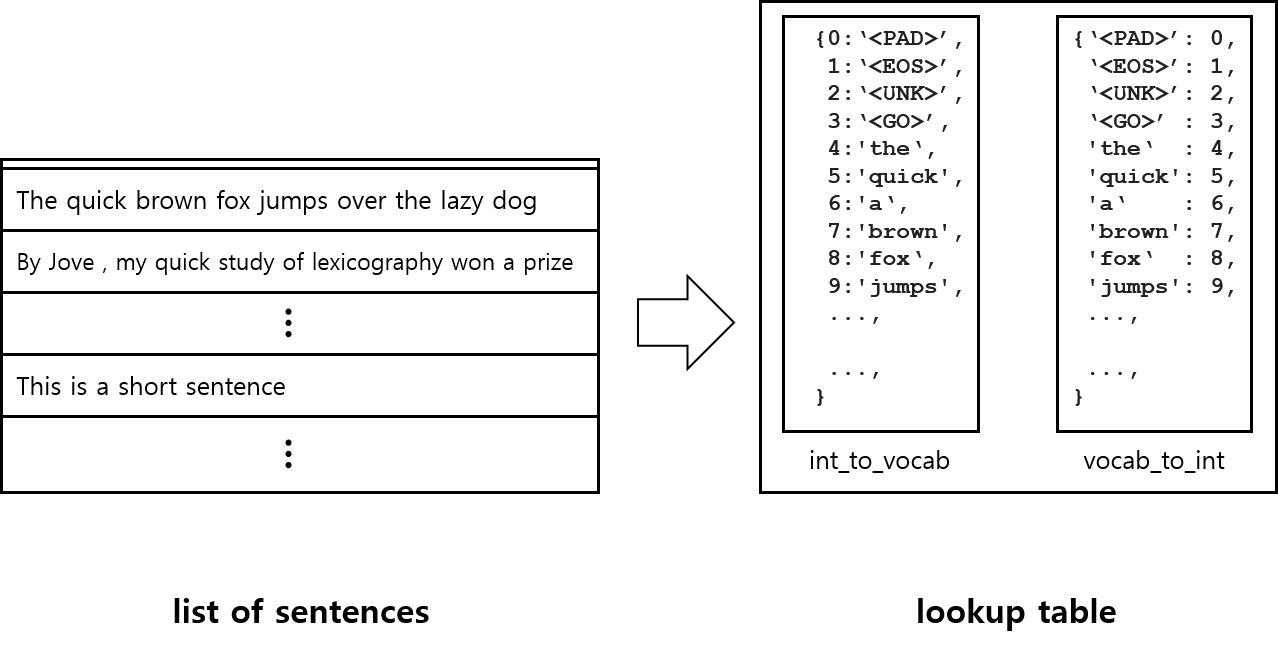

In [37]:
CODES = {'<PAD>': 0, '<EOS>': 1, '<UNK>': 2, '<GO>': 3 }

def create_lookup_tables(text):
    # make a list of unique words
    vocab = set(text.split())

    # (1)
    # starts with the special tokens
    vocab_to_int = copy.copy(CODES)

    # the index (v_i) will starts from 4 (the 2nd arg in enumerate() specifies the starting index)
    # since vocab_to_int already contains special tokens
    for v_i, v in enumerate(vocab, len(CODES)):
        vocab_to_int[v] = v_i

    # (2)
    int_to_vocab = {v_i: v for v, v_i in vocab_to_int.items()}

    return vocab_to_int, int_to_vocab

Text to Word Ids

Lookup table의 인덱스 값을 기준으로 raw data(문자열)을 인덱스 값으로 변환
변환해주지 않으면 하나의 문장은 row가 문장, column이 인덱스 값인 2차원 배열 형태로 저장되어야 함

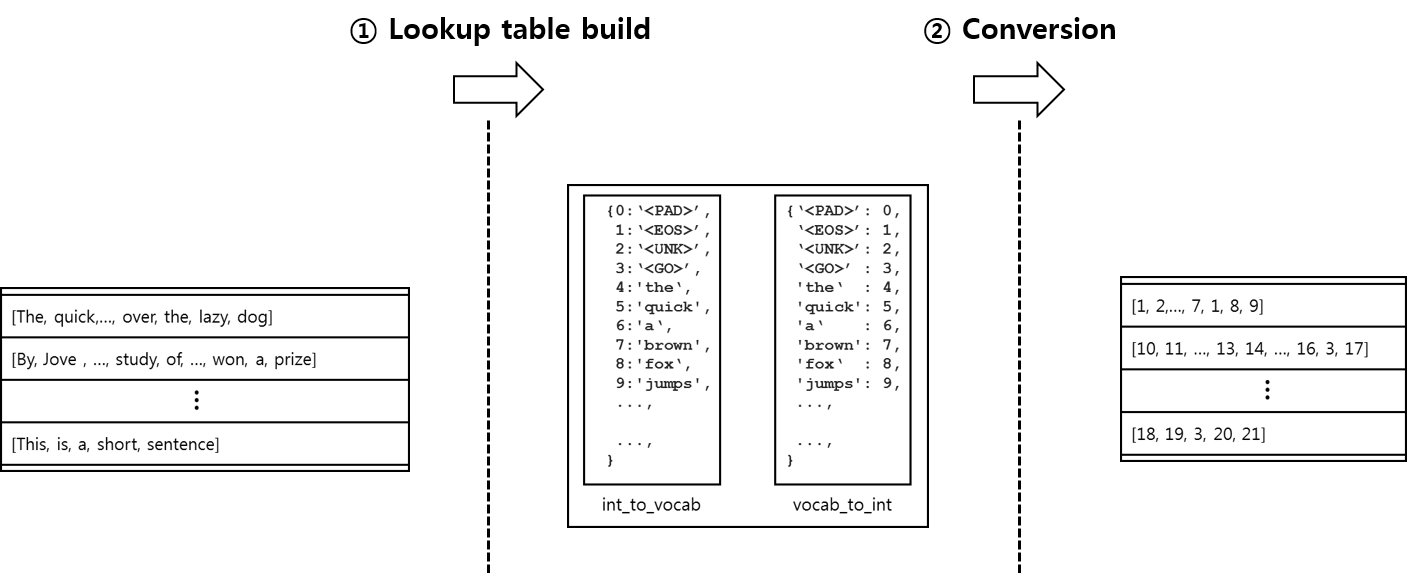

In [38]:
def text_to_ids(source_text, target_text, source_vocab_to_int, target_vocab_to_int):
    """
        1st, 2nd args: raw string text to be converted
        3rd, 4th args: lookup tables for 1st and 2nd args respectively
    
        return: A tuple of lists (source_id_text, target_id_text) converted
    """
    # empty list of converted sentences
    source_text_id = []
    target_text_id = []
    
    # make a list of sentences (extraction)
    source_sentences = source_text.split("\n")
    target_sentences = target_text.split("\n")
    
    max_source_sentence_length = max([len(sentence.split(" ")) for sentence in source_sentences])
    max_target_sentence_length = max([len(sentence.split(" ")) for sentence in target_sentences])
    
    # iterating through each sentences (# of sentences in source&target is the same)
    for i in range(len(source_sentences)):
        # extract sentences one by one
        source_sentence = source_sentences[i]
        target_sentence = target_sentences[i]
        
        # make a list of tokens/words (extraction) from the chosen sentence
        source_tokens = source_sentence.split(" ")
        target_tokens = target_sentence.split(" ")
        
        # empty list of converted words to index in the chosen sentence
        source_token_id = []
        target_token_id = []
        
        for index, token in enumerate(source_tokens):
            if (token != ""):
                source_token_id.append(source_vocab_to_int[token])
        
        for index, token in enumerate(target_tokens):
            if (token != ""):
                target_token_id.append(target_vocab_to_int[token])
                
        # put <EOS> token at the end of the chosen target sentence
        # this token suggests when to stop creating a sequence
        target_token_id.append(target_vocab_to_int['<EOS>'])
            
        # add each converted sentences in the final list
        source_text_id.append(source_token_id)
        target_text_id.append(target_token_id)
    
    return source_text_id, target_text_id

Peprocess and save the data

In [39]:
def preprocess_and_save_data(source_path, target_path, text_to_ids):
    # Preprocess
    
    # load original data (English, French)
    source_text = load_data(source_path)
    target_text = load_data(target_path)

    # to the lower case
    source_text = source_text.lower()
    target_text = target_text.lower()

    # create lookup tables for English and French data
    source_vocab_to_int, source_int_to_vocab = create_lookup_tables(source_text)
    target_vocab_to_int, target_int_to_vocab = create_lookup_tables(target_text)

    # create list of sentences whose words are represented in index
    source_text, target_text = text_to_ids(source_text, target_text, source_vocab_to_int, target_vocab_to_int)

    # Save data for later use
    pickle.dump((
        (source_text, target_text),
        (source_vocab_to_int, target_vocab_to_int),
        (source_int_to_vocab, target_int_to_vocab)), open('preprocess.p', 'wb'))

데이터 전처리 수행

In [40]:
preprocess_and_save_data(source_path, target_path, text_to_ids)

In [41]:
import pickle

def load_preprocess():
    with open('preprocess.p', mode='rb') as in_file:
        return pickle.load(in_file)

In [42]:
import numpy as np

(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int), _ = load_preprocess()

In [40]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf
from tensorflow.python.layers.core import Dense

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.1'), 'Please use TensorFlow version 1.1 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.12.0
Default GPU Device: /device:GPU:0


### Built the Network model

인코더 모델과 디코더 모델 두가지 서브모델들로 이루어진 sequence to sequence 모델 생성

RNN 구조로 구성된 인코더는 raw 데이터를 받아 neural representation 형태로 결과값을 출력하고, 이것이 디코더의 입력으로 사용되어 결과값을 출력하게 된다.


아래와 같은 과정을 통하여 인코더-디코더 모델을 정의하고 학습 및 추론에 이용할 수 있다.

<li>(1) 인코더 모델의 입력 파라미터 정의</li>
&nbsp;&nbsp;&nbsp;&nbsp;해당 함수 : enc_dec_model_inputs()
<li>(2) 인코더 모델 형성 </li>
&nbsp;&nbsp;&nbsp;&nbsp;해당 함수 : encoding_layer
<li>(3) 디코더 모델의 입력 파라미터 정의 </li>
&nbsp;&nbsp;&nbsp;&nbsp;해당 함수 : enc_dec_model_inputs(), process_decoder_input(),
<li>(4) Training을 위한 디코더 모델 형성 </li>
&nbsp;&nbsp;&nbsp;&nbsp;해당 함수 : decoding_layer_train()
<li>(5) Inference을 위한 디코더 모델 형성 </li>
&nbsp;&nbsp;&nbsp;&nbsp;해당 함수 : decoding_layer_infer()
<li>(6) 디코더 모델 통합 </li>
&nbsp;&nbsp;&nbsp;&nbsp;해당 함수 : decoding_layer()
<li>(7) 인코더-디코더 모델 통합 </li>
&nbsp;&nbsp;&nbsp;&nbsp;해당 함수 : seq2seq_model()
<li>(8) 모델 학습 및 검증 </li>



### Input (1), (3)

In [43]:
def enc_dec_model_inputs():
    inputs = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets') 
    
    target_sequence_length = tf.placeholder(tf.int32, [None], name='target_sequence_length')
    max_target_len = tf.reduce_max(target_sequence_length)    
    
    return inputs, targets, target_sequence_length, max_target_len

In [44]:
def hyperparam_inputs():
    #learning rate
    lr_rate = tf.placeholder(tf.float32, name='lr_rate')
    #keep probability for dropouts
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    
    return lr_rate, keep_prob

In [45]:
def process_decoder_input(target_data, target_vocab_to_int, batch_size):
    """
    Preprocess target data for encoding
    :return: Preprocessed target data
    """
    # get '<GO>' id
    #<GO> 토큰은 번역의 시작 지점을 가르킴
    go_id = target_vocab_to_int['<GO>']
    #tf.stride_slice() : 텐서를 쪼개는 함수 
    #Arguments -> Tensor, Begin, End, Stride
    after_slice = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    #tf.fill() : 스칼라값으로 채워진 텐서 생성
    #tf.concat() : 두가지 텐서를 이어붙임
    after_concat = tf.concat( [tf.fill([batch_size, 1], go_id), after_slice], 1)
    
    return after_concat

### Encoding (3)

인코딩 모델은 임베딩 계층과 RNN 계층으로 구성된다.

    임베딩 계층은 tf.contrib.layers.embed_sequence()으로 구성하였다.
    RNN 계층은 tf.contrib.rnn.LSTMCell(),tf.contrib.rnn.DropoutWrapper(), tf.contrib.rnn.MultiRNNCell() 함수를 사용하여 구성하였다.

In [46]:
def encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob, 
                   source_vocab_size, 
                   encoding_embedding_size):
    """
    :return: tuple (RNN output, RNN state)
    """
    embed = tf.contrib.layers.embed_sequence(rnn_inputs, 
                                             vocab_size=source_vocab_size, 
                                             embed_dim=encoding_embedding_size)
    #MultiRNNCell은 여러 RNN cell들을 쌓을 수 있도록 함
    #num_layer만큼 LSTM cell을 스태킹
    stacked_cells = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.LSTMCell(rnn_size), keep_prob) for _ in range(num_layers)])
    
    #임베딩 레이어와 RNN 레이어를 통합하기 위한 함수
    outputs, state = tf.nn.dynamic_rnn(stacked_cells, 
                                       embed, 
                                       dtype=tf.float32)
    return outputs, state

### Decoding

디코딩 모델은 학습 단계와 추론 단계에서 서로 다른 프로세스가 이루어진다. 
학습 단계에서는 타겟 데이터에 정해진 라벨 대로 정해진 값이 다음 스텝으로 전달되지만, 추론 단계에서는 매 스탭마다 결정된 동적인 값을 전달받는다.

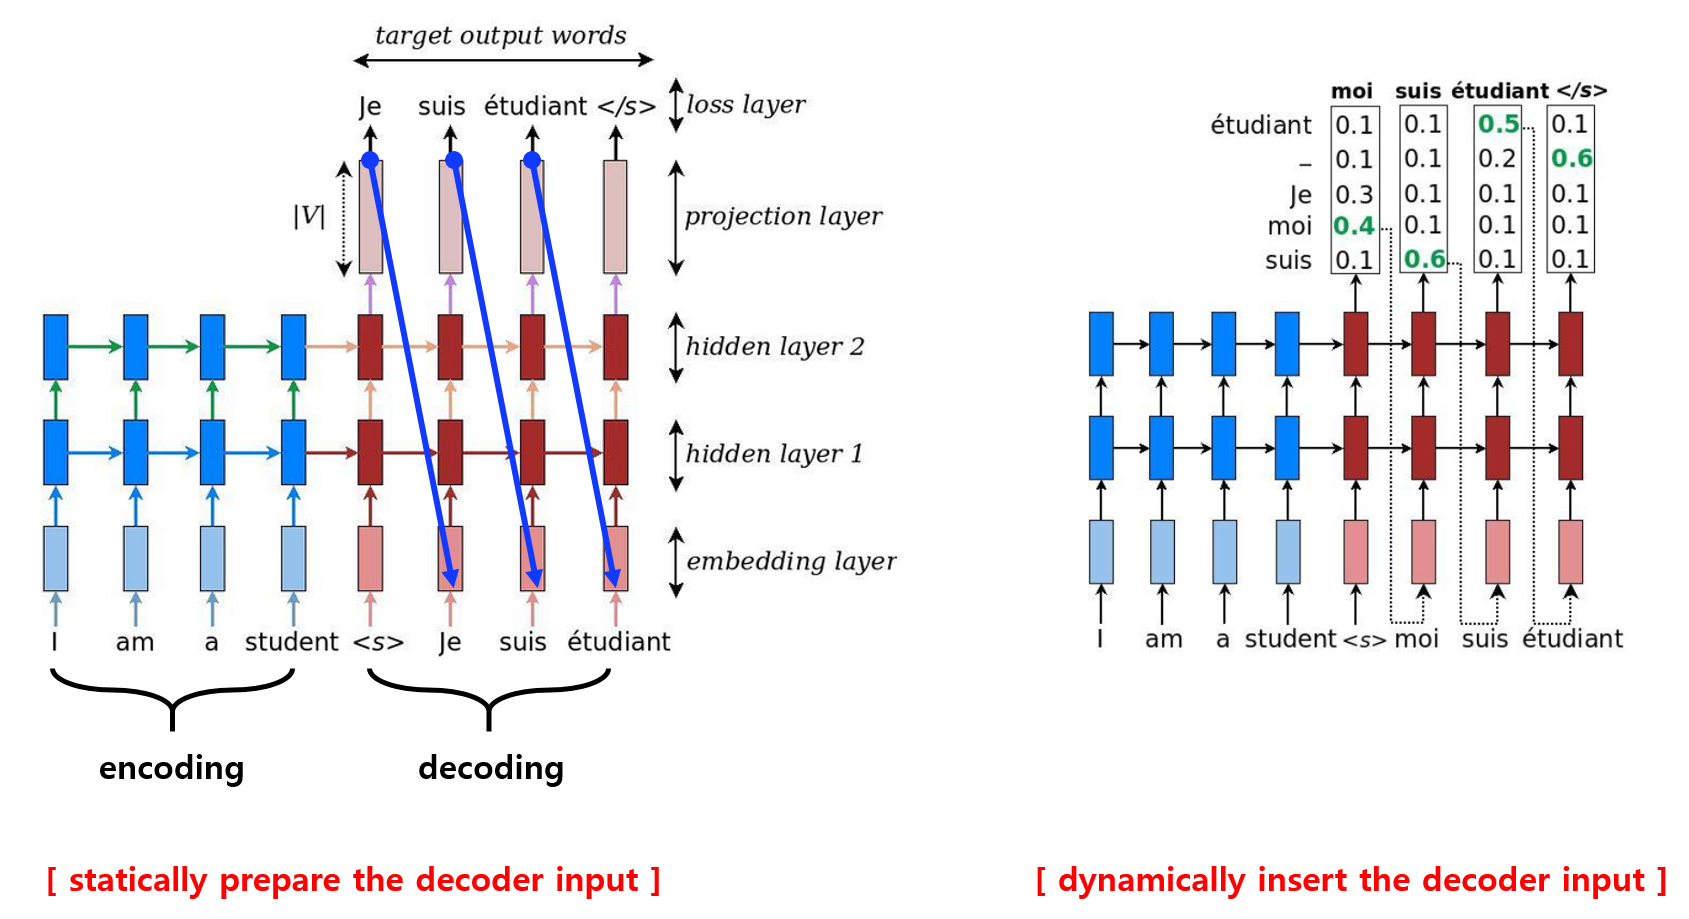

두 단계가 서로 다른 방식으로 임베딩 데이터를 사용하므로 디코딩 계층을 만드는 함수를 각각 생성한다.

### Decoding - 학습 단계 (4)

학습 단계에서는 입력에 따른 사전 정의된 임베딩 값을 사용한다. 

<a href="https://www.tensorflow.org/api_docs/python/tf/contrib/seq2seq/TrainingHelper">tf.contrib.seq2seq.TrainingHelper()</a> 함수를 사용하여 입력 값을 전달한다.

RNN 학습 과정에 사용되는 helper 함수로 단순히 입력 값을 읽어오고, 다음 스텝에 사용될수 있도록 해당하는 인덱스값을 리턴한다.

In [47]:
def decoding_layer_train(encoder_state, dec_cell, dec_embed_input, 
                         target_sequence_length, max_summary_length, 
                         output_layer, keep_prob):
    """
    Create a training process in decoding layer 
    :return: BasicDecoderOutput containing training logits and sample_id
    """
    dec_cell = tf.contrib.rnn.DropoutWrapper(dec_cell, 
                                             output_keep_prob=keep_prob)
    
    # for only input layer
    helper = tf.contrib.seq2seq.TrainingHelper(dec_embed_input, 
                                               target_sequence_length)
    
    decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell, 
                                              helper, 
                                              encoder_state, 
                                              output_layer)

    # unrolling the decoder layer
    outputs, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder, 
                                                      impute_finished=True, 
                                                      maximum_iterations=max_summary_length)
    return outputs

### Decoding - 추론 단계 (5)

추론 단계에서는 매 스텝마다 생성되는 결과물을 재 입력 받아야 하기 때문에 동적으로 임베딩 계층을 통과시켜야 한다.
<a href="https://www.tensorflow.org/api_docs/python/tf/contrib/seq2seq/GreedyEmbeddingHelper">tf.contrib.seq2seq.GreedyEmbeddingHelper()</a> 함수를 사용하여 현재 스텝의 결과물을 임베딩 계층에 통과시켜 다음 입력으로 사용될 수 있도록 한다.

In [48]:

def decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, start_of_sequence_id,
                         end_of_sequence_id, max_target_sequence_length,
                         vocab_size, output_layer, batch_size, keep_prob):
    """
    Create a inference process in decoding layer 
    :return: BasicDecoderOutput containing inference logits and sample_id
    """
    dec_cell = tf.contrib.rnn.DropoutWrapper(dec_cell, 
                                             output_keep_prob=keep_prob)
    
    helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(dec_embeddings, 
                                                      tf.fill([batch_size], start_of_sequence_id), 
                                                      end_of_sequence_id)
    
    decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell, 
                                              helper, 
                                              encoder_state, 
                                              output_layer)
    
    outputs, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder, 
                                                      impute_finished=True, 
                                                      maximum_iterations=max_target_sequence_length)
    return outputs

### Decoding 계층 통합 (6)

In [49]:
def decoding_layer(dec_input, encoder_state,
                   target_sequence_length, max_target_sequence_length,
                   rnn_size,
                   num_layers, target_vocab_to_int, target_vocab_size,
                   batch_size, keep_prob, decoding_embedding_size):
    """
    Create decoding layer
    :return: Tuple of (Training BasicDecoderOutput, Inference BasicDecoderOutput)
    """
    target_vocab_size = len(target_vocab_to_int)
    dec_embeddings = tf.Variable(tf.random_uniform([target_vocab_size, decoding_embedding_size]))
    dec_embed_input = tf.nn.embedding_lookup(dec_embeddings, dec_input)
    
    cells = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.LSTMCell(rnn_size) for _ in range(num_layers)])
    
    with tf.variable_scope("decode"):
        output_layer = tf.layers.Dense(target_vocab_size)
        train_output = decoding_layer_train(encoder_state, 
                                            cells, 
                                            dec_embed_input, 
                                            target_sequence_length, 
                                            max_target_sequence_length, 
                                            output_layer, 
                                            keep_prob)

    with tf.variable_scope("decode", reuse=True):
        infer_output = decoding_layer_infer(encoder_state, 
                                            cells, 
                                            dec_embeddings, 
                                            target_vocab_to_int['<GO>'], 
                                            target_vocab_to_int['<EOS>'], 
                                            max_target_sequence_length, 
                                            target_vocab_size, 
                                            output_layer,
                                            batch_size,
                                            keep_prob)

    return (train_output, infer_output)

### Built the Seq2seq model (7)

1~6번 과정에서 정의한 함수들을 통합하여 seq2seq 모델 생성을 위한 함수를 정의한다.

In [50]:
def seq2seq_model(input_data, target_data, keep_prob, batch_size,
                  target_sequence_length,
                  max_target_sentence_length,
                  source_vocab_size, target_vocab_size,
                  enc_embedding_size, dec_embedding_size,
                  rnn_size, num_layers, target_vocab_to_int):
    """
    Build the Sequence-to-Sequence model
    :return: Tuple of (Training BasicDecoderOutput, Inference BasicDecoderOutput)
    """
    enc_outputs, enc_states = encoding_layer(input_data, 
                                             rnn_size, 
                                             num_layers, 
                                             keep_prob, 
                                             source_vocab_size, 
                                             enc_embedding_size)
    
    dec_input = process_decoder_input(target_data, 
                                      target_vocab_to_int, 
                                      batch_size)
    
    train_output, infer_output = decoding_layer(dec_input,
                                               enc_states, 
                                               target_sequence_length, 
                                               max_target_sentence_length,
                                               rnn_size,
                                              num_layers,
                                              target_vocab_to_int,
                                              target_vocab_size,
                                              batch_size,
                                              keep_prob,
                                              dec_embedding_size)
    
    return train_output, infer_output

### Training

모델 생성 및 학습을 위한 하이퍼 파라미터 설정


In [51]:
display_step = 300

epochs = 13
batch_size = 128

rnn_size = 128
num_layers = 3

encoding_embedding_size = 150
decoding_embedding_size = 150

learning_rate = 0.001
keep_probability = 0.5

In [52]:
save_path = 'checkpoints/dev'
(source_int_text, target_int_text), (source_vocab_to_int, target_vocab_to_int), _ = load_preprocess()
max_target_sentence_length = max([len(sentence) for sentence in source_int_text])

train_graph = tf.Graph()
with train_graph.as_default():
    input_data, targets, target_sequence_length, max_target_sequence_length = enc_dec_model_inputs()
    lr, keep_prob = hyperparam_inputs()
    
    train_logits, inference_logits = seq2seq_model(tf.reverse(input_data, [-1]),
                                                   targets,
                                                   keep_prob,
                                                   batch_size,
                                                   target_sequence_length,
                                                   max_target_sequence_length,
                                                   len(source_vocab_to_int),
                                                   len(target_vocab_to_int),
                                                   encoding_embedding_size,
                                                   decoding_embedding_size,
                                                   rnn_size,
                                                   num_layers,
                                                   target_vocab_to_int)
    
    training_logits = tf.identity(train_logits.rnn_output, name='logits')
    inference_logits = tf.identity(inference_logits.sample_id, name='predictions')

    # https://www.tensorflow.org/api_docs/python/tf/sequence_mask
    # - Returns a mask tensor representing the first N positions of each cell.
    masks = tf.sequence_mask(target_sequence_length, max_target_sequence_length, dtype=tf.float32, name='masks')

    with tf.name_scope("optimization"):
        # Loss function - weighted softmax cross entropy
        cost = tf.contrib.seq2seq.sequence_loss(
            training_logits,
            targets,
            masks)

        # Optimizer
        optimizer = tf.train.AdamOptimizer(lr)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)

### Padding source and target sequence

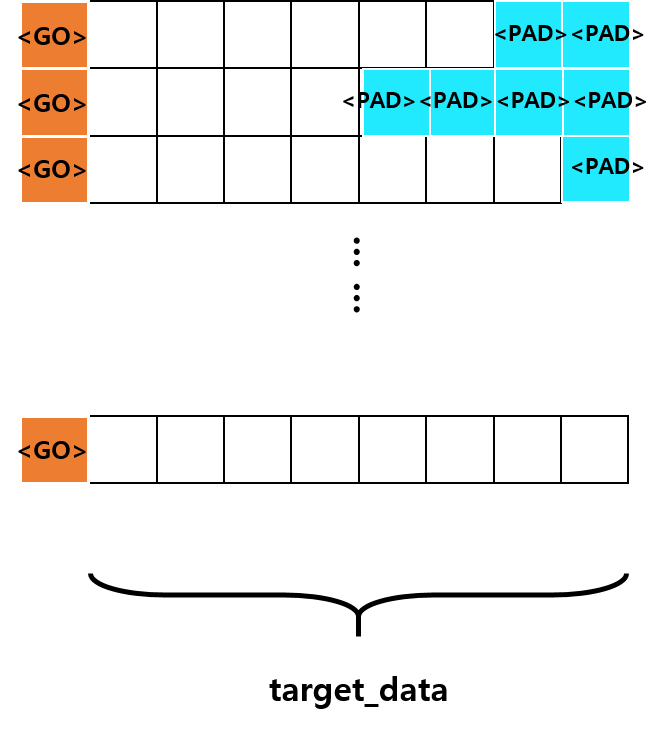<b><center> 데이터 패딩

In [53]:

def pad_sentence_batch(sentence_batch, pad_int):
    """Pad sentences with <PAD> so that each sentence of a batch has the same length"""
    max_sentence = max([len(sentence) for sentence in sentence_batch])
    return [sentence + [pad_int] * (max_sentence - len(sentence)) for sentence in sentence_batch]


def get_batches(sources, targets, batch_size, source_pad_int, target_pad_int):
    """Batch targets, sources, and the lengths of their sentences together"""
    for batch_i in range(0, len(sources)//batch_size):
        start_i = batch_i * batch_size

        # Slice the right amount for the batch
        sources_batch = sources[start_i:start_i + batch_size]
        targets_batch = targets[start_i:start_i + batch_size]

        # Pad
        pad_sources_batch = np.array(pad_sentence_batch(sources_batch, source_pad_int))
        pad_targets_batch = np.array(pad_sentence_batch(targets_batch, target_pad_int))

        # Need the lengths for the _lengths parameters
        pad_targets_lengths = []
        for target in pad_targets_batch:
            pad_targets_lengths.append(len(target))

        pad_source_lengths = []
        for source in pad_sources_batch:
            pad_source_lengths.append(len(source))

        yield pad_sources_batch, pad_targets_batch, pad_source_lengths, pad_targets_lengths

In [52]:
def get_accuracy(target, logits):
    """
    Calculate accuracy
    """
    max_seq = max(target.shape[1], logits.shape[1])
    if max_seq - target.shape[1]:
        target = np.pad(
            target,
            [(0,0),(0,max_seq - target.shape[1])],
            'constant')
    if max_seq - logits.shape[1]:
        logits = np.pad(
            logits,
            [(0,0),(0,max_seq - logits.shape[1])],
            'constant')

    return np.mean(np.equal(target, logits))

# Split data to training and validation sets
train_source = source_int_text[batch_size:]
train_target = target_int_text[batch_size:]
valid_source = source_int_text[:batch_size]
valid_target = target_int_text[:batch_size]
(valid_sources_batch, valid_targets_batch, valid_sources_lengths, valid_targets_lengths ) = next(get_batches(valid_source,
                                                                                                             valid_target,
                                                                                                             batch_size,
                                                                                                             source_vocab_to_int['<PAD>'],
                                                                                                             target_vocab_to_int['<PAD>']))                                                                                                  
with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(epochs):
        for batch_i, (source_batch, target_batch, sources_lengths, targets_lengths) in enumerate(
                get_batches(train_source, train_target, batch_size,
                            source_vocab_to_int['<PAD>'],
                            target_vocab_to_int['<PAD>'])):

            _, loss = sess.run(
                [train_op, cost],
                {input_data: source_batch,
                 targets: target_batch,
                 lr: learning_rate,
                 target_sequence_length: targets_lengths,
                 keep_prob: keep_probability})


            if batch_i % display_step == 0 and batch_i > 0:
                batch_train_logits = sess.run(
                    inference_logits,
                    {input_data: source_batch,
                     target_sequence_length: targets_lengths,
                     keep_prob: 1.0})

                batch_valid_logits = sess.run(
                    inference_logits,
                    {input_data: valid_sources_batch,
                     target_sequence_length: valid_targets_lengths,
                     keep_prob: 1.0})

                train_acc = get_accuracy(target_batch, batch_train_logits)
                valid_acc = get_accuracy(valid_targets_batch, batch_valid_logits)

                print('Epoch {:>3} Batch {:>4}/{} - Train Accuracy: {:>6.4f}, Validation Accuracy: {:>6.4f}, Loss: {:>6.4f}'
                      .format(epoch_i, batch_i, len(source_int_text) // batch_size, train_acc, valid_acc, loss))

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_path)
    print('Model Trained and Saved')

Epoch   0 Batch  300/1077 - Train Accuracy: 0.4215, Validation Accuracy: 0.5110, Loss: 1.9840
Epoch   0 Batch  600/1077 - Train Accuracy: 0.5141, Validation Accuracy: 0.5131, Loss: 1.1287
Epoch   0 Batch  900/1077 - Train Accuracy: 0.5156, Validation Accuracy: 0.5600, Loss: 0.9501
Epoch   1 Batch  300/1077 - Train Accuracy: 0.5831, Validation Accuracy: 0.6200, Loss: 0.7324
Epoch   1 Batch  600/1077 - Train Accuracy: 0.6425, Validation Accuracy: 0.6502, Loss: 0.5848
Epoch   1 Batch  900/1077 - Train Accuracy: 0.6660, Validation Accuracy: 0.6701, Loss: 0.5478
Epoch   2 Batch  300/1077 - Train Accuracy: 0.6780, Validation Accuracy: 0.6839, Loss: 0.4700
Epoch   2 Batch  600/1077 - Train Accuracy: 0.7217, Validation Accuracy: 0.7074, Loss: 0.4078
Epoch   2 Batch  900/1077 - Train Accuracy: 0.7238, Validation Accuracy: 0.7330, Loss: 0.4036
Epoch   3 Batch  300/1077 - Train Accuracy: 0.7278, Validation Accuracy: 0.7379, Loss: 0.3529
Epoch   3 Batch  600/1077 - Train Accuracy: 0.7853, Validati

In [55]:
def save_params(params):
    with open('params.p', 'wb') as out_file:
        pickle.dump(params, out_file)


def load_params():
    with open('params.p', mode='rb') as in_file:
        return pickle.load(in_file)

In [54]:
# Save parameters for checkpoint
save_params(save_path)

### Checkpoint

In [56]:

import tensorflow as tf
import numpy as np

_, (source_vocab_to_int, target_vocab_to_int), (source_int_to_vocab, target_int_to_vocab) = load_preprocess()
load_path = load_params()

### Translate

In [60]:
def sentence_to_seq(sentence, vocab_to_int):
    results = []
    for word in sentence.split(" "):
        if word in vocab_to_int:
            results.append(vocab_to_int[word])
        else:
            results.append(vocab_to_int['<UNK>'])
            
    return results

translate_sentence = 'i like apple .'

translate_sentence = sentence_to_seq(translate_sentence, source_vocab_to_int)

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(load_path + '.meta')
    loader.restore(sess, load_path)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('predictions:0')
    target_sequence_length = loaded_graph.get_tensor_by_name('target_sequence_length:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')

    translate_logits = sess.run(logits, {input_data: [translate_sentence]*batch_size,
                                         target_sequence_length: [len(translate_sentence)*2]*batch_size,
                                         keep_prob: 1.0})[0]

print('Input')
print('  Word Ids:      {}'.format([i for i in translate_sentence]))
print('  English Words: {}'.format([source_int_to_vocab[i] for i in translate_sentence]))

print('\nPrediction')
print('  Word Ids:      {}'.format([i for i in translate_logits]))
print('  French Words: {}'.format(" ".join([target_int_to_vocab[i] for i in translate_logits])))

INFO:tensorflow:Restoring parameters from checkpoints/dev
Input
  Word Ids:      [200, 176, 91, 139]
  English Words: ['i', 'like', 'apple', '.']

Prediction
  Word Ids:      [285, 109, 346, 1]
  French Words: aimé proches pensez <EOS>


### 연습문제 해답

#### 1 시퀀스 투 시퀀스 RNN을 사용한 어플리케이션에는 어떤 것들이 있나요? 시퀀스-투-벡터 RNN과 벡터-투-시퀀스 RNN은 어떤가요?

Seqeunce to sequence RNN application : 날씨 예측, 기께 번역, 비디오 캡션 생성, 스피치 투 텍스트, 음악 생성, 노래의 화음 식별

시퀀스 투 벡터 RNN : 음악 샘플을 장르로 구분하기, 책 후기에 대한 감성 분석, 뇌에 심은 인공칩에서 익은 데이터를 기반으로 실어증 환자가 생각하는 단어 예측하기, 사용자의 영화 시청 이력을 바탕으로 복 싶어 할 영화의 확률 예측하기
<br>
벡터 투 시퀀스 RNN : 이미지 캡션 생성, 현재 아티스트를 기반으로 음악 플레이리스트 생성, 일련의 파라미터를 기반으로 한 멜로디 생성, 사진 속에서 보행자 위치 찾기

#### 2 왜 자동 번역에 시퀀스-투-시퀀스 RNN 대신 인코더- 디코더 RNN을 사용하나요?

일반적으로 문장을 한번에 단어 하나씩 번역하면 결과가 매우 좋지 않음
- 예를 들어 프랑스 문장 'Je vous en prie'는 'You are welcome'을 의미함
하지만 이를 한 단어씩 번역하면 'I you in pray'가 되버림. 따라서 먼저 전체 문장을 읽고 난 다음에 번역하는것이 훨씬 좋음
보통의 시퀀스- 투 시퀀스 RNN은 첫 단어를 읽은 후 즉시 문장을 번역하기 시작하지만 인코더-디코더 RNN은 먼저 전체 문장을 일고 난 다음에 번역을 함
이는 다음에 말할 것이 확실하지 않을 때마다 침묵을 출력하는 시퀀스-투-시퀀스 RNN으로 생각할 수도 있습니다.

#### 3 동영상을 분류하기 위해 합성곱 신경망과 RNN을 어떻게 연결할 수 있나요?

화면 내용을 기초로 동영상을 분류하려면 초당 한 프레임을 받아 각 프레임을 합성곱 신경망에 통과시키고 이 CNN의 출력을 시퀀스-투 벡터 RNN에 주입하고 마지막에 소프트맥스 층을 통과시켜 모든 클래스에 대한 확률을 구하는 구조를 생각해볼 수 있음.<br>

훈련을 위해서는 크로스 엔트로피를 비용 함수로 사용하면 됩니다. 분류에 오디오도 사용하려면 매 초의 오디오를 스펙트럼 사진으로 변환하고 이 사진을 CNN에 주입한 다음 이 CNN의 출력을 RNN에 주입함

#### 4 static_rnn() 대신 dynamic_rnn()을 사용하여 RNN을 구축할 때의 장점은 무엇인가요?

1. 메모리 부족 에러를 피하기 위해 역전파하는동안 GPU 메모리를 CPU 메모리로 대체할 수 있는 while_loop()연산을 기반으로 함
2. 입력과 출력에 하나의 텐서를 사용하기 떄문에 텐서의 리스트를 사용하는것보다 사용하기 편리함 
    - stack, unstack, transpose 연산이 필요 없음
3. 더 작은 그래프를 만들기 때문에 텐서보드에서 확인하기 쉬움 

#### 5 가변 길이 입력 시퀀스를 어떻게 다룰 수 있나요? 가변 길이 출력 시퀀스는 어떤가요?

가변 길이 입력 시퀀스를 다루기 위한 가장 간단한 방법은 
1. static_rnn()이나 dynamic_rnn()함수를 호출할 때 sequence_length 매개변수를 설정하는 것 
2. 가장 큰 입력의 크기에 맞추기 위해 작은 입력값으로 패딩을 추가하는 것

가변 길이의 출력 시퀀스를 다루기 위해서는 
1. 출력 시퀀스의 길이를 미리 알고 있다면 sequence_length 매개변수를 사용할 수 있음 
2. 출력 시퀀스의 길이를 미리 알지 못하면 패딩 트릭을 사용할 수 있음 
    - 즉 항상 같은 크기의 시퀀스를 출력하고, EOS 토큰 이후의 출력은 무시합니다.

#### 6 여러 GPU에 심층 RNN의 훈련과 실행을 분산시키는 일반적인 방법은 무엇인가요?

여러 GPU에 심층 RNN의 훈련과 실행을 분산시키이 위한 일반적인 방법은 각각의 층을 다른 GPU에 배치하는 것입니다.

#### 7 임베딩된 레버 문법

- 먼저 문법에 맞는 문자열을 생성하는 함수가 필요
- 이 문법은 각 상태에서 가능한 전이 상태의 리스트임
- 해당 변환은 출력할 문자열과 다음 상태를 지정함

In [87]:
from random import choice, seed

# 일관된 출력을 위한 유사난수 초기화
seed(42)
np.random.seed(42)

default_reber_grammar = [
    [("B", 1)],           # (상태 0) =B=>(상태 1)
    [("T", 2), ("P", 3)], # (상태 1) =T=>(상태 2) or =P=>(상태 3)
    [("S", 2), ("X", 4)], # (상태 2) =S=>(상태 2) or =X=>(상태 4)
    [("T", 3), ("V", 5)], # 등등..
    [("X", 3), ("S", 6)],
    [("P", 4), ("V", 6)],
    [("E", None)]]        # (상태 6) =E=>(종료 상태)

embedded_reber_grammar = [
    [("B", 1)],
    [("T", 2), ("P", 3)],
    [(default_reber_grammar, 4)],
    [(default_reber_grammar, 5)],
    [("T", 6)],
    [("P", 6)],
    [("E", None)]]

def generate_string(grammar):
    state = 0
    output = []
    while state is not None:
        production, state = choice(grammar[state])
        if isinstance(production, list):
            production = generate_string(grammar=production)
        output.append(production)
    return "".join(output)

- Default Reber grammar에 맞는 문자열 만드는 것을 확인

In [88]:
for _ in range(25):
    print(generate_string(default_reber_grammar), end=" ")

BTXXTTTTVPXTTTTTVPSE BTXSE BTXXTVPSE BTXXVPSE BTSSXXTTVVE BTXSE BTSSSXSE BPTTTVVE BTXXVVE BPTTVVE BTSXXTTTTVPSE BPTTVVE BPTVPSE BPTTVPXVVE BPVPXTTTVPXTVPSE BTXSE BPTTTTVPXTTTTTTTVPXVVE BPTVVE BTXSE BPTTTVVE BTSXXVPSE BTXXTTTTTVVE BPTTVPSE BPVVE BPTTTVPXVPXTTTTTVPXTTVVE 

- Embedding Reber grammar에 맞는 문자열 만드는 것을 확인

In [89]:
for _ in range(25):
    print(generate_string(embedded_reber_grammar), end=" ")

BPBPTVVEPE BTBPTVPXVVETE BPBPTTTVVEPE BPBTXSEPE BPBPTTTTTVPSEPE BTBTSXSETE BPBPVPSEPE BPBPVVEPE BPBTXSEPE BPBTSXSEPE BTBPTTVVETE BPBPVVEPE BTBTXSETE BPBPTTVVEPE BTBTSXXVVETE BTBTXXTVPXTVPSETE BTBPTVVETE BPBPVPXTTVPXTVVEPE BTBTXSETE BPBTXSEPE BPBTSXXTVPSEPE BPBPVVEPE BPBPTTTTTTTTTTVPXVVEPE BPBPVVEPE BPBPVVEPE 

- 문법을 따르지 않는 문자열을 만들 함수 생성
- 문법을 따르는 문자열을 만든 후 하나의 문자만 변경

In [90]:
def generate_corrupted_string(grammar, chars="BEPSTVX"):
    good_string = generate_string(grammar)
    index = np.random.randint(len(good_string))
    good_char = good_string[index]
    bad_char = choice(list(set(chars) - set(good_char)))
    return good_string[:index] + bad_char + good_string[index + 1:]

- 여러개의 잘못된 문자열 생성

In [91]:
for _ in range(25):
    print(generate_corrupted_string(embedded_reber_grammar), end=" ")

BPBPVPEEPE BPBSXSEPE BPBPTVVBPE BTBPPPSETE BTBPVVSTE BPBTSSXXTSTVVEPE BPTTSXXTVPSEPE BPBTXSTPE BTBPTTTVPSBTE BPBTSXXTTTXTTVVEPE BPBVXXVPXTVPXTTVVEPE BPBPTTVXEPE BPBPVVEXE BPEPTTVVEPE BPBPVXSEPE BPBTVXXVVEPE BEBPTTTVPXVVETE BPBTSSXTEPE BPBPVXEPE BEBTXSEPE BTBPTVPXVPXVVETS PPBTSXXTVPXVPSEPE BPBTSXXTTTVVSEPE BPBPVPXVVTPE BTBTSVSETE 

- 문자열을 바로 RNN에 주입할 수는 없음
- 먼저 벡터로 바꾸어야 함
- 각 벡터는 one-hot 인코딩을 사용하여 하나의 문자를 나타냄
- 예를 들어, 벡터 [1, 0, 0, 0, 0, 0, 0]는 문자 "B"를 나타내고 벡터 [0, 1, 0, 0, 0, 0, 0]는 문자 "E"를 나타내는 식
- 이런 원-핫 벡터의 연속으로 문자열을 바꾸는 함수로 생성
- 문자열이 n_steps보다 짧으면 0 벡터로 패딩됨
(나중에, 텐서플로에게 각 문자열의 실제 길이를 sequence_length 매개변수로 전달할 것).

In [92]:
def string_to_one_hot_vectors(string, n_steps, chars="BEPSTVX"):
    char_to_index = {char: index for index, char in enumerate(chars)}
    output = np.zeros((n_steps, len(chars)), dtype=np.int32)
    for index, char in enumerate(string):
        output[index, char_to_index[char]] = 1.
    return output

In [93]:
string_to_one_hot_vectors("BTBTXSETE", 12)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

- 50%의 올바른 문자열와 50%의 잘못된 문자열로 이루어진 데이터 셋을 생성

In [94]:
def generate_dataset(size):
    good_strings = [generate_string(embedded_reber_grammar)
                    for _ in range(size // 2)]
    bad_strings = [generate_corrupted_string(embedded_reber_grammar)
                   for _ in range(size - size // 2)]
    all_strings = good_strings + bad_strings
    n_steps = max([len(string) for string in all_strings])
    X = np.array([string_to_one_hot_vectors(string, n_steps)
                  for string in all_strings])
    seq_length = np.array([len(string) for string in all_strings])
    y = np.array([[1] for _ in range(len(good_strings))] +
                 [[0] for _ in range(len(bad_strings))])
    rnd_idx = np.random.permutation(size)
    return X[rnd_idx], seq_length[rnd_idx], y[rnd_idx]

In [95]:
X_train, l_train, y_train = generate_dataset(10000)

- 첫번째 training instance 확인

In [45]:
X_train[0]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0,

데이터 세트에 가장 긴 문자열이 존재하기 때문에 0값이 많은 것을 확인 할 수 있음.

- 이제 좋은 문자열을 식별하기 위해 RNN을 만들 준비가 됨

MNIST 이미지를 분류하기 위해 앞서 만들었던 시퀀스 classifier 만들기.

주의사항
1. 입력 문자열은 가변 길이 이므로 dynamic_rnn 함수를 호출할 때 sequence_length를 지정해야함.
2. binary classifier이므로 각 입력 문자열에 대해 예상되는 log probability가 높은 하나의 출력 뉴련만을 필요로 함.

In [98]:
reset_graph()

possible_chars = "BEPSTVX"
n_inputs = len(possible_chars)
n_neurons = 30
n_outputs = 1

learning_rate = 0.02
momentum = 0.95

X = tf.placeholder(tf.float32, [None, None, n_inputs], name="X")
seq_length = tf.placeholder(tf.int32, [None], name="seq_length")
y = tf.placeholder(tf.float32, [None, 1], name="y")

gru_cell = tf.nn.rnn_cell.GRUCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(gru_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

logits = tf.layers.dense(states, n_outputs, name="logits")
y_pred = tf.cast(tf.greater(logits, 0.), tf.float32, name="y_pred")
y_proba = tf.nn.sigmoid(logits, name="y_proba")

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=momentum,
                                       use_nesterov=True)
training_op = optimizer.minimize(loss)

correct = tf.equal(y_pred, y, name="correct")
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [99]:
X_val, l_val, y_val = generate_dataset(5000)

In [100]:
n_epochs = 50
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_batches = np.array_split(X_train, len(X_train) // batch_size)
        l_batches = np.array_split(l_train, len(l_train) // batch_size)
        y_batches = np.array_split(y_train, len(y_train) // batch_size)
        for X_batch, l_batch, y_batch in zip(X_batches, l_batches, y_batches):
            loss_val, _ = sess.run(
                [loss, training_op],
                feed_dict={X: X_batch, seq_length: l_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, seq_length: l_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, seq_length: l_val, y: y_val})
        print("{:4d}  Train loss: {:.4f}, accuracy: {:.2f}%  Validation accuracy: {:.2f}%".format(
            epoch, loss_val, 100 * acc_train, 100 * acc_val))
        saver.save(sess, "./my_reber_classifier")

   0  Train loss: 0.6844, accuracy: 54.00%  Validation accuracy: 58.32%
   1  Train loss: 0.6495, accuracy: 62.00%  Validation accuracy: 63.44%
   2  Train loss: 0.5680, accuracy: 78.00%  Validation accuracy: 69.04%
   3  Train loss: 0.6128, accuracy: 72.00%  Validation accuracy: 65.34%
   4  Train loss: 0.4428, accuracy: 88.00%  Validation accuracy: 81.08%
   5  Train loss: 0.4864, accuracy: 82.00%  Validation accuracy: 75.56%
   6  Train loss: 0.2839, accuracy: 90.00%  Validation accuracy: 82.56%
   7  Train loss: 0.2792, accuracy: 88.00%  Validation accuracy: 83.32%
   8  Train loss: 0.1639, accuracy: 94.00%  Validation accuracy: 92.76%
   9  Train loss: 0.0233, accuracy: 100.00%  Validation accuracy: 96.52%
  10  Train loss: 0.0572, accuracy: 100.00%  Validation accuracy: 98.14%
  11  Train loss: 0.0266, accuracy: 100.00%  Validation accuracy: 98.44%
  12  Train loss: 0.0207, accuracy: 100.00%  Validation accuracy: 99.14%
  13  Train loss: 0.1537, accuracy: 96.00%  Validation accur

이제 RNN을 두 개의 까다로운 문자열로 테스트 해보기
첫번째는 나쁜것이고 두번째는 좋은것.
두번째와 마지막 문자만 다르며, 두번째 문자가 
항상 마지막 문자와 같아야 한다는 패턴을 알아 차릴 수 있다는 것을 보여줌

- 이를 위해서 상당히 긴 단기 메모리가 필요함 - GRU Cell을 사용하는 이유

In [102]:
test_strings = [
    "BPBTSSSSSSSXXTTVPXVPXTTTTTVVETE",
    "BPBTSSSSSSSXXTTVPXVPXTTTTTVVEPE"]
l_test = np.array([len(s) for s in test_strings])
max_length = l_test.max()
X_test = [string_to_one_hot_vectors(s, n_steps=max_length)
          for s in test_strings]

with tf.Session() as sess:
    saver.restore(sess, "./my_reber_classifier")
    y_proba_val = y_proba.eval(feed_dict={X: X_test, seq_length: l_test})

print()
print("Estimated probability that these are Reber strings:")
for index, string in enumerate(test_strings):
    print("{}: {:.2f}%".format(string, 100 * y_proba_val[index][0]))

INFO:tensorflow:Restoring parameters from ./my_reber_classifier

Estimated probability that these are Reber strings:
BPBTSSSSSSSXXTTVPXVPXTTTTTVVETE: 0.33%
BPBTSSSSSSSXXTTVPXVPXTTTTTVVEPE: 99.99%


참조 자료
<list>
<li>https://www.data-blogger.com/2017/08/27/gru-implementation-tensorflow/</li>
    <li>순환 신경망 LSTM, GRU 설명 : https://excelsior-cjh.tistory.com/185</li>
    <li>GRU Wiki : https://en.wikipedia.org/wiki/Gated_recurrent_unit</li>
    <li>순환 신경망 모델 만들기 :https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/</li>
    <li>LSTM example : https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221158850266&proxyReferer=https%3A%2F%2Fwww.google.com%2F</li>
    <li>LSTM exmaple : https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/</li>
    <li>워드 임베딩 : https://datascienceschool.net/view-notebook/6927b0906f884a67b0da9310d3a581ee/</li>
    <li>워드 임베딩 : https://dreamgonfly.github.io/machine/learning,/natural/language/processing/2017/08/16/word2vec_explained.html</li>
<li>희소 벡터, 밀집 벡터 : https://wikidocs.net/33520 </li>
    <li>기계 번역 : https://github.com/tensorflow/nmt#introduction</li>
    <li>FR/EN 기계 번역 https://github.com/denisb411/seq2seq-NMT-tensorflow</li>
    <li> 기계 번역 코드 상세 설명 : https://github.com/deep-diver/EN-FR-MLT-tensorflow/blob/master/dlnd_language_translationv2.ipynb </li>